# Telugu Sentiment Analysis

This notebook implements a complete pipeline for sentiment analysis in Telugu text, from data loading to advanced modeling techniques.

## Table of Contents
- [1. Data Loading and Exploration](#1-data-loading-and-exploration)
- [2. Text Preprocessing](#2-text-preprocessing)
- [3. Feature Engineering](#3-feature-engineering)
  - [3.1 Basic Features](#31-basic-features)
  - [3.2 Word Embeddings](#32-word-embeddings)
  - [3.3 POS Tagging Features](#33-pos-tagging-features)
  - [3.4 Sentiment Lexicon Features](#34-sentiment-lexicon-features)
  - [3.5 Clustering Features](#35-clustering-features)
- [4. Model Building](#4-model-building)
  - [4.1 Traditional ML Models](#41-traditional-ml-models)
  - [4.2 Neural Network Models](#42-neural-network-models)
  - [4.3 Pretrained Transformer Models](#43-pretrained-transformer-models)
- [5. Model Evaluation](#5-model-evaluation)
- [6. Conclusion](#6-conclusion)


## 1. Data Loading and Exploration

In this section, we load the Telugu sentiment analysis dataset and explore its basic characteristics.


### Loading Dataset

We're using a Telugu sentiment dataset with three sentiment classes: positive, negative, and neutral.


In [ ]:
import pandas as pd

splits = {'train': 'Sentiment_train.csv', 'validation': 'Sentiment_valid .csv', 'test': 'Sentiment_test.csv'}
train_df = pd.read_csv("hf://datasets/mounikaiiith/Telugu_Sentiment/" + splits["train"])
#valid_df = pd.read_csv("hf://datasets/mounikaiiith/Telugu_Sentiment/" + splits["valid_df"])
test_df = pd.read_csv("hf://datasets/mounikaiiith/Telugu_Sentiment/" + splits["test"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
train_df.head()

Unnamed: 0                                           Sentence Sentiment
0       33982  ‡∞Ö‡∞Ø‡∞ø‡∞§‡±á ‡∞Ü‡∞Ø‡∞® ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï ‡∞§‡±ç‡∞µ‡∞Ç ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å ‡∞ï‡∞æ‡∞®‡±Ä ‡∞Ü‡∞Ø‡∞® ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™‡±ç...   neutral
1       20617  ‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç ‡∞Æ‡∞Ç‡∞ö‡∞ø ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã ‡∞§‡∞∞‡∞ö‡±Ç ‡∞´‡±ã‡∞®‡±ç‚Äå‡∞≤‡±ã ‡∞Æ...   neutral
2       27596  ‡∞¨‡∞æ‡∞≤‡±á‡∞ï‚Äå‡∞™‡±ã‡∞§‡±á ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç ‡∞Æ‡±Å‡∞Ç‡∞¶‡±á ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ ‡∞á‡∞≤‡∞æ ‡∞ú‚Äå‡∞∞‡±Å‡∞ó‡±Å‡∞§...       neg
3       15772  ‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç ‡∞∑‡∞æ ‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø ‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‚Äå‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø ‡∞ú‚Äå‡∞∞‡∞ø‡∞ó‡∞ø‡∞® ‡∞ò‚Äå‡∞∞‡±ç...       neg
4       33930  ‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü ‡∞∏‡±ç‡∞ü‡±ç‚Äå ‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã ‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ ‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®‡∞ø‡∞ß‡±Å‡∞≤‡±Å ‡∞é‡∞≤‡∞æ ‡∞µ‡±ç‡∞Ø...   neutral

In [ ]:
# Map sentiment to numeric values
sentiment_mapping = {'neutral': 0, 'neg': -1, 'pos': 1}
train_df['Sentiment_numeric'] = train_df['Sentiment'].map(sentiment_mapping)

In [ ]:
train_df.head()

Unnamed: 0                                           Sentence Sentiment  \
0       33982  ‡∞Ö‡∞Ø‡∞ø‡∞§‡±á ‡∞Ü‡∞Ø‡∞® ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï ‡∞§‡±ç‡∞µ‡∞Ç ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å ‡∞ï‡∞æ‡∞®‡±Ä ‡∞Ü‡∞Ø‡∞® ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™‡±ç...   neutral   
1       20617  ‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç ‡∞Æ‡∞Ç‡∞ö‡∞ø ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã ‡∞§‡∞∞‡∞ö‡±Ç ‡∞´‡±ã‡∞®‡±ç‚Äå‡∞≤‡±ã ‡∞Æ...   neutral   
2       27596  ‡∞¨‡∞æ‡∞≤‡±á‡∞ï‚Äå‡∞™‡±ã‡∞§‡±á ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç ‡∞Æ‡±Å‡∞Ç‡∞¶‡±á ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ ‡∞á‡∞≤‡∞æ ‡∞ú‚Äå‡∞∞‡±Å‡∞ó‡±Å‡∞§...       neg   
3       15772  ‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç ‡∞∑‡∞æ ‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø ‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‚Äå‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø ‡∞ú‚Äå‡∞∞‡∞ø‡∞ó‡∞ø‡∞® ‡∞ò‚Äå‡∞∞‡±ç...       neg   
4       33930  ‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü ‡∞∏‡±ç‡∞ü‡±ç‚Äå ‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã ‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ ‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®‡∞ø‡∞ß‡±Å‡∞≤‡±Å ‡∞é‡∞≤‡∞æ ‡∞µ‡±ç‡∞Ø...   neutral   

   Sentiment_numeric  
0                  0  
1                  0  
2                 -1  
3                 -1  
4                  0

### Class Distribution

Let's examine the distribution of sentiment classes in our dataset to understand potential class imbalance.


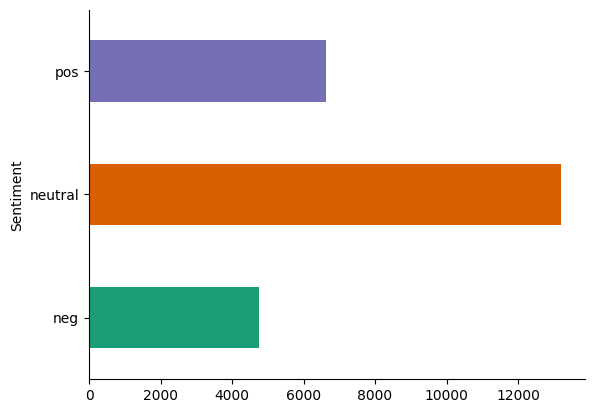

In [ ]:
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
train_df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## 2. Text Preprocessing

Telugu text requires specialized preprocessing techniques to handle script variations and linguistic characteristics.


In [ ]:
!pip install indic-nlp-library
!git clone https://github.com/anoopkunchukuttan/indic_nlp_resources

fatal: destination path 'indic_nlp_resources' already exists and is not an empty directory.


In [ ]:
import os
import sys

# Set path to Indic NLP resources
os.environ['INDIC_RESOURCES_PATH'] = '/content/indic_nlp_resources'
sys.path.append(os.environ['INDIC_RESOURCES_PATH'])

# Initialize properly
from indicnlp import loader
loader.load()


In [ ]:
pip install advertools

In [ ]:
import advertools as adv
adv.stopwords.keys()

dict_keys(['arabic', 'azerbaijani', 'bengali', 'catalan', 'chinese', 'croatian', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hindi', 'hungarian', 'indonesian', 'irish', 'italian', 'japanese', 'kazakh', 'nepali', 'norwegian', 'persian', 'polish', 'portuguese', 'romanian', 'russian', 'sinhala', 'spanish', 'swedish', 'tagalog', 'tamil', 'tatar', 'telugu', 'thai', 'turkish', 'ukrainian', 'urdu', 'vietnamese'])

In [ ]:
print(sorted(adv.stopwords['telugu']))

['‡∞Ö‡∞Ç‡∞¶‡∞∞‡±Ç', '‡∞Ö‡∞Ç‡∞¶‡±Å‡∞¨‡∞æ‡∞ü‡±Å‡∞≤‡±ã', '‡∞Ö‡∞°‡∞ó‡∞Ç‡∞°‡∞ø', '‡∞Ö‡∞°‡∞ó‡∞°‡∞Ç', '‡∞Ö‡∞°‡±ç‡∞°‡∞Ç‡∞ó‡∞æ', '‡∞Ö‡∞®‡±Å‡∞ó‡±Å‡∞£‡∞Ç‡∞ó‡∞æ', '‡∞Ö‡∞®‡±Å‡∞Æ‡∞§‡∞ø‡∞Ç‡∞ö‡±Å', '‡∞Ö‡∞®‡±Å‡∞Æ‡∞§‡∞ø‡∞∏‡±ç‡∞§‡±Å‡∞Ç‡∞¶‡∞ø', '‡∞Ö‡∞Ø‡∞ø‡∞§‡±á', '‡∞á‡∞™‡±ç‡∞™‡∞ü‡∞ø‡∞ï‡±á', '‡∞â‡∞®‡±ç‡∞®‡∞æ‡∞∞‡±Å', '‡∞é‡∞ï‡±ç‡∞ï‡∞°‡±à‡∞®‡∞æ', '‡∞é‡∞™‡±ç‡∞™‡±Å‡∞°‡±Å', '‡∞é‡∞µ‡∞∞‡±à‡∞®‡∞æ', '‡∞é‡∞µ‡∞∞‡±ã', '‡∞è', '‡∞è‡∞¶‡±à‡∞®‡∞æ', '‡∞è‡∞Æ‡±à‡∞®‡∞™‡±ç‡∞™‡∞ü‡∞ø‡∞ï‡∞ø', '‡∞í‡∞ï', '‡∞í‡∞ï‡∞∞‡±Å', '‡∞ï‡∞®‡∞ø‡∞™‡∞ø‡∞∏‡±ç‡∞§‡∞æ‡∞Ø‡∞ø', '‡∞ï‡∞æ‡∞¶‡±Å', '‡∞ï‡±Ç‡∞°‡∞æ', '‡∞ó‡∞æ', '‡∞ó‡±Å‡∞∞‡∞ø‡∞Ç‡∞ö‡∞ø', '‡∞ö‡±Å‡∞ü‡±ç‡∞ü‡±Ç', '‡∞ö‡±á‡∞Ø‡∞ó‡∞≤‡∞ø‡∞ó‡∞ø‡∞Ç‡∞¶‡∞ø', '‡∞§‡∞ó‡∞ø‡∞®', '‡∞§‡∞∞‡±ç‡∞µ‡∞æ‡∞§', '‡∞¶‡∞æ‡∞¶‡∞æ‡∞™‡±Å', '‡∞¶‡±Ç‡∞∞‡∞Ç‡∞ó‡∞æ', '‡∞®‡∞ø‡∞ú‡∞Ç‡∞ó‡∞æ', '‡∞™‡±à', '‡∞™‡±ç‡∞∞‡∞ï‡∞æ‡∞∞‡∞Ç', '‡∞™‡±ç‡∞∞‡∞ï‡±ç‡∞ï‡∞®', '‡∞Æ‡∞ß‡±ç‡∞Ø', '‡∞Æ‡∞∞‡∞ø‡∞Ø‡±Å', '‡∞Æ‡∞∞‡±ä‡∞ï', '‡∞Æ‡∞≥‡±ç‡∞≥‡±Ä', '‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Æ‡±á', '‡∞Æ‡±Ü‡∞ö‡±ç‡∞ö‡±Å‡∞ï‡±ã', '‡∞µ‡∞¶‡±ç‡∞¶', '‡∞µ‡±Ü‡∞Ç‡∞ü', '‡∞µ‡±á‡∞∞‡±Å‡∞ó‡∞æ', '‡∞µ‡±ç‡∞Ø‡∞§‡∞ø‡∞∞

In [ ]:

from indicnlp import loader
from indicnlp.normalize import indic_normalize
from indicnlp.tokenize import indic_tokenize
import re

# Initialize Indic NLP for Telugu
loader.load()

def preprocess_telugu(text: str) -> list:
    """
    Preprocess Telugu text with normalization, cleaning, and tokenization
    Returns cleaned tokens ready for NLP tasks
    """

    # 1. Normalization (Devanagari -> Telugu script unification)
    normalizer = indic_normalize.IndicNormalizerFactory().get_normalizer("te")
    text = normalizer.normalize(text)

    # 2. Remove punctuation/special characters (Telugu-specific)
    text = re.sub(r'[^\u0C00-\u0C7F\s]', '', text)  # Keep only Telugu chars + spaces

    # 3. Handle repeated characters (e.g., "‡∞ö‡∞æ‡∞≤‡∞æaaaa" -> "‡∞ö‡∞æ‡∞≤‡∞æ")
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)  # Allow max 2 repeats

    # 4. Tokenization with Indic NLP's word segmenter
    tokens = indic_tokenize.trivial_tokenize(text)

    # 5. Remove Telugu stopwords
    telugu_stopwords = adv.stopwords['telugu']
    tokens = [token for token in tokens if token not in telugu_stopwords]

    return tokens

In [ ]:
import pandas as pd

# Apply preprocessing to all sentences
train_df['processed_text'] = train_df['Sentence'].apply(preprocess_telugu)

# Show processed samples
print("Processed Examples:")
for i, row in train_df.head(3).iterrows():
    print(f"Original: {row['Sentence']}")
    print(f"Processed: {row['processed_text']}\n")


Processed Examples:
Original: ‡∞Ö‡∞Ø‡∞ø‡∞§‡±á ‡∞Ü‡∞Ø‡∞® ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï ‡∞§‡±ç‡∞µ‡∞Ç ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å ‡∞ï‡∞æ‡∞®‡±Ä ‡∞Ü‡∞Ø‡∞® ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™‡±ç‡∞ü‡±ç‚Äå ‡∞µ‡∞∞‡±ç‡∞ï‡±ç‚Äå ‡∞Ö‡∞Ç‡∞¶‡∞ø‡∞Ç‡∞ö‡∞ø ‡∞®‡∞ø‡∞∞‡±ç‡∞Æ‡∞æ‡∞£ ‡∞≠‡∞æ‡∞ó‡∞∏‡±ç‡∞µ‡∞æ‡∞Æ‡∞ø‡∞ó‡∞æ ‡∞≠‡∞æ‡∞∞‡±Ä ‡∞ö‡∞ø‡∞§‡±ç‡∞∞‡∞æ‡∞®‡∞ø‡∞ï‡∞ø ‡∞∞‡±Ç‡∞™‡∞ï‡∞≤‡±ç‡∞™‡∞® ‡∞ö‡±á‡∞∏‡±ç‡∞§‡±Å‡∞®‡±ç‡∞®‡∞æ‡∞∞‡±Å.
Processed: ['‡∞Ü‡∞Ø‡∞®', '‡∞¶‡∞∞‡±ç‡∞∂‡∞ï', '‡∞§‡±ç‡∞µ‡∞Ç', '‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å', '‡∞ï‡∞æ‡∞®‡±Ä', '‡∞Ü‡∞Ø‡∞®', '‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™‡±ç‡∞ü‡±ç', '‡∞µ‡∞∞‡±ç‡∞ï‡±ç', '‡∞Ö‡∞Ç‡∞¶‡∞ø‡∞Ç‡∞ö‡∞ø', '‡∞®‡∞ø‡∞∞‡±ç‡∞Æ‡∞æ‡∞£', '‡∞≠‡∞æ‡∞ó‡∞∏‡±ç‡∞µ‡∞æ‡∞Æ‡∞ø‡∞ó‡∞æ', '‡∞≠‡∞æ‡∞∞‡±Ä', '‡∞ö‡∞ø‡∞§‡±ç‡∞∞‡∞æ‡∞®‡∞ø‡∞ï‡∞ø', '‡∞∞‡±Ç‡∞™‡∞ï‡∞≤‡±ç‡∞™‡∞®', '‡∞ö‡±á‡∞∏‡±ç‡∞§‡±Å‡∞®‡±ç‡∞®‡∞æ‡∞∞‡±Å']

Original: ‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç ‡∞Æ‡∞Ç‡∞ö‡∞ø ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã ‡∞§‡∞∞‡∞ö‡±Ç ‡∞´‡±ã‡∞®‡±ç‚Äå‡∞≤‡±ã ‡∞Æ‡∞æ‡∞ü‡±ç‡∞≤‡∞æ‡∞°‡±Å‡∞ï‡±Å‡∞®‡±á‡∞µ‡∞æ‡∞∞‡±Å
Processed: ['‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç', '‡∞Æ‡∞Ç‡∞ö‡∞ø', '‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±

In [ ]:
train_df.head()

Unnamed: 0                                           Sentence Sentiment  \
0       33982  ‡∞Ö‡∞Ø‡∞ø‡∞§‡±á ‡∞Ü‡∞Ø‡∞® ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï ‡∞§‡±ç‡∞µ‡∞Ç ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å ‡∞ï‡∞æ‡∞®‡±Ä ‡∞Ü‡∞Ø‡∞® ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™‡±ç...   neutral   
1       20617  ‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç ‡∞Æ‡∞Ç‡∞ö‡∞ø ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã ‡∞§‡∞∞‡∞ö‡±Ç ‡∞´‡±ã‡∞®‡±ç‚Äå‡∞≤‡±ã ‡∞Æ...   neutral   
2       27596  ‡∞¨‡∞æ‡∞≤‡±á‡∞ï‚Äå‡∞™‡±ã‡∞§‡±á ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç ‡∞Æ‡±Å‡∞Ç‡∞¶‡±á ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ ‡∞á‡∞≤‡∞æ ‡∞ú‚Äå‡∞∞‡±Å‡∞ó‡±Å‡∞§...       neg   
3       15772  ‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç ‡∞∑‡∞æ ‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø ‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‚Äå‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø ‡∞ú‚Äå‡∞∞‡∞ø‡∞ó‡∞ø‡∞® ‡∞ò‚Äå‡∞∞‡±ç...       neg   
4       33930  ‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü ‡∞∏‡±ç‡∞ü‡±ç‚Äå ‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã ‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ ‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®‡∞ø‡∞ß‡±Å‡∞≤‡±Å ‡∞é‡∞≤‡∞æ ‡∞µ‡±ç‡∞Ø...   neutral   

   Sentiment_numeric                                     processed_text  
0                  0  [‡∞Ü‡∞Ø‡∞®, ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï, ‡∞§‡±ç‡∞µ‡∞Ç, ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å, ‡∞ï‡∞æ‡∞®‡±Ä, ‡∞Ü‡∞Ø‡∞®, ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™...  
1                  0  [‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç, ‡∞Æ‡∞Ç‡∞ö‡∞ø, ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å, ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã, ‡∞§‡∞∞‡∞ö‡±Ç, ‡∞´‡±ã‡∞®...  
2                 -1  [‡∞¨‡∞æ‡∞≤‡±á‡∞ï‡∞™‡±ã‡∞§‡±á, ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç, ‡∞Æ‡±Å‡∞Ç‡∞¶‡±á, ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ, ‡∞á‡∞≤‡∞æ, ‡∞ú‡∞∞...  
3                 -1  [‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç, ‡∞∑‡∞æ, ‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø, ‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø, ‡∞ú‡∞∞‡∞ø‡∞ó‡∞ø‡∞®, ...  
4                  0  [‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü, ‡∞∏‡±ç‡∞ü‡±ç, ‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã, ‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ, ‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®‡∞ø‡∞ß‡±Å‡∞≤‡±Å, ‡∞é‡∞≤...

## 3. Feature Engineering

Feature engineering is crucial for capturing the linguistic nuances that contribute to sentiment expression in Telugu.


### 3.1 Basic Features

Let's extract basic statistical features from our text data.


#### Sentence Length Statistics

The length of sentences can provide insights into sentiment expression patterns.


In [ ]:
train_df['sentence_length'] = train_df['processed_text'].apply(len)

In [ ]:
train_df.head()

Unnamed: 0                                           Sentence Sentiment  \
0       33982  ‡∞Ö‡∞Ø‡∞ø‡∞§‡±á ‡∞Ü‡∞Ø‡∞® ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï ‡∞§‡±ç‡∞µ‡∞Ç ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å ‡∞ï‡∞æ‡∞®‡±Ä ‡∞Ü‡∞Ø‡∞® ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™‡±ç...   neutral   
1       20617  ‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç ‡∞Æ‡∞Ç‡∞ö‡∞ø ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã ‡∞§‡∞∞‡∞ö‡±Ç ‡∞´‡±ã‡∞®‡±ç‚Äå‡∞≤‡±ã ‡∞Æ...   neutral   
2       27596  ‡∞¨‡∞æ‡∞≤‡±á‡∞ï‚Äå‡∞™‡±ã‡∞§‡±á ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç ‡∞Æ‡±Å‡∞Ç‡∞¶‡±á ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ ‡∞á‡∞≤‡∞æ ‡∞ú‚Äå‡∞∞‡±Å‡∞ó‡±Å‡∞§...       neg   
3       15772  ‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç ‡∞∑‡∞æ ‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø ‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‚Äå‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø ‡∞ú‚Äå‡∞∞‡∞ø‡∞ó‡∞ø‡∞® ‡∞ò‚Äå‡∞∞‡±ç...       neg   
4       33930  ‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü ‡∞∏‡±ç‡∞ü‡±ç‚Äå ‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã ‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ ‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®‡∞ø‡∞ß‡±Å‡∞≤‡±Å ‡∞é‡∞≤‡∞æ ‡∞µ‡±ç‡∞Ø...   neutral   

   Sentiment_numeric                                     processed_text  \
0                  0  [‡∞Ü‡∞Ø‡∞®, ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï, ‡∞§‡±ç‡∞µ‡∞Ç, ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å, ‡∞ï‡∞æ‡∞®‡±Ä, ‡∞Ü‡∞Ø‡∞®, ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™...   
1                  0  [‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç, ‡∞Æ‡∞Ç‡∞ö‡∞ø, ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å, ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã, ‡∞§‡∞∞‡∞ö‡±Ç, ‡∞´‡±ã‡∞®...   
2                 -1  [‡∞¨‡∞æ‡∞≤‡±á‡∞ï‡∞™‡±ã‡∞§‡±á, ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç, ‡∞Æ‡±Å‡∞Ç‡∞¶‡±á, ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ, ‡∞á‡∞≤‡∞æ, ‡∞ú‡∞∞...   
3                 -1  [‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç, ‡∞∑‡∞æ, ‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø, ‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø, ‡∞ú‡∞∞‡∞ø‡∞ó‡∞ø‡∞®, ...   
4                  0  [‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü, ‡∞∏‡±ç‡∞ü‡±ç, ‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã, ‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ, ‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®‡∞ø‡∞ß‡±Å‡∞≤‡±Å, ‡∞é‡∞≤...   

   sentence_length  
0               15  
1                7  
2                9  
3                9  
4               13

In [ ]:
train_df['Sentence'][0]

'‡∞Ö‡∞Ø‡∞ø‡∞§‡±á ‡∞Ü‡∞Ø‡∞® ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï ‡∞§‡±ç‡∞µ‡∞Ç ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å ‡∞ï‡∞æ‡∞®‡±Ä ‡∞Ü‡∞Ø‡∞® ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™‡±ç‡∞ü‡±ç\u200c ‡∞µ‡∞∞‡±ç‡∞ï‡±ç\u200c ‡∞Ö‡∞Ç‡∞¶‡∞ø‡∞Ç‡∞ö‡∞ø ‡∞®‡∞ø‡∞∞‡±ç‡∞Æ‡∞æ‡∞£ ‡∞≠‡∞æ‡∞ó‡∞∏‡±ç‡∞µ‡∞æ‡∞Æ‡∞ø‡∞ó‡∞æ ‡∞≠‡∞æ‡∞∞‡±Ä ‡∞ö‡∞ø‡∞§‡±ç‡∞∞‡∞æ‡∞®‡∞ø‡∞ï‡∞ø ‡∞∞‡±Ç‡∞™‡∞ï‡∞≤‡±ç‡∞™‡∞® ‡∞ö‡±á‡∞∏‡±ç‡∞§‡±Å‡∞®‡±ç‡∞®‡∞æ‡∞∞‡±Å.'

In [ ]:
train_df['processed_text'][0]

['‡∞Ü‡∞Ø‡∞®',
 '‡∞¶‡∞∞‡±ç‡∞∂‡∞ï',
 '‡∞§‡±ç‡∞µ‡∞Ç',
 '‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å',
 '‡∞ï‡∞æ‡∞®‡±Ä',
 '‡∞Ü‡∞Ø‡∞®',
 '‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™‡±ç‡∞ü‡±ç',
 '‡∞µ‡∞∞‡±ç‡∞ï‡±ç',
 '‡∞Ö‡∞Ç‡∞¶‡∞ø‡∞Ç‡∞ö‡∞ø',
 '‡∞®‡∞ø‡∞∞‡±ç‡∞Æ‡∞æ‡∞£',
 '‡∞≠‡∞æ‡∞ó‡∞∏‡±ç‡∞µ‡∞æ‡∞Æ‡∞ø‡∞ó‡∞æ',
 '‡∞≠‡∞æ‡∞∞‡±Ä',
 '‡∞ö‡∞ø‡∞§‡±ç‡∞∞‡∞æ‡∞®‡∞ø‡∞ï‡∞ø',
 '‡∞∞‡±Ç‡∞™‡∞ï‡∞≤‡±ç‡∞™‡∞®',
 '‡∞ö‡±á‡∞∏‡±ç‡∞§‡±Å‡∞®‡±ç‡∞®‡∞æ‡∞∞‡±Å']

In [ ]:
train_df.sort_values(by=['sentence_length'], ascending=False)

Unnamed: 0                                           Sentence  \
18366       15995  ‡∞Æ‡∞Ç‡∞§‡±ç‡∞∞‡∞ø‡∞µ‡∞∞‡±ç‡∞ó‡∞Ç‡∞≤‡±ã ‡∞∏‡±ç‡∞•‡∞æ‡∞®‡∞Ç ‡∞≤‡∞≠‡∞ø‡∞Ç‡∞ö‡∞ø‡∞® ‡∞µ‡∞æ‡∞∞‡±Å :- ‡∞ï‡±Å‡∞∞‡∞∏‡∞æ‡∞≤ ‡∞ï‡∞®...   
21929       14351  ‡∞ú‡∞Ø‡∞∂‡∞Ç‡∞ï‡∞∞‡±ç‚Äå: ‡∞µ‡∞ø‡∞¶‡±á‡∞∂‡∞æ‡∞Ç‡∞ó‡∞∂‡∞æ‡∞ñ‡∞∏‡∞¶‡∞æ‡∞®‡∞Ç‡∞¶‡∞ó‡±å‡∞°: ‡∞∞‡∞∏‡∞æ‡∞Ø‡∞®, ‡∞é‡∞∞‡±Å‡∞µ‡±Å‡∞≤ ...   
18345       31687  ‡∞®‡∞ü‡±Ä‡∞®‡∞ü‡±Å‡∞≤‡±Å : ‡∞µ‡∞ø‡∞ú‡∞∞‡±Å ‡∞¶‡±á‡∞µ‡∞∞‡∞ï‡±ä‡∞Ç‡∞°, ‡∞∞‡∞∑‡±ç‡∞Æ‡∞ø‡∞ï ‡∞Æ‡∞Ç‡∞¶‡∞®‡±ç‡∞® ‡∞§‡∞¶‡∞ø‡∞§‡∞∞...   
21444       15910  ‡∞Æ‡±Ç‡∞°‡±ã ‡∞∞‡±ã‡∞ú‡±Å ‡∞∏‡±ã‡∞Æ‚Äå‡∞µ‡∞æ‡∞∞‡∞Ç ‡∞â‡∞¶‡∞Ø‡∞Ç 9 ‡∞ó‡∞Ç‡∞ü‡∞≤‡∞ï‡±Å ‡∞®‡±Å‡∞Ç‡∞ö‡∞ø ‡∞Æ‡∞ß‡±ç‡∞Ø‡∞æ‡∞π‡±ç...   
21998        9534  ‡∞≠‡∞æ‡∞∞‡∞§‡±ç‚Äå ‡∞á‡∞®‡±ç‡∞®‡∞ø‡∞Ç‡∞ó‡±ç‡∞∏‡±ç‚Äå: ‡∞∞‡±ã‡∞π‡∞ø‡∞§‡±ç‚Äå ‡∞∏‡∞ø ‡∞Ö‡∞Ç‡∞°‡±ç‚Äå ‡∞¨‡∞ø ‡∞¨‡±å‡∞≤‡±ç‡∞ü‡±ç...   
...           ...                                                ...   
3416        34894                                        ‡∞Ö‡∞Ç‡∞§‡±á‡∞ï‡∞æ‡∞¶‡±Å.\n   
8949         2174                           ‡∞®‡∞ø‡∞≤‡∞µ‡∞æ‡∞≤‡∞Ç‡∞ü‡±á..‡∞ó‡±Ü‡∞≤‡∞µ‡∞æ‡∞≤‡∞Ç‡∞§‡±á..!.   
19413        8206                         ‡∞®‡∞ø‡∞≤‡∞µ‡∞æ‡∞≤‡∞Ç‡∞ü‡±á..‡∞ó‡±Ü‡∞≤‡∞µ‡∞æ‡∞≤‡∞Ç‡∞§‡±á..!.\n   
6646        25784                                      ‡∞Ü‡∞ï‚Äå‡∞ü‡±ç‡∞ü‡±Å‡∞ï‡±ã‡∞µ‡∞æ‡∞≤‡∞ø   
13288        8288                                        ‡∞é‡∞¶‡±Å‡∞∞‡±Å‡∞¶‡∞æ‡∞°.\n   

      Sentiment  Sentiment_numeric  \
18366   neutral                  0   
21929       pos                  1   
18345   neutral                  0   
21444   neutral                  0   
21998   neutral                  0   
...         ...                ...   
3416    neutral                  0   
8949    neutral                  0   
19413       pos                  1   
6646    neutral                  0   
13288   neutral                  0   

                                          processed_text  sentence_length  
18366  [‡∞Æ‡∞Ç‡∞§‡±ç‡∞∞‡∞ø‡∞µ‡∞∞‡±ç‡∞ó‡∞Ç‡∞≤‡±ã, ‡∞∏‡±ç‡∞•‡∞æ‡∞®‡∞Ç, ‡∞≤‡∞≠‡∞ø‡∞Ç‡∞ö‡∞ø‡∞®, ‡∞µ‡∞æ‡∞∞‡±Å, ‡∞ï‡±Å‡∞∞‡∞∏‡∞æ‡∞≤,...              137  
21929  [‡∞ú‡∞Ø‡∞∂‡∞Ç‡∞ï‡∞∞‡±ç‡∞É, ‡∞µ‡∞ø‡∞¶‡±á‡∞∂‡∞æ‡∞Ç‡∞ó‡∞∂‡∞æ‡∞ñ‡∞∏‡∞¶‡∞æ‡∞®‡∞Ç‡∞¶‡∞ó‡±å‡∞°‡∞É, ‡∞∞‡∞∏‡∞æ‡∞Ø‡∞®, ‡∞é‡∞∞‡±Å‡∞µ‡±Å...               95  
18345  [‡∞®‡∞ü‡±Ä‡∞®‡∞ü‡±Å‡∞≤‡±Å, ‡∞µ‡∞ø‡∞ú‡∞∞‡±Å, ‡∞¶‡±á‡∞µ‡∞∞‡∞ï‡±ä‡∞Ç‡∞°, ‡∞∞‡∞∑‡±ç‡∞Æ‡∞ø‡∞ï, ‡∞Æ‡∞Ç‡∞¶‡∞®‡±ç‡∞®, ‡∞§‡∞¶...               75  
21444  [‡∞Æ‡±Ç‡∞°‡±ã, ‡∞∞‡±ã‡∞ú‡±Å, ‡∞∏‡±ã‡∞Æ‡∞µ‡∞æ‡∞∞‡∞Ç, ‡∞â‡∞¶‡∞Ø‡∞Ç, ‡∞ó‡∞Ç‡∞ü‡∞≤‡∞ï‡±Å, ‡∞®‡±Å‡∞Ç‡∞ö‡∞ø, ‡∞Æ‡∞ß‡±ç...               65  
21998  [‡∞≠‡∞æ‡∞∞‡∞§‡±ç, ‡∞á‡∞®‡±ç‡∞®‡∞ø‡∞Ç‡∞ó‡±ç‡∞∏‡±ç‡∞É, ‡∞∞‡±ã‡∞π‡∞ø‡∞§‡±ç, ‡∞∏‡∞ø, ‡∞Ö‡∞Ç‡∞°‡±ç, ‡∞¨‡∞ø, ‡∞¨‡±å‡∞≤...               64  
...                                                  ...              ...  
3416                                        [‡∞Ö‡∞Ç‡∞§‡±á‡∞ï‡∞æ‡∞¶‡±Å\n]                1  
8949                                [‡∞®‡∞ø‡∞≤‡∞µ‡∞æ‡∞≤‡∞Ç‡∞ü‡±á‡∞ó‡±Ü‡∞≤‡∞µ‡∞æ‡∞≤‡∞Ç‡∞§‡±á]                1  
19413                             [‡∞®‡∞ø‡∞≤‡∞µ‡∞æ‡∞≤‡∞Ç‡∞ü‡±á‡∞ó‡±Ü‡∞≤‡∞µ‡∞æ‡∞≤‡∞Ç‡∞§‡±á\n]                1  
6646                                      [‡∞Ü‡∞ï‡∞ü‡±ç‡∞ü‡±Å‡∞ï‡±ã‡∞µ‡∞æ‡∞≤‡∞ø]                1  
13288                                       [‡∞é‡∞¶‡±Å‡∞∞‡±Å‡∞¶‡∞æ‡∞°\n]                1  

[24599 rows x 6 columns]

In [ ]:
test_df

Unnamed: 0                                           Sentence Sentiment
0            835                                  ‡∞∏‡∞´‡∞æ‡∞∞‡±Ä.. ‡∞à‡∞∏‡∞æ‡∞∞‡±à‡∞®‡∞æ?.   neutral
1          26487  ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï‡±Å‡∞°‡±Å ‡∞¨‡∞∑‡±Ä‡∞∞‡±ç ‡∞Ü‡∞≤‡±Ç‡∞∞‡∞ø ‡∞Æ‡∞æ‡∞ü‡±ç‡∞≤‡∞æ‡∞°‡±Å‡∞§‡±Ç ‡∞Æ‡∞∞‡±ç‡∞°‡∞∞‡±ç ‡∞Æ‡∞ø‡∞∏‡±ç‡∞ü‡∞∞‡±Ä...   neutral
2           6425  ‡∞ú‡∞ü‡±ç‡∞ü‡±Å‡∞≤‡±ã ‡∞é‡∞™‡±ç‡∞™‡±Å‡∞°‡±Ç ‡∞∏‡∞∞‡∞¶‡∞æ‡∞ó‡∞æ ‡∞â‡∞Ç‡∞°‡∞æ‡∞≤‡∞®‡±Å‡∞ï‡±Å‡∞Ç‡∞ü‡∞æ‡∞®‡±Å‚Äô ‡∞Ö‡∞®‡∞ø ‡∞Æ‡±ç‡∞Ø...   neutral
3          18505  ‡∞á‡∞™‡±ç‡∞™‚Äå‡∞ü‡∞ø‡∞ï‡±á ‡∞ú‡±Ü‡∞°‡∞ø‡∞Ø‡±Å, ‡∞°‡∞ø‡∞é‡∞Ç‡∞ï‡±á‡∞≤‡±Å ‡∞∞‡∞ø‡∞ï‡±ç‡∞§ ‡∞π‚Äå‡∞∏‡±ç‡∞§‡∞Ç ‡∞ö‡±Ç‡∞™‡∞æ‡∞Ø‚Äå...       neg
4          13360  ‡∞á‡∞Ç‡∞¶‡±Å‡∞≤‡±ã ‡∞Ö‡∞Æ‡±ç‡∞Æ‡∞µ‡∞æ‡∞∞‡±Å ‡∞Æ‡±Ç‡∞°‡±Å ‡∞ö‡±Å‡∞ü‡±ç‡∞≤‡±Å ‡∞§‡∞ø‡∞∞‡∞ø‡∞ó‡∞ø ‡∞≠‡∞ï‡±ç‡∞§‡±Å‡∞≤‡∞ï‡±Å ‡∞¶‡∞∞...   neutral
...          ...                                                ...       ...
7028       10488  ‡∞¶‡∞ï‡±ç‡∞∑‡∞ø‡∞£‡∞æ‡∞´‡±ç‡∞∞‡∞ø‡∞ï‡∞æ, ‡∞µ‡±Ü‡∞∏‡±ç‡∞ü‡∞ø‡∞Ç‡∞°‡±Ä‡∞∏‡±ç‚Äå‡∞™‡±à ‡∞µ‡∞ø‡∞ú‡∞Ø‡∞Ç ‡∞∏‡∞æ‡∞ß‡∞ø‡∞Ç‡∞ö‡∞ø‡∞® ‡∞¨...       neg
7029       16777  ‡∞Ü‡∞≤‡∞Ø‡∞Ç‡∞≤‡±ã ‡∞Æ‡±á 11 ‡∞®‡±Å‡∞Ç‡∞ö‡∞ø 19‡∞µ ‡∞§‡±á‡∞¶‡±Ä ‡∞µ‡∞∞‡∞ï‡±Å ‡∞¨‡±ç‡∞∞‡∞π‡±ç‡∞Æ‡±ã‡∞§‡±ç‡∞∏‡∞µ‡∞æ‡∞≤...   neutral
7030       33690  ‡∞§‡∞® ‡∞®‡±ç‡∞Ø‡∞æ‡∞Ø ‡∞™‡±ã‡∞∞‡∞æ‡∞ü‡∞Ç ‡∞ï‡±ä‡∞®‡∞∏‡∞æ‡∞ó‡±Å‡∞§‡±Å‡∞Ç‡∞¶‡∞®‡∞ø ‡∞Ö‡∞§‡∞®‡±Å ‡∞∏‡±ç‡∞™‡∞∏‡±ç‡∞ü‡∞Ç ‡∞ö‡±á‡∞∂...   neutral
7031       32883  ‡∞¶‡±Ä‡∞Ç‡∞§‡±ã ‡∞á‡∞™‡±ç‡∞™‡∞°‡±Å ‡∞Ø‡∞∑‡±ç ‡∞ï‡±Å ‡∞∏‡∞Ç‡∞¨‡∞Ç‡∞ß‡∞ø‡∞Ç‡∞ö‡∞ø‡∞® ‡∞è ‡∞®‡±ç‡∞Ø‡±Ç‡∞∏‡±ç ‡∞Ö‡∞Ø‡∞ø‡∞®‡∞æ ...   neutral
7032       23712  ‡∞™‡±ç‡∞∞‡∞ß‡∞æ‡∞®‡∞ø‡∞ó‡∞æ ‡∞∞‡±Ü‡∞Ç‡∞°‡±ã‡∞∏‡∞æ‡∞∞‡∞ø ‡∞™‡±ç‡∞∞‡∞Æ‡∞æ‡∞£ ‡∞∏‡±ç‡∞µ‡±Ä‡∞ï‡∞æ‡∞∞‡∞Ç ‡∞ö‡±á‡∞∏‡∞ø‡∞® ‡∞Æ‡±ã‡∞°‡±Ä...       pos

[7033 rows x 3 columns]

In [ ]:
import pandas as pd

# Apply preprocessing to all sentences
test_df['processed_text'] = test_df['Sentence'].apply(preprocess_telugu)

# Show processed samples
print("Processed Examples:")
for i, row in test_df.head(3).iterrows():
    print(f"Original: {row['Sentence']}")
    print(f"Processed: {row['processed_text']}\n")


Processed Examples:
Original: ‡∞∏‡∞´‡∞æ‡∞∞‡±Ä.. ‡∞à‡∞∏‡∞æ‡∞∞‡±à‡∞®‡∞æ?.
Processed: ['‡∞∏‡∞´‡∞æ‡∞∞‡±Ä', '‡∞à‡∞∏‡∞æ‡∞∞‡±à‡∞®‡∞æ']

Original: ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï‡±Å‡∞°‡±Å ‡∞¨‡∞∑‡±Ä‡∞∞‡±ç ‡∞Ü‡∞≤‡±Ç‡∞∞‡∞ø ‡∞Æ‡∞æ‡∞ü‡±ç‡∞≤‡∞æ‡∞°‡±Å‡∞§‡±Ç ‡∞Æ‡∞∞‡±ç‡∞°‡∞∞‡±ç ‡∞Æ‡∞ø‡∞∏‡±ç‡∞ü‡∞∞‡±Ä ‡∞®‡±á‡∞™‡∞•‡±ç‡∞Ø‡∞Ç‡∞≤‡±ã ‡∞∏‡∞∏‡±ç‡∞™‡±Ü‡∞®‡±ç‡∞∏‡±ç ‡∞•‡±ç‡∞∞‡∞ø‡∞≤‡±ç‡∞≤‡∞∞‡±ç‚Äå‡∞ó‡∞æ ‡∞ï‡∞• ‡∞®‡∞°‡±Å‡∞∏‡±ç‡∞§‡±Å‡∞Ç‡∞¶‡∞®‡±ç‡∞®‡∞æ‡∞∞‡±Å
Processed: ['‡∞¶‡∞∞‡±ç‡∞∂‡∞ï‡±Å‡∞°‡±Å', '‡∞¨‡∞∑‡±Ä‡∞∞‡±ç', '‡∞Ü‡∞≤‡±Ç‡∞∞‡∞ø', '‡∞Æ‡∞æ‡∞ü‡±ç‡∞≤‡∞æ‡∞°‡±Å‡∞§‡±Ç', '‡∞Æ‡∞∞‡±ç‡∞°‡∞∞‡±ç', '‡∞Æ‡∞ø‡∞∏‡±ç‡∞ü‡∞∞‡±Ä', '‡∞®‡±á‡∞™‡∞•‡±ç‡∞Ø‡∞Ç‡∞≤‡±ã', '‡∞∏‡∞∏‡±ç‡∞™‡±Ü‡∞®‡±ç‡∞∏‡±ç', '‡∞•‡±ç‡∞∞‡∞ø‡∞≤‡±ç‡∞≤‡∞∞‡±ç‡∞ó‡∞æ', '‡∞ï‡∞•', '‡∞®‡∞°‡±Å‡∞∏‡±ç‡∞§‡±Å‡∞Ç‡∞¶‡∞®‡±ç‡∞®‡∞æ‡∞∞‡±Å']

Original: ‡∞ú‡∞ü‡±ç‡∞ü‡±Å‡∞≤‡±ã ‡∞é‡∞™‡±ç‡∞™‡±Å‡∞°‡±Ç ‡∞∏‡∞∞‡∞¶‡∞æ‡∞ó‡∞æ ‡∞â‡∞Ç‡∞°‡∞æ‡∞≤‡∞®‡±Å‡∞ï‡±Å‡∞Ç‡∞ü‡∞æ‡∞®‡±Å‚Äô ‡∞Ö‡∞®‡∞ø ‡∞Æ‡±ç‡∞Ø‡∞æ‡∞ö‡±ç‚Äå ‡∞Ö‡∞®‡∞Ç‡∞§‡∞∞‡∞Ç ‡∞°‡±á‡∞µ‡∞ø‡∞°‡±ç‚Äå ‡∞µ‡∞æ‡∞∞‡±ç‡∞®‡∞∞‡±ç‚Äå ‡∞™‡±á‡∞∞‡±ç‡∞ï‡±ä‡∞®‡±ç‡∞®‡∞æ‡∞°‡±Å.

Processed: [

In [ ]:
test_df['sentence_length'] = test_df['processed_text'].apply(len)

In [ ]:
test_df.head()

Unnamed: 0                                           Sentence Sentiment  \
0         835                                  ‡∞∏‡∞´‡∞æ‡∞∞‡±Ä.. ‡∞à‡∞∏‡∞æ‡∞∞‡±à‡∞®‡∞æ?.   neutral   
1       26487  ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï‡±Å‡∞°‡±Å ‡∞¨‡∞∑‡±Ä‡∞∞‡±ç ‡∞Ü‡∞≤‡±Ç‡∞∞‡∞ø ‡∞Æ‡∞æ‡∞ü‡±ç‡∞≤‡∞æ‡∞°‡±Å‡∞§‡±Ç ‡∞Æ‡∞∞‡±ç‡∞°‡∞∞‡±ç ‡∞Æ‡∞ø‡∞∏‡±ç‡∞ü‡∞∞‡±Ä...   neutral   
2        6425  ‡∞ú‡∞ü‡±ç‡∞ü‡±Å‡∞≤‡±ã ‡∞é‡∞™‡±ç‡∞™‡±Å‡∞°‡±Ç ‡∞∏‡∞∞‡∞¶‡∞æ‡∞ó‡∞æ ‡∞â‡∞Ç‡∞°‡∞æ‡∞≤‡∞®‡±Å‡∞ï‡±Å‡∞Ç‡∞ü‡∞æ‡∞®‡±Å‚Äô ‡∞Ö‡∞®‡∞ø ‡∞Æ‡±ç‡∞Ø...   neutral   
3       18505  ‡∞á‡∞™‡±ç‡∞™‚Äå‡∞ü‡∞ø‡∞ï‡±á ‡∞ú‡±Ü‡∞°‡∞ø‡∞Ø‡±Å, ‡∞°‡∞ø‡∞é‡∞Ç‡∞ï‡±á‡∞≤‡±Å ‡∞∞‡∞ø‡∞ï‡±ç‡∞§ ‡∞π‚Äå‡∞∏‡±ç‡∞§‡∞Ç ‡∞ö‡±Ç‡∞™‡∞æ‡∞Ø‚Äå...       neg   
4       13360  ‡∞á‡∞Ç‡∞¶‡±Å‡∞≤‡±ã ‡∞Ö‡∞Æ‡±ç‡∞Æ‡∞µ‡∞æ‡∞∞‡±Å ‡∞Æ‡±Ç‡∞°‡±Å ‡∞ö‡±Å‡∞ü‡±ç‡∞≤‡±Å ‡∞§‡∞ø‡∞∞‡∞ø‡∞ó‡∞ø ‡∞≠‡∞ï‡±ç‡∞§‡±Å‡∞≤‡∞ï‡±Å ‡∞¶‡∞∞...   neutral   

                                      processed_text  sentence_length  
0                                   [‡∞∏‡∞´‡∞æ‡∞∞‡±Ä, ‡∞à‡∞∏‡∞æ‡∞∞‡±à‡∞®‡∞æ]                2  
1  [‡∞¶‡∞∞‡±ç‡∞∂‡∞ï‡±Å‡∞°‡±Å, ‡∞¨‡∞∑‡±Ä‡∞∞‡±ç, ‡∞Ü‡∞≤‡±Ç‡∞∞‡∞ø, ‡∞Æ‡∞æ‡∞ü‡±ç‡∞≤‡∞æ‡∞°‡±Å‡∞§‡±Ç, ‡∞Æ‡∞∞‡±ç‡∞°‡∞∞‡±ç, ‡∞Æ...               11  
2  [‡∞ú‡∞ü‡±ç‡∞ü‡±Å‡∞≤‡±ã, ‡∞é‡∞™‡±ç‡∞™‡±Å‡∞°‡±Ç, ‡∞∏‡∞∞‡∞¶‡∞æ‡∞ó‡∞æ, ‡∞â‡∞Ç‡∞°‡∞æ‡∞≤‡∞®‡±Å‡∞ï‡±Å‡∞Ç‡∞ü‡∞æ‡∞®‡±Å, ‡∞Ö‡∞®‡∞ø...               10  
3  [‡∞ú‡±Ü‡∞°‡∞ø‡∞Ø‡±Å, ‡∞°‡∞ø‡∞é‡∞Ç‡∞ï‡±á‡∞≤‡±Å, ‡∞∞‡∞ø‡∞ï‡±ç‡∞§, ‡∞π‡∞∏‡±ç‡∞§‡∞Ç, ‡∞ö‡±Ç‡∞™‡∞æ‡∞Ø‡∞®‡∞ø, ‡∞¶‡±Ä‡∞Ç‡∞§...               18  
4  [‡∞á‡∞Ç‡∞¶‡±Å‡∞≤‡±ã, ‡∞Ö‡∞Æ‡±ç‡∞Æ‡∞µ‡∞æ‡∞∞‡±Å, ‡∞Æ‡±Ç‡∞°‡±Å, ‡∞ö‡±Å‡∞ü‡±ç‡∞≤‡±Å, ‡∞§‡∞ø‡∞∞‡∞ø‡∞ó‡∞ø, ‡∞≠‡∞ï‡±ç‡∞§‡±Å...                7

Correlation between processed sentence length and sentiment: -0.0184603436943458


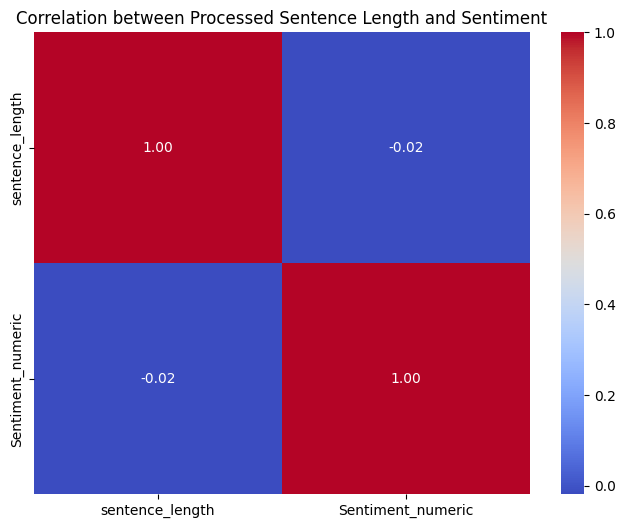

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
correlation = train_df[['sentence_length', 'Sentiment_numeric']].corr()

# Print correlation value
print("Correlation between processed sentence length and sentiment:", correlation.iloc[0, 1])

# Visualize correlation with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Processed Sentence Length and Sentiment')
plt.show()


#### Word Length and Diversity Features

These features capture the complexity and diversity of vocabulary used in expressing sentiment.


Correlation with Sentiment:
sentence_length     -0.015667
avg_word_length      0.007410
unique_word_ratio   -0.007229
syllable_count      -0.027303
Sentiment_numeric    1.000000
Name: Sentiment_numeric, dtype: float64


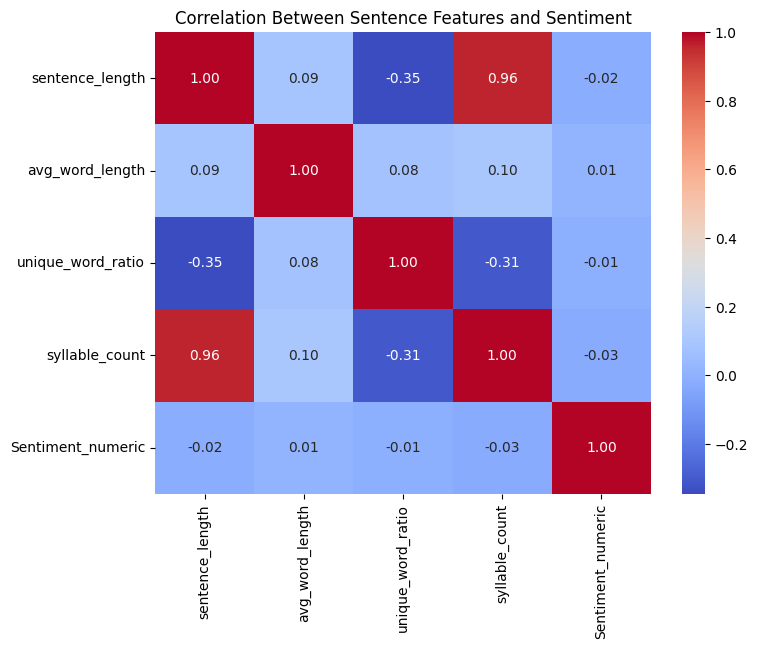

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Compute Average Word Length per Sentence
train_df['avg_word_length'] = train_df['processed_text'].apply(lambda x: np.mean([len(word) for word in x]) if x else 0)

# 2. Compute Unique Word Ratio
train_df['unique_word_ratio'] = train_df['processed_text'].apply(lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)

# 3. Compute Syllable Count (Assuming each Telugu vowel/consonant cluster is a syllable)
def count_syllables(sentence):
    vowels = "‡∞Ö‡∞Ü‡∞á‡∞à‡∞â‡∞ä‡∞ã‡∞é‡∞è‡∞ê‡∞í‡∞ì‡∞î‡∞æ‡∞ø‡±Ä‡±Å‡±Ç‡±É‡±Ü‡±á‡±à‡±ä‡±ã‡±å"  # Telugu vowel characters
    return sum(1 for char in sentence if char in vowels)

train_df['syllable_count'] = train_df['Sentence'].apply(count_syllables)

# Compute correlation with sentiment
correlation = train_df[['sentence_length', 'avg_word_length', 'unique_word_ratio', 'syllable_count', 'Sentiment_numeric']].corr()

# Print correlation values
print("Correlation with Sentiment:")
print(correlation['Sentiment_numeric'])

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Sentence Features and Sentiment')
plt.show()


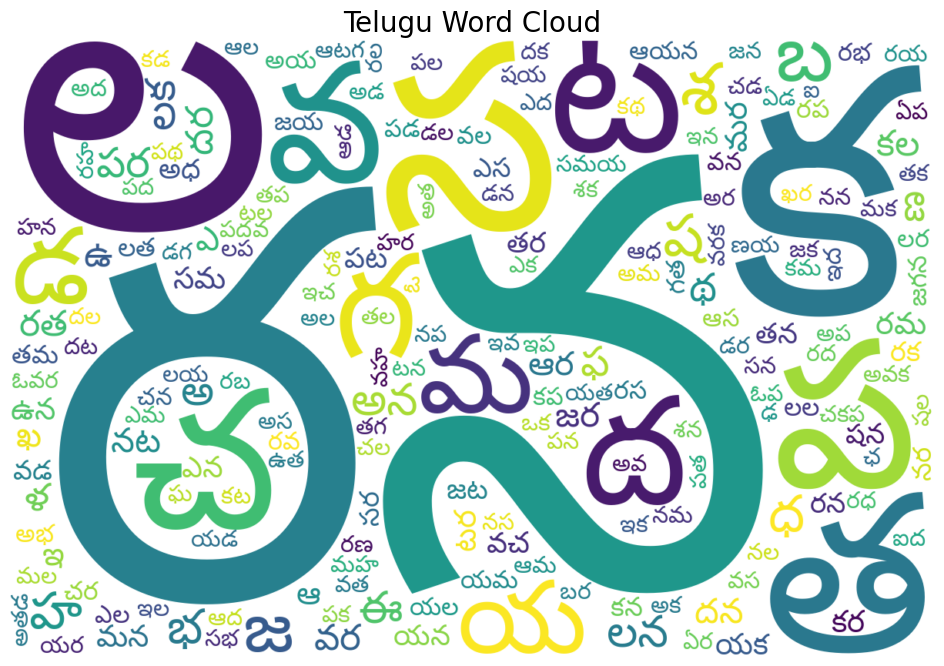

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine processed tokens into a single string of meaningful words
all_text = ' '.join([' '.join(tokens) for tokens in train_df['processed_text']])

# Generate word cloud with Telugu font
wordcloud = WordCloud(
    font_path='/content/NotoSansTelugu-Regular.ttf',  # Telugu font path
    width=1200,
    height=800,
    background_color='white',
    collocations=False  # Avoid combining words incorrectly
).generate(all_text)

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Telugu Word Cloud', fontsize=20)
plt.show()


In [ ]:
# !pip install gensim

In [ ]:
!pip install -q gensim


In [ ]:
!pip install numpy==1.23.5 gensim --force-reinstall --no-cache-dir


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.6/60.6 kB 10.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17.1/17.1 MB 211.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26.7/26.7 MB 260.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38.6/38.6 MB 275.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61.7/61.7 kB 323.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 83.2/83.2 kB 351.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found

### 3.2 Word Embeddings

Word embeddings capture semantic relationships between words in a numerical format.


# Generating embeddings

In [ ]:
from gensim.models import Word2Vec
import numpy as np

# Train on your processed Telugu tokens
word2vec_model = Word2Vec(
    sentences=train_df['processed_text'],
    vector_size=100,    # Embedding dimension
    window=5,           # Context window size
    min_count=1,        # Include rare words
    workers=4
)

# Function to create sentence embeddings
def get_sentence_vector(tokens):
    vectors = []
    for word in tokens:
        if word in word2vec_model.wv:
            vectors.append(word2vec_model.wv[word])
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)  # Handle empty sentences

# Apply to both train and test data
train_df['embeddings'] = train_df['processed_text'].apply(get_sentence_vector)
test_df['embeddings'] = test_df['processed_text'].apply(get_sentence_vector)


INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #10000, processed 97701 words, keeping 30190 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #20000, processed 196182 words, keeping 46890 word types
INFO:gensim.models.word2vec:collected 53157 word types from a corpus of 241254 raw words and 24599 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 53157 unique words (100.00% of original 53157, drops 0)', 'datetime': '2025-04-17T19:28:52.267190', 'gensim': '4.3.3', 'python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 241254 word corpus (100.00% of origina

In [ ]:
train_df.head()

Unnamed: 0                                           Sentence Sentiment  \
0       33982  ‡∞Ö‡∞Ø‡∞ø‡∞§‡±á ‡∞Ü‡∞Ø‡∞® ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï ‡∞§‡±ç‡∞µ‡∞Ç ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å ‡∞ï‡∞æ‡∞®‡±Ä ‡∞Ü‡∞Ø‡∞® ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™‡±ç...   neutral   
1       20617  ‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç ‡∞Æ‡∞Ç‡∞ö‡∞ø ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã ‡∞§‡∞∞‡∞ö‡±Ç ‡∞´‡±ã‡∞®‡±ç‚Äå‡∞≤‡±ã ‡∞Æ...   neutral   
2       27596  ‡∞¨‡∞æ‡∞≤‡±á‡∞ï‚Äå‡∞™‡±ã‡∞§‡±á ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç ‡∞Æ‡±Å‡∞Ç‡∞¶‡±á ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ ‡∞á‡∞≤‡∞æ ‡∞ú‚Äå‡∞∞‡±Å‡∞ó‡±Å‡∞§...       neg   
3       15772  ‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç ‡∞∑‡∞æ ‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø ‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‚Äå‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø ‡∞ú‚Äå‡∞∞‡∞ø‡∞ó‡∞ø‡∞® ‡∞ò‚Äå‡∞∞‡±ç...       neg   
4       33930  ‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü ‡∞∏‡±ç‡∞ü‡±ç‚Äå ‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã ‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ ‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®‡∞ø‡∞ß‡±Å‡∞≤‡±Å ‡∞é‡∞≤‡∞æ ‡∞µ‡±ç‡∞Ø...   neutral   

   Sentiment_numeric                                     processed_text  \
0                  0  [‡∞Ü‡∞Ø‡∞®, ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï, ‡∞§‡±ç‡∞µ‡∞Ç, ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å, ‡∞ï‡∞æ‡∞®‡±Ä, ‡∞Ü‡∞Ø‡∞®, ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™...   
1                  0  [‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç, ‡∞Æ‡∞Ç‡∞ö‡∞ø, ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å, ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã, ‡∞§‡∞∞‡∞ö‡±Ç, ‡∞´‡±ã‡∞®...   
2                 -1  [‡∞¨‡∞æ‡∞≤‡±á‡∞ï‡∞™‡±ã‡∞§‡±á, ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç, ‡∞Æ‡±Å‡∞Ç‡∞¶‡±á, ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ, ‡∞á‡∞≤‡∞æ, ‡∞ú‡∞∞...   
3                 -1  [‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç, ‡∞∑‡∞æ, ‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø, ‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø, ‡∞ú‡∞∞‡∞ø‡∞ó‡∞ø‡∞®, ...   
4                  0  [‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü, ‡∞∏‡±ç‡∞ü‡±ç, ‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã, ‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ, ‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®‡∞ø‡∞ß‡±Å‡∞≤‡±Å, ‡∞é‡∞≤...   

   sentence_length                                         embeddings  
0               15  [-0.22009362, 0.2453807, 0.17991552, 0.2033235...  
1                7  [-0.12647416, 0.13924645, 0.10139875, 0.118188...  
2                9  [-0.2035816, 0.2208925, 0.16030273, 0.1865403,...  
3                9  [-0.20145431, 0.21895322, 0.15570107, 0.180030...  
4               13  [-0.13468729, 0.14848815, 0.108613774, 0.12168...

In [ ]:
test_df.head()

Unnamed: 0                                           Sentence Sentiment  \
0         835                                  ‡∞∏‡∞´‡∞æ‡∞∞‡±Ä.. ‡∞à‡∞∏‡∞æ‡∞∞‡±à‡∞®‡∞æ?.   neutral   
1       26487  ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï‡±Å‡∞°‡±Å ‡∞¨‡∞∑‡±Ä‡∞∞‡±ç ‡∞Ü‡∞≤‡±Ç‡∞∞‡∞ø ‡∞Æ‡∞æ‡∞ü‡±ç‡∞≤‡∞æ‡∞°‡±Å‡∞§‡±Ç ‡∞Æ‡∞∞‡±ç‡∞°‡∞∞‡±ç ‡∞Æ‡∞ø‡∞∏‡±ç‡∞ü‡∞∞‡±Ä...   neutral   
2        6425  ‡∞ú‡∞ü‡±ç‡∞ü‡±Å‡∞≤‡±ã ‡∞é‡∞™‡±ç‡∞™‡±Å‡∞°‡±Ç ‡∞∏‡∞∞‡∞¶‡∞æ‡∞ó‡∞æ ‡∞â‡∞Ç‡∞°‡∞æ‡∞≤‡∞®‡±Å‡∞ï‡±Å‡∞Ç‡∞ü‡∞æ‡∞®‡±Å‚Äô ‡∞Ö‡∞®‡∞ø ‡∞Æ‡±ç‡∞Ø...   neutral   
3       18505  ‡∞á‡∞™‡±ç‡∞™‚Äå‡∞ü‡∞ø‡∞ï‡±á ‡∞ú‡±Ü‡∞°‡∞ø‡∞Ø‡±Å, ‡∞°‡∞ø‡∞é‡∞Ç‡∞ï‡±á‡∞≤‡±Å ‡∞∞‡∞ø‡∞ï‡±ç‡∞§ ‡∞π‚Äå‡∞∏‡±ç‡∞§‡∞Ç ‡∞ö‡±Ç‡∞™‡∞æ‡∞Ø‚Äå...       neg   
4       13360  ‡∞á‡∞Ç‡∞¶‡±Å‡∞≤‡±ã ‡∞Ö‡∞Æ‡±ç‡∞Æ‡∞µ‡∞æ‡∞∞‡±Å ‡∞Æ‡±Ç‡∞°‡±Å ‡∞ö‡±Å‡∞ü‡±ç‡∞≤‡±Å ‡∞§‡∞ø‡∞∞‡∞ø‡∞ó‡∞ø ‡∞≠‡∞ï‡±ç‡∞§‡±Å‡∞≤‡∞ï‡±Å ‡∞¶‡∞∞...   neutral   

                                      processed_text  sentence_length  \
0                                   [‡∞∏‡∞´‡∞æ‡∞∞‡±Ä, ‡∞à‡∞∏‡∞æ‡∞∞‡±à‡∞®‡∞æ]                2   
1  [‡∞¶‡∞∞‡±ç‡∞∂‡∞ï‡±Å‡∞°‡±Å, ‡∞¨‡∞∑‡±Ä‡∞∞‡±ç, ‡∞Ü‡∞≤‡±Ç‡∞∞‡∞ø, ‡∞Æ‡∞æ‡∞ü‡±ç‡∞≤‡∞æ‡∞°‡±Å‡∞§‡±Ç, ‡∞Æ‡∞∞‡±ç‡∞°‡∞∞‡±ç, ‡∞Æ...               11   
2  [‡∞ú‡∞ü‡±ç‡∞ü‡±Å‡∞≤‡±ã, ‡∞é‡∞™‡±ç‡∞™‡±Å‡∞°‡±Ç, ‡∞∏‡∞∞‡∞¶‡∞æ‡∞ó‡∞æ, ‡∞â‡∞Ç‡∞°‡∞æ‡∞≤‡∞®‡±Å‡∞ï‡±Å‡∞Ç‡∞ü‡∞æ‡∞®‡±Å, ‡∞Ö‡∞®‡∞ø...               10   
3  [‡∞ú‡±Ü‡∞°‡∞ø‡∞Ø‡±Å, ‡∞°‡∞ø‡∞é‡∞Ç‡∞ï‡±á‡∞≤‡±Å, ‡∞∞‡∞ø‡∞ï‡±ç‡∞§, ‡∞π‡∞∏‡±ç‡∞§‡∞Ç, ‡∞ö‡±Ç‡∞™‡∞æ‡∞Ø‡∞®‡∞ø, ‡∞¶‡±Ä‡∞Ç‡∞§...               18   
4  [‡∞á‡∞Ç‡∞¶‡±Å‡∞≤‡±ã, ‡∞Ö‡∞Æ‡±ç‡∞Æ‡∞µ‡∞æ‡∞∞‡±Å, ‡∞Æ‡±Ç‡∞°‡±Å, ‡∞ö‡±Å‡∞ü‡±ç‡∞≤‡±Å, ‡∞§‡∞ø‡∞∞‡∞ø‡∞ó‡∞ø, ‡∞≠‡∞ï‡±ç‡∞§‡±Å...                7   

                                          embeddings  
0  [-0.011394417, 0.005555006, 0.012374713, 0.010...  
1  [-0.16307902, 0.1824559, 0.1308686, 0.13924119...  
2  [-0.25622743, 0.27789003, 0.2000716, 0.2213171...  
3  [-0.10262481, 0.110949814, 0.0788806, 0.092206...  
4  [-0.18396835, 0.19596513, 0.1378673, 0.1573216...

In [ ]:
# Define sentiment mapping
sentiment_mapping = {'neutral': 0, 'neg': -1, 'pos': 1}

# Apply mapping (make sure the column name is exactly 'Sentiment')
train_df['Sentiment_numeric'] = train_df['Sentiment'].map(sentiment_mapping)
test_df['Sentiment_numeric'] = test_df['Sentiment'].map(sentiment_mapping)


In [ ]:
train_df.head()


Unnamed: 0                                           Sentence Sentiment  \
0       33982  ‡∞Ö‡∞Ø‡∞ø‡∞§‡±á ‡∞Ü‡∞Ø‡∞® ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï ‡∞§‡±ç‡∞µ‡∞Ç ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å ‡∞ï‡∞æ‡∞®‡±Ä ‡∞Ü‡∞Ø‡∞® ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™‡±ç...   neutral   
1       20617  ‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç ‡∞Æ‡∞Ç‡∞ö‡∞ø ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã ‡∞§‡∞∞‡∞ö‡±Ç ‡∞´‡±ã‡∞®‡±ç‚Äå‡∞≤‡±ã ‡∞Æ...   neutral   
2       27596  ‡∞¨‡∞æ‡∞≤‡±á‡∞ï‚Äå‡∞™‡±ã‡∞§‡±á ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç ‡∞Æ‡±Å‡∞Ç‡∞¶‡±á ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ ‡∞á‡∞≤‡∞æ ‡∞ú‚Äå‡∞∞‡±Å‡∞ó‡±Å‡∞§...       neg   
3       15772  ‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç ‡∞∑‡∞æ ‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø ‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‚Äå‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø ‡∞ú‚Äå‡∞∞‡∞ø‡∞ó‡∞ø‡∞® ‡∞ò‚Äå‡∞∞‡±ç...       neg   
4       33930  ‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü ‡∞∏‡±ç‡∞ü‡±ç‚Äå ‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã ‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ ‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®‡∞ø‡∞ß‡±Å‡∞≤‡±Å ‡∞é‡∞≤‡∞æ ‡∞µ‡±ç‡∞Ø...   neutral   

   Sentiment_numeric                                     processed_text  \
0                  0  [‡∞Ü‡∞Ø‡∞®, ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï, ‡∞§‡±ç‡∞µ‡∞Ç, ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å, ‡∞ï‡∞æ‡∞®‡±Ä, ‡∞Ü‡∞Ø‡∞®, ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™...   
1                  0  [‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç, ‡∞Æ‡∞Ç‡∞ö‡∞ø, ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å, ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã, ‡∞§‡∞∞‡∞ö‡±Ç, ‡∞´‡±ã‡∞®...   
2                 -1  [‡∞¨‡∞æ‡∞≤‡±á‡∞ï‡∞™‡±ã‡∞§‡±á, ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç, ‡∞Æ‡±Å‡∞Ç‡∞¶‡±á, ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ, ‡∞á‡∞≤‡∞æ, ‡∞ú‡∞∞...   
3                 -1  [‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç, ‡∞∑‡∞æ, ‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø, ‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø, ‡∞ú‡∞∞‡∞ø‡∞ó‡∞ø‡∞®, ...   
4                  0  [‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü, ‡∞∏‡±ç‡∞ü‡±ç, ‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã, ‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ, ‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®‡∞ø‡∞ß‡±Å‡∞≤‡±Å, ‡∞é‡∞≤...   

   sentence_length                                         embeddings  
0               15  [-0.22009362, 0.2453807, 0.17991552, 0.2033235...  
1                7  [-0.12647416, 0.13924645, 0.10139875, 0.118188...  
2                9  [-0.2035816, 0.2208925, 0.16030273, 0.1865403,...  
3                9  [-0.20145431, 0.21895322, 0.15570107, 0.180030...  
4               13  [-0.13468729, 0.14848815, 0.108613774, 0.12168...

#### Training Word2Vec on Telugu Data

We'll train a Word2Vec model specifically on our Telugu corpus to capture language-specific semantic relationships.


# Training evaluating the model with logistic regression and random forest on training data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Extract features and labels
X = np.vstack(train_df['embeddings'].values)
y = train_df['Sentiment_numeric'].values

# Step 2: Split into training and validation sets (e.g., 80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Train Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Step 4: Predict on validation data
y_pred = clf.predict(X_val)

# Step 5: Evaluate performance
print(classification_report(y_val, y_pred, target_names=['Negative', 'Neutral', 'Positive']))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       950
     Neutral       0.54      1.00      0.70      2643
    Positive       0.00      0.00      0.00      1327

    accuracy                           0.54      4920
   macro avg       0.18      0.33      0.23      4920
weighted avg       0.29      0.54      0.38      4920



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Features: Word embeddings only
X_embed_only = np.vstack(train_df['embeddings'].values)
y = train_df['Sentiment_numeric'].values

# Split the dataset
X_train1, X_val1, y_train1, y_val1 = train_test_split(
    X_embed_only, y, test_size=0.2, random_state=42, stratify=y)
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf1.fit(X_train1, y_train1)
y_pred1 = clf1.predict(X_val1)

print("=== Random Forest (Embeddings Only) ===")
print(classification_report(y_val1, y_pred1, target_names=['Negative', 'Neutral', 'Positive']))


=== Random Forest (Embeddings Only) ===
              precision    recall  f1-score   support

    Negative       0.31      0.02      0.04       950
     Neutral       0.54      0.95      0.69      2643
    Positive       0.44      0.08      0.13      1327

    accuracy                           0.54      4920
   macro avg       0.43      0.35      0.29      4920
weighted avg       0.47      0.54      0.41      4920



In [ ]:
# Stack embeddings and add sentence length as the last column
X_with_len = np.hstack([
    np.vstack(train_df['embeddings'].values),
    train_df['sentence_length'].values.reshape(-1, 1)  # make it a column vector
])
y = train_df['Sentiment_numeric'].values


# Training evaluating the model with logistic regression and random forest on training data with senence length

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_with_len, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_val)

# Evaluate
print(classification_report(y_val, y_pred, target_names=['Negative', 'Neutral', 'Positive']))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       950
     Neutral       0.54      1.00      0.70      2643
    Positive       0.00      0.00      0.00      1327

    accuracy                           0.54      4920
   macro avg       0.18      0.33      0.23      4920
weighted avg       0.29      0.54      0.38      4920



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Combine embeddings with sentence length
X_with_len = np.hstack([
    np.vstack(train_df['embeddings'].values),
    train_df['sentence_length'].values.reshape(-1, 1)
])

# Split the dataset
X_train2, X_val2, y_train2, y_val2 = train_test_split(
    X_with_len, y, test_size=0.2, random_state=42, stratify=y)

clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X_train2, y_train2)
y_pred2 = clf2.predict(X_val2)

print("=== Random Forest (Embeddings + Sentence Length) ===")
print(classification_report(y_val2, y_pred2, target_names=['Negative', 'Neutral', 'Positive']))




=== Random Forest (Embeddings + Sentence Length) ===
              precision    recall  f1-score   support

    Negative       0.26      0.01      0.03       950
     Neutral       0.54      0.95      0.69      2643
    Positive       0.39      0.07      0.12      1327

    accuracy                           0.53      4920
   macro avg       0.40      0.34      0.28      4920
weighted avg       0.45      0.53      0.41      4920



In [ ]:
# Save the DataFrame to a CSV file
train_df.to_csv('processed_train_data.csv', index=False)


### 3.3 POS Tagging Features

Part-of-speech information can help identify grammatical patterns associated with different sentiments.


# Adding pos tagging to the words and also adding the count of pos tags as features


In [ ]:
!pip install stanza
# Load Stanza

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 23.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 121.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 67.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 49.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [ ]:
# Load Stanza Telugu NLP model
import stanza

stanza.download('te')
nlp = stanza.Pipeline(lang='te', processors='tokenize,pos')

# Function for POS tagging
def pos_tag_telugu(text: str):
    """
    Perform POS tagging on Telugu text and return a list of POS tags.
    """
    doc = nlp(text)
    pos_tags = [word.upos for sent in doc.sentences for word in sent.words]  # Extract POS tags
    return pos_tags

# Apply POS tagging
train_df['pos_tags'] = train_df['Sentence'].apply(pos_tag_telugu)

# Show processed samples
print("Processed Examples:")
for i, row in train_df.head(3).iterrows():
    print(f"Original: {row['Sentence']}")
    print(f"Processed Tokens: {row['processed_text']}")
    print(f"POS Tags: {row['pos_tags']}\n")

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: te (Telugu) ...


INFO:stanza:Downloaded file to /root/stanza_resources/te/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: te (Telugu):
| Processor | Package    |
--------------------------
| tokenize  | mtg        |
| pos       | mtg_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Done loading processors!


Processed Examples:
Original: ‡∞Ö‡∞Ø‡∞ø‡∞§‡±á ‡∞Ü‡∞Ø‡∞® ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï ‡∞§‡±ç‡∞µ‡∞Ç ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å ‡∞ï‡∞æ‡∞®‡±Ä ‡∞Ü‡∞Ø‡∞® ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™‡±ç‡∞ü‡±ç‚Äå ‡∞µ‡∞∞‡±ç‡∞ï‡±ç‚Äå ‡∞Ö‡∞Ç‡∞¶‡∞ø‡∞Ç‡∞ö‡∞ø ‡∞®‡∞ø‡∞∞‡±ç‡∞Æ‡∞æ‡∞£ ‡∞≠‡∞æ‡∞ó‡∞∏‡±ç‡∞µ‡∞æ‡∞Æ‡∞ø‡∞ó‡∞æ ‡∞≠‡∞æ‡∞∞‡±Ä ‡∞ö‡∞ø‡∞§‡±ç‡∞∞‡∞æ‡∞®‡∞ø‡∞ï‡∞ø ‡∞∞‡±Ç‡∞™‡∞ï‡∞≤‡±ç‡∞™‡∞® ‡∞ö‡±á‡∞∏‡±ç‡∞§‡±Å‡∞®‡±ç‡∞®‡∞æ‡∞∞‡±Å.
Processed Tokens: ['‡∞Ü‡∞Ø‡∞®', '‡∞¶‡∞∞‡±ç‡∞∂‡∞ï', '‡∞§‡±ç‡∞µ‡∞Ç', '‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å', '‡∞ï‡∞æ‡∞®‡±Ä', '‡∞Ü‡∞Ø‡∞®', '‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™‡±ç‡∞ü‡±ç', '‡∞µ‡∞∞‡±ç‡∞ï‡±ç', '‡∞Ö‡∞Ç‡∞¶‡∞ø‡∞Ç‡∞ö‡∞ø', '‡∞®‡∞ø‡∞∞‡±ç‡∞Æ‡∞æ‡∞£', '‡∞≠‡∞æ‡∞ó‡∞∏‡±ç‡∞µ‡∞æ‡∞Æ‡∞ø‡∞ó‡∞æ', '‡∞≠‡∞æ‡∞∞‡±Ä', '‡∞ö‡∞ø‡∞§‡±ç‡∞∞‡∞æ‡∞®‡∞ø‡∞ï‡∞ø', '‡∞∞‡±Ç‡∞™‡∞ï‡∞≤‡±ç‡∞™‡∞®', '‡∞ö‡±á‡∞∏‡±ç‡∞§‡±Å‡∞®‡±ç‡∞®‡∞æ‡∞∞‡±Å']
POS Tags: ['ADV', 'PRON', 'NOUN', 'NOUN', 'VERB', 'SCONJ', 'PRON', 'NOUN', 'NOUN', 'VERB', 'NOUN', 'ADV', 'ADJ', 'NOUN', 'NOUN', 'VERB', 'PUNCT']

Original: ‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç ‡∞Æ‡∞Ç‡∞ö‡∞ø ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã ‡∞§‡∞∞‡∞

In [ ]:
train_df['pos_tags']

0        [ADV, PRON, NOUN, NOUN, VERB, SCONJ, PRON, NOU...
1                 [PRON, ADJ, NOUN, VERB, ADP, NOUN, VERB]
2        [VERB, SCONJ, NOUN, VERB, ADV, VERB, SCONJ, NO...
3        [PROPN, NOUN, NOUN, NOUN, VERB, NOUN, DET, NOU...
4        [NOUN, NOUN, NOUN, NOUN, ADP, ADV, NOUN, VERB,...
                               ...                        
24594    [NOUN, NOUN, NOUN, VERB, DET, NOUN, NOUN, NOUN...
24595                  [NOUN, NOUN, ADP, NOUN, NOUN, VERB]
24596                                         [INTJ, INTJ]
24597    [PROPN, PUNCT, PROPN, PROPN, NOUN, PUNCT, PROP...
24598                           [NUM, NUM, NUM, NUM, NOUN]
Name: pos_tags, Length: 24599, dtype: object

#### Extracting POS Statistics

Let's count different parts of speech and analyze their correlation with sentiment.


In [ ]:
# Define a function to count specific POS tags
def count_pos_tags(pos_list):
    return {
        'num_nouns': pos_list.count('NOUN'),
        'num_pronouns': pos_list.count('PRON'),
        'num_adjectives': pos_list.count('ADJ'),
        'num_verbs': pos_list.count('VERB')
    }

# Apply to the DataFrame column containing POS tag lists
pos_counts_df = train_df['pos_tags'].apply(count_pos_tags).apply(pd.Series)

# Concatenate the counts with the original DataFrame
train_df = pd.concat([train_df, pos_counts_df], axis=1)

# Preview
train_df[['pos_tags', 'num_nouns', 'num_pronouns', 'num_adjectives', 'num_verbs']].head()


pos_tags  num_nouns  num_pronouns  \
0  [ADV, PRON, NOUN, NOUN, VERB, SCONJ, PRON, NOU...          7             2   
1           [PRON, ADJ, NOUN, VERB, ADP, NOUN, VERB]          2             1   
2  [VERB, SCONJ, NOUN, VERB, ADV, VERB, SCONJ, NO...          2             0   
3  [PROPN, NOUN, NOUN, NOUN, VERB, NOUN, DET, NOU...          5             0   
4  [NOUN, NOUN, NOUN, NOUN, ADP, ADV, NOUN, VERB,...          6             1   

   num_adjectives  num_verbs  
0               1          3  
1               1          2  
2               0          4  
3               0          2  
4               0          3

In [ ]:
train_df.columns

Index(['Unnamed: 0', 'Sentence', 'Sentiment', 'Sentiment_numeric',
       'processed_text', 'sentence_length', 'embeddings', 'pos_tags',
       'num_nouns', 'num_pronouns', 'num_adjectives', 'num_verbs'],
      dtype='object')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
# Stack embeddings + engineered features
X = np.hstack([
    np.vstack(train_df['embeddings'].values),                      # Embeddings
    train_df[[ 'num_nouns',
              'num_pronouns', 'num_adjectives', 'num_verbs']].values  # Extra features
])
y = train_df['Sentiment_numeric'].values



X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_val)

print("=== Random Forest with All Features ===")
print(classification_report(y_val, y_pred_rf, target_names=['Negative', 'Neutral', 'Positive']))


=== Random Forest with All Features ===
              precision    recall  f1-score   support

    Negative       0.24      0.02      0.03       950
     Neutral       0.55      0.95      0.69      2643
    Positive       0.42      0.08      0.13      1327

    accuracy                           0.53      4920
   macro avg       0.40      0.35      0.28      4920
weighted avg       0.45      0.53      0.41      4920



In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_val)

print("=== Logistic Regression with All Features ===")
print(classification_report(y_val, y_pred_lr, target_names=['Negative', 'Neutral', 'Positive']))


=== Logistic Regression with All Features ===
              precision    recall  f1-score   support

    Negative       0.60      0.02      0.03       950
     Neutral       0.54      1.00      0.70      2643
    Positive       0.57      0.00      0.01      1327

    accuracy                           0.54      4920
   macro avg       0.57      0.34      0.25      4920
weighted avg       0.56      0.54      0.38      4920



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Combine sentence and POS numeric features
vectorizer = TfidfVectorizer(max_features=5000)

# Prepare target
y = train_df['Sentiment_numeric']

# Vectorize text
X_text = vectorizer.fit_transform(train_df['Sentence'])

X_full = np.hstack([
    X_text.toarray(),
    train_df[['num_nouns', 'num_verbs', 'num_adjectives', 'num_pronouns']].values
])


# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

# Train logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Evaluate
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.5855691056910569
              precision    recall  f1-score   support

          -1       0.51      0.25      0.33       924
           0       0.61      0.86      0.71      2697
           1       0.52      0.25      0.33      1299

    accuracy                           0.59      4920
   macro avg       0.54      0.45      0.46      4920
weighted avg       0.56      0.59      0.54      4920



Correlation matrix:
                    num_nouns  num_verbs  num_adjectives  num_pronouns  \
num_nouns           1.000000   0.443319        0.176241      0.002048   
num_verbs           0.443319   1.000000        0.076863      0.194846   
num_adjectives      0.176241   0.076863        1.000000     -0.024728   
num_pronouns        0.002048   0.194846       -0.024728      1.000000   
Sentiment_numeric  -0.014748  -0.074955        0.029683      0.001155   

                   Sentiment_numeric  
num_nouns                  -0.014748  
num_verbs                  -0.074955  
num_adjectives              0.029683  
num_pronouns                0.001155  
Sentiment_numeric           1.000000  


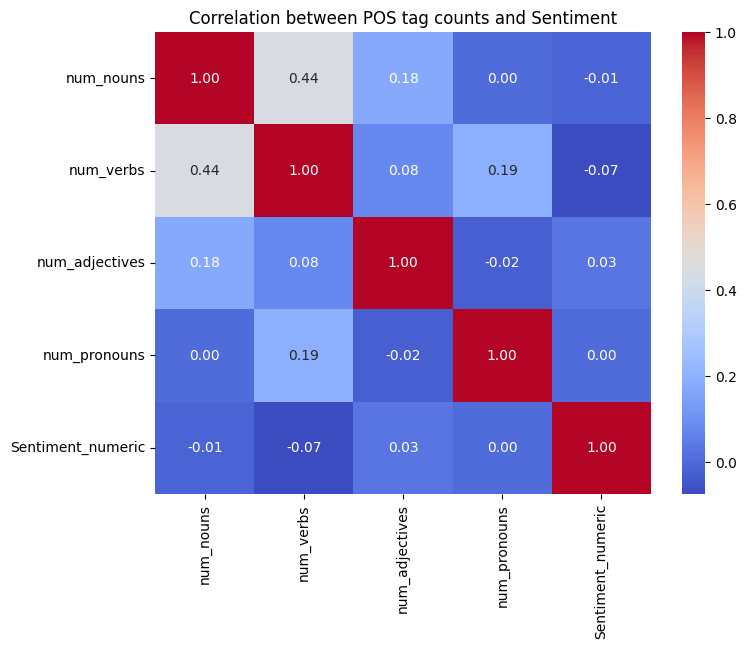

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
pos_cols = ['num_nouns', 'num_verbs', 'num_adjectives', 'num_pronouns', 'Sentiment_numeric']
corr_matrix = train_df[pos_cols].corr()

# Display correlation matrix
print("Correlation matrix:\n", corr_matrix)

# Optional: Visualize with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between POS tag counts and Sentiment")
plt.show()


Normalized Correlation matrix:
                      norm_num_nouns  norm_num_verbs  norm_num_adjectives  \
norm_num_nouns             1.000000        0.443319             0.176241   
norm_num_verbs             0.443319        1.000000             0.076863   
norm_num_adjectives        0.176241        0.076863             1.000000   
norm_num_pronouns          0.002048        0.194846            -0.024728   
Sentiment_numeric         -0.014748       -0.074955             0.029683   

                     norm_num_pronouns  Sentiment_numeric  
norm_num_nouns                0.002048          -0.014748  
norm_num_verbs                0.194846          -0.074955  
norm_num_adjectives          -0.024728           0.029683  
norm_num_pronouns             1.000000           0.001155  
Sentiment_numeric             0.001155           1.000000  


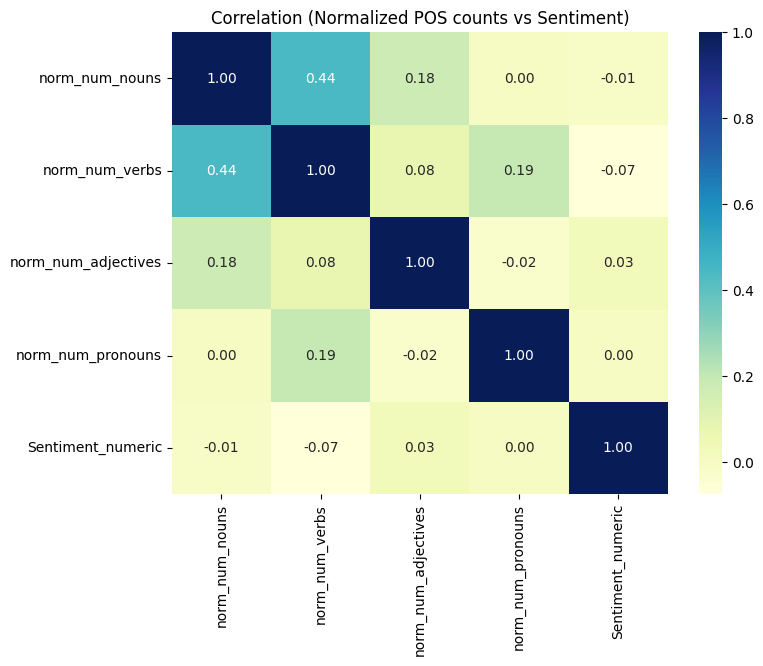

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select only POS count columns
pos_cols = ['num_nouns', 'num_verbs', 'num_adjectives', 'num_pronouns']

# Normalize POS columns using Min-Max Scaling
scaler = MinMaxScaler()
normalized_pos = scaler.fit_transform(train_df[pos_cols])

# Create new DataFrame for normalized values
normalized_df = pd.DataFrame(normalized_pos, columns=[f'norm_{col}' for col in pos_cols])

# Add sentiment column
normalized_df['Sentiment_numeric'] = train_df['Sentiment_numeric'].values

# Compute correlation
corr_matrix = normalized_df.corr()

# Print correlation matrix
print("Normalized Correlation matrix:\n", corr_matrix)

# Heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation (Normalized POS counts vs Sentiment)")
plt.show()


In [ ]:
train_df

Unnamed: 0                                           Sentence  \
0           33982  ‡∞Ö‡∞Ø‡∞ø‡∞§‡±á ‡∞Ü‡∞Ø‡∞® ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï ‡∞§‡±ç‡∞µ‡∞Ç ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å ‡∞ï‡∞æ‡∞®‡±Ä ‡∞Ü‡∞Ø‡∞® ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™‡±ç...   
1           20617  ‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç ‡∞Æ‡∞Ç‡∞ö‡∞ø ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã ‡∞§‡∞∞‡∞ö‡±Ç ‡∞´‡±ã‡∞®‡±ç‚Äå‡∞≤‡±ã ‡∞Æ...   
2           27596  ‡∞¨‡∞æ‡∞≤‡±á‡∞ï‚Äå‡∞™‡±ã‡∞§‡±á ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç ‡∞Æ‡±Å‡∞Ç‡∞¶‡±á ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ ‡∞á‡∞≤‡∞æ ‡∞ú‚Äå‡∞∞‡±Å‡∞ó‡±Å‡∞§...   
3           15772  ‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç ‡∞∑‡∞æ ‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø ‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‚Äå‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø ‡∞ú‚Äå‡∞∞‡∞ø‡∞ó‡∞ø‡∞® ‡∞ò‚Äå‡∞∞‡±ç...   
4           33930  ‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü ‡∞∏‡±ç‡∞ü‡±ç‚Äå ‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã ‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ ‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®‡∞ø‡∞ß‡±Å‡∞≤‡±Å ‡∞é‡∞≤‡∞æ ‡∞µ‡±ç‡∞Ø...   
...           ...                                                ...   
24594       15266  ‡∞∏‡±ç‡∞•‡∞æ‡∞®‡∞ø‡∞ï ‡∞é‡∞®‡±ç‡∞®‡∞ø‡∞ï‡∞≤‡∞ï‡±Å ‡∞∏‡∞Æ‡∞Ø‡∞Ç ‡∞Ü‡∞∏‡∞®‡±ç‡∞®‡∞Æ‡±à‡∞®‡∞¶‡∞®‡∞ø ‡∞Ö‡∞®‡±ç‡∞®‡∞ø ‡∞ó‡±ç‡∞∞‡∞æ‡∞Æ...   
24595       25732  ‡∞ü‡∞æ‡∞™‡∞ø‡∞ï‡±ç‡∞ï‡±Å‡∞≤‡±Å ‡∞∞‡∞æ‡∞ú‚Äå‡∞ï‡±Ä‡∞Ø‡∞æ‡∞≤ ‡∞®‡±Å‡∞Ç‡∞ö‡∞ø ‡∞ï‡±ç‡∞∞‡∞ø‡∞ï‡±Ü‡∞ü‡±ç‚Äå‡∞ï‡±Å ‡∞∑‡∞ø‡∞´‡±ç‡∞ü‡±ç ...   
24596       26401                                        ‡∞µ‡±Ü‡∞∞‡∞∏‡∞ø -‡∞∏‡±à‡∞∞‡∞æ   
24597       17663  ‡∞≠‡±ã‡∞™‡∞æ‡∞≤‡±ç‚Äå :¬† ‡∞ï‡±á‡∞Ç‡∞¶‡±ç‡∞∞ ‡∞Æ‡∞æ‡∞ú‡±Ä ‡∞Æ‡∞Ç‡∞§‡±ç‡∞∞‡∞ø, ‡∞ï‡∞æ‡∞Ç‡∞ó‡±ç‡∞∞‡±Ü‡∞∑‡±ç‚Äå ‡∞™‡∞æ‡∞∞‡±ç...   
24598       25902                     ‡∞¶‡∞æ‡∞¶‡∞æ‡∞™‡±Å ‡∞Æ‡±Ç‡∞°‡±Å ‡∞µ‡∞Ç‡∞¶‡∞≤ ‡∞ï‡±ã‡∞ü‡±ç‡∞≤ ‡∞¨‡∞°‡±ç‡∞ú‡±Ü‡∞ü‡±ç   

      Sentiment  Sentiment_numeric  \
0       neutral                  0   
1       neutral                  0   
2           neg                 -1   
3           neg                 -1   
4       neutral                  0   
...         ...                ...   
24594   neutral                  0   
24595   neutral                  0   
24596   neutral                  0   
24597   neutral                  0   
24598   neutral                  0   

                                          processed_text  sentence_length  \
0      [‡∞Ü‡∞Ø‡∞®, ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï, ‡∞§‡±ç‡∞µ‡∞Ç, ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å, ‡∞ï‡∞æ‡∞®‡±Ä, ‡∞Ü‡∞Ø‡∞®, ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™...               15   
1      [‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç, ‡∞Æ‡∞Ç‡∞ö‡∞ø, ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å, ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã, ‡∞§‡∞∞‡∞ö‡±Ç, ‡∞´‡±ã‡∞®...                7   
2      [‡∞¨‡∞æ‡∞≤‡±á‡∞ï‡∞™‡±ã‡∞§‡±á, ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç, ‡∞Æ‡±Å‡∞Ç‡∞¶‡±á, ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ, ‡∞á‡∞≤‡∞æ, ‡∞ú‡∞∞...                9   
3      [‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç, ‡∞∑‡∞æ, ‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø, ‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø, ‡∞ú‡∞∞‡∞ø‡∞ó‡∞ø‡∞®, ...                9   
4      [‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü, ‡∞∏‡±ç‡∞ü‡±ç, ‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã, ‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ, ‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®‡∞ø‡∞ß‡±Å‡∞≤‡±Å, ‡∞é‡∞≤...               13   
...                                                  ...              ...   
24594  [‡∞∏‡±ç‡∞•‡∞æ‡∞®‡∞ø‡∞ï, ‡∞é‡∞®‡±ç‡∞®‡∞ø‡∞ï‡∞≤‡∞ï‡±Å, ‡∞∏‡∞Æ‡∞Ø‡∞Ç, ‡∞Ü‡∞∏‡∞®‡±ç‡∞®‡∞Æ‡±à‡∞®‡∞¶‡∞®‡∞ø, ‡∞Ö‡∞®‡±ç‡∞®‡∞ø,...               11   
24595  [‡∞ü‡∞æ‡∞™‡∞ø‡∞ï‡±ç‡∞ï‡±Å‡∞≤‡±Å, ‡∞∞‡∞æ‡∞ú‡∞ï‡±Ä‡∞Ø‡∞æ‡∞≤, ‡∞®‡±Å‡∞Ç‡∞ö‡∞ø, ‡∞ï‡±ç‡∞∞‡∞ø‡∞ï‡±Ü‡∞ü‡±ç‡∞ï‡±Å, ‡∞∑‡∞ø‡∞´‡±ç...                6   
24596                                      [‡∞µ‡±Ü‡∞∞‡∞∏‡∞ø, ‡∞∏‡±à‡∞∞‡∞æ]                2   
24597  [‡∞≠‡±ã‡∞™‡∞æ‡∞≤‡±ç, ‡∞ï‡±á‡∞Ç‡∞¶‡±ç‡∞∞, ‡∞Æ‡∞æ‡∞ú‡±Ä, ‡∞Æ‡∞Ç‡∞§‡±ç‡∞∞‡∞ø, ‡∞ï‡∞æ‡∞Ç‡∞ó‡±ç‡∞∞‡±Ü‡∞∑‡±ç, ‡∞™‡∞æ‡∞∞‡±ç...               23   
24598                       [‡∞Æ‡±Ç‡∞°‡±Å, ‡∞µ‡∞Ç‡∞¶‡∞≤, ‡∞ï‡±ã‡∞ü‡±ç‡∞≤, ‡∞¨‡∞°‡±ç‡∞ú‡±Ü‡∞ü‡±ç]                4   

                                              embeddings  \
0      [-0.22009362, 0.2453807, 0.17991552, 0.2033235...   
1      [-0.12647416, 0.13924645, 0.10139875, 0.118188...   
2      [-0.2035816, 0.2208925, 0.16030273, 0.1865403,...   
3      [-0.20145431, 0.21895322, 0.15570107, 0.180030...   
4      [-0.13468729, 0.14848815, 0.108613774, 0.12168...   
...                                                  ...   
24594  [-

In [ ]:
# Save result (optional)
train_df.to_csv("pos_tagging.csv", index=False)

### 3.4 Sentiment Lexicon Features

Using sentiment lexicons to identify positive and negative words in Telugu text.


# Classing processed text into positive , negative , neutral words using words list

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/pos_tagging.csv')

In [ ]:
train_df

Unnamed: 0                                           Sentence  \
0           33982  ‡∞Ö‡∞Ø‡∞ø‡∞§‡±á ‡∞Ü‡∞Ø‡∞® ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï ‡∞§‡±ç‡∞µ‡∞Ç ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å ‡∞ï‡∞æ‡∞®‡±Ä ‡∞Ü‡∞Ø‡∞® ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™‡±ç...   
1           20617  ‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç ‡∞Æ‡∞Ç‡∞ö‡∞ø ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã ‡∞§‡∞∞‡∞ö‡±Ç ‡∞´‡±ã‡∞®‡±ç‚Äå‡∞≤‡±ã ‡∞Æ...   
2           27596  ‡∞¨‡∞æ‡∞≤‡±á‡∞ï‚Äå‡∞™‡±ã‡∞§‡±á ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç ‡∞Æ‡±Å‡∞Ç‡∞¶‡±á ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ ‡∞á‡∞≤‡∞æ ‡∞ú‚Äå‡∞∞‡±Å‡∞ó‡±Å‡∞§...   
3           15772  ‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç ‡∞∑‡∞æ ‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø ‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‚Äå‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø ‡∞ú‚Äå‡∞∞‡∞ø‡∞ó‡∞ø‡∞® ‡∞ò‚Äå‡∞∞‡±ç...   
4           33930  ‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü ‡∞∏‡±ç‡∞ü‡±ç‚Äå ‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã ‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ ‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®‡∞ø‡∞ß‡±Å‡∞≤‡±Å ‡∞é‡∞≤‡∞æ ‡∞µ‡±ç‡∞Ø...   
...           ...                                                ...   
24594       15266  ‡∞∏‡±ç‡∞•‡∞æ‡∞®‡∞ø‡∞ï ‡∞é‡∞®‡±ç‡∞®‡∞ø‡∞ï‡∞≤‡∞ï‡±Å ‡∞∏‡∞Æ‡∞Ø‡∞Ç ‡∞Ü‡∞∏‡∞®‡±ç‡∞®‡∞Æ‡±à‡∞®‡∞¶‡∞®‡∞ø ‡∞Ö‡∞®‡±ç‡∞®‡∞ø ‡∞ó‡±ç‡∞∞‡∞æ‡∞Æ...   
24595       25732  ‡∞ü‡∞æ‡∞™‡∞ø‡∞ï‡±ç‡∞ï‡±Å‡∞≤‡±Å ‡∞∞‡∞æ‡∞ú‚Äå‡∞ï‡±Ä‡∞Ø‡∞æ‡∞≤ ‡∞®‡±Å‡∞Ç‡∞ö‡∞ø ‡∞ï‡±ç‡∞∞‡∞ø‡∞ï‡±Ü‡∞ü‡±ç‚Äå‡∞ï‡±Å ‡∞∑‡∞ø‡∞´‡±ç‡∞ü‡±ç ...   
24596       26401                                        ‡∞µ‡±Ü‡∞∞‡∞∏‡∞ø -‡∞∏‡±à‡∞∞‡∞æ   
24597       17663  ‡∞≠‡±ã‡∞™‡∞æ‡∞≤‡±ç‚Äå :¬† ‡∞ï‡±á‡∞Ç‡∞¶‡±ç‡∞∞ ‡∞Æ‡∞æ‡∞ú‡±Ä ‡∞Æ‡∞Ç‡∞§‡±ç‡∞∞‡∞ø, ‡∞ï‡∞æ‡∞Ç‡∞ó‡±ç‡∞∞‡±Ü‡∞∑‡±ç‚Äå ‡∞™‡∞æ‡∞∞‡±ç...   
24598       25902                     ‡∞¶‡∞æ‡∞¶‡∞æ‡∞™‡±Å ‡∞Æ‡±Ç‡∞°‡±Å ‡∞µ‡∞Ç‡∞¶‡∞≤ ‡∞ï‡±ã‡∞ü‡±ç‡∞≤ ‡∞¨‡∞°‡±ç‡∞ú‡±Ü‡∞ü‡±ç   

      Sentiment  Sentiment_numeric  \
0       neutral                  0   
1       neutral                  0   
2           neg                 -1   
3           neg                 -1   
4       neutral                  0   
...         ...                ...   
24594   neutral                  0   
24595   neutral                  0   
24596   neutral                  0   
24597   neutral                  0   
24598   neutral                  0   

                                          processed_text  sentence_length  \
0      ['‡∞Ü‡∞Ø‡∞®', '‡∞¶‡∞∞‡±ç‡∞∂‡∞ï', '‡∞§‡±ç‡∞µ‡∞Ç', '‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å', '‡∞ï‡∞æ‡∞®‡±Ä', '‡∞Ü...               15   
1      ['‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç', '‡∞Æ‡∞Ç‡∞ö‡∞ø', '‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å', '‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã', '...                7   
2      ['‡∞¨‡∞æ‡∞≤‡±á‡∞ï‡∞™‡±ã‡∞§‡±á', '‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç', '‡∞Æ‡±Å‡∞Ç‡∞¶‡±á', '‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ',...                9   
3      ['‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç', '‡∞∑‡∞æ', '‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø', '‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø', ...                9   
4      ['‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü', '‡∞∏‡±ç‡∞ü‡±ç', '‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã', '‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ', '‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®...               13   
...                                                  ...              ...   
24594  ['‡∞∏‡±ç‡∞•‡∞æ‡∞®‡∞ø‡∞ï', '‡∞é‡∞®‡±ç‡∞®‡∞ø‡∞ï‡∞≤‡∞ï‡±Å', '‡∞∏‡∞Æ‡∞Ø‡∞Ç', '‡∞Ü‡∞∏‡∞®‡±ç‡∞®‡∞Æ‡±à‡∞®‡∞¶‡∞®‡∞ø'...               11   
24595  ['‡∞ü‡∞æ‡∞™‡∞ø‡∞ï‡±ç‡∞ï‡±Å‡∞≤‡±Å', '‡∞∞‡∞æ‡∞ú‡∞ï‡±Ä‡∞Ø‡∞æ‡∞≤', '‡∞®‡±Å‡∞Ç‡∞ö‡∞ø', '‡∞ï‡±ç‡∞∞‡∞ø‡∞ï‡±Ü‡∞ü‡±ç‡∞ï...                6   
24596                                  ['‡∞µ‡±Ü‡∞∞‡∞∏‡∞ø', '‡∞∏‡±à‡∞∞‡∞æ']                2   
24597  ['‡∞≠‡±ã‡∞™‡∞æ‡∞≤‡±ç', '‡∞ï‡±á‡∞Ç‡∞¶‡±ç‡∞∞', '‡∞Æ‡∞æ‡∞ú‡±Ä', '‡∞Æ‡∞Ç‡∞§‡±ç‡∞∞‡∞ø', '‡∞ï‡∞æ‡∞Ç‡∞ó‡±ç‡∞∞...               23   
24598               ['‡∞Æ‡±Ç‡∞°‡±Å', '‡∞µ‡∞Ç‡∞¶‡∞≤', '‡∞ï‡±ã‡∞ü‡±ç‡∞≤', '‡∞¨‡∞°‡±ç‡∞ú‡±Ü‡∞ü‡±ç']                4   

                                              embeddings  \
0      [-2.20093623e-01  2.45380700e-01  1.79915518e-...   
1      [-0.12647416  0.13924645  0.10139875  0.118188...   
2      [-0.2035816   0.2208925   0.16030273  0.186540...   
3      [-0.20145431  0.21895322  0.15570107  0.180030...   
4      [-0.13468729  0.14848815  0.10861377  0.121689...   
...                                                  ...   
24594  [-0.15416074  0.1761292   0.12412322  0.141045...   
24595  [-0.17613034  0.1915317   0.13171054  0.1476

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/pos_tagging.csv')

In [ ]:
import ast

def fix_list(row):
    if isinstance(row, list):
        return [str(w) for w in row if isinstance(w, str)]
    elif isinstance(row, str):
        try:
            parsed = ast.literal_eval(row)
            if isinstance(parsed, list):
                return [str(w) for w in parsed if isinstance(w, str)]
        except:
            return []
    return []

train_df["processed_text"] = train_df["processed_text"].apply(fix_list)


In [ ]:
train_df['processed_text'][0]

['‡∞Ü‡∞Ø‡∞®',
 '‡∞¶‡∞∞‡±ç‡∞∂‡∞ï',
 '‡∞§‡±ç‡∞µ‡∞Ç',
 '‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å',
 '‡∞ï‡∞æ‡∞®‡±Ä',
 '‡∞Ü‡∞Ø‡∞®',
 '‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™‡±ç‡∞ü‡±ç',
 '‡∞µ‡∞∞‡±ç‡∞ï‡±ç',
 '‡∞Ö‡∞Ç‡∞¶‡∞ø‡∞Ç‡∞ö‡∞ø',
 '‡∞®‡∞ø‡∞∞‡±ç‡∞Æ‡∞æ‡∞£',
 '‡∞≠‡∞æ‡∞ó‡∞∏‡±ç‡∞µ‡∞æ‡∞Æ‡∞ø‡∞ó‡∞æ',
 '‡∞≠‡∞æ‡∞∞‡±Ä',
 '‡∞ö‡∞ø‡∞§‡±ç‡∞∞‡∞æ‡∞®‡∞ø‡∞ï‡∞ø',
 '‡∞∞‡±Ç‡∞™‡∞ï‡∞≤‡±ç‡∞™‡∞®',
 '‡∞ö‡±á‡∞∏‡±ç‡∞§‡±Å‡∞®‡±ç‡∞®‡∞æ‡∞∞‡±Å']

#### Extracting Sentiment Statistics

Let's compute statistics about the sentiment distribution within each sentence.


In [ ]:
# 1. Install required packages
!pip install fasttext
!pip install pandas

# 2. Download and load FastText Telugu embeddings
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.te.300.bin.gz
!gunzip cc.te.300.bin.gz

import fasttext
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# 3. Load FastText model
print("Loading FastText model...")
ft_model = fasttext.load_model('cc.te.300.bin')
print("Model loaded.")



     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 73.4/73.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313501 sha256=15ec2034f3809f83043a957781329b7fcf54aa4dcc2ce1200773062325860307
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext
--2025-04-17 21:54:10--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.te.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.15, 13.226.210.78, 13.226.210.111, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.1

In [ ]:

with open('/content/pos.txt', 'r', encoding='utf-8') as f:
    positive_words = [line.strip().split('.')[0].split(',')[0] for line in f if line.strip()]

with open('/content/neg.txt', 'r', encoding='utf-8') as f:
    negative_words = [line.strip().split('.')[0].split(',')[0] for line in f if line.strip()]

# Create FastText vectors
pos_vecs = np.array([ft_model.get_word_vector(w) for w in positive_words])
neg_vecs = np.array([ft_model.get_word_vector(w) for w in negative_words])




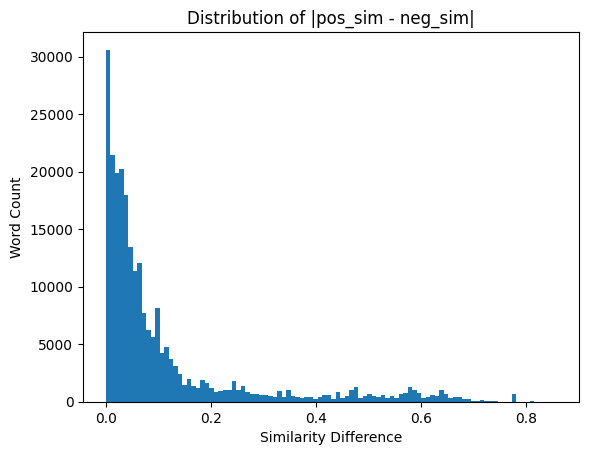

In [ ]:
diffs = []
for token_list in train_df['processed_text']:
    for token in token_list:
        word_vec = ft_model.get_word_vector(token).reshape(1, -1)
        pos_sim = cosine_similarity(word_vec, pos_vecs).max()
        neg_sim = cosine_similarity(word_vec, neg_vecs).max()
        diffs.append(abs(pos_sim - neg_sim))

import matplotlib.pyplot as plt
plt.hist(diffs, bins=100)
plt.title("Distribution of |pos_sim - neg_sim|")
plt.xlabel("Similarity Difference")
plt.ylabel("Word Count")
plt.show()


In [ ]:
diffs

[0.028337121,
 0.025114834,
 0.0034781992,
 0.12989226,
 0.46642762,
 0.028337121,
 0.041380584,
 0.053759336,
 0.13532439,
 0.0076394975,
 0.092094034,
 0.44091594,
 0.014677584,
 0.13058135,
 0.30721438,
 0.08648422,
 0.48008394,
 0.045254022,
 0.4806794,
 0.118023515,
 0.08558935,
 0.08843267,
 0.119692504,
 0.06034732,
 0.096018076,
 0.06963706,
 0.020348161,
 0.009847939,
 0.021506399,
 0.5775092,
 0.004318714,
 0.041834146,
 0.027600303,
 0.06327686,
 0.17017871,
 0.08570957,
 0.18909788,
 0.12588708,
 0.22700417,
 0.21854556,
 0.2550047,
 0.04797721,
 0.08320677,
 0.035575658,
 0.048692524,
 0.075021625,
 0.0072399676,
 0.011758447,
 0.021506399,
 0.011001378,
 0.10080397,
 0.16047257,
 0.25075936,
 0.015718102,
 0.1011354,
 0.57655895,
 0.0013924837,
 0.0023261309,
 0.07902348,
 0.04655865,
 0.16446793,
 0.076538205,
 0.1258297,
 0.108685285,
 0.41891038,
 0.012822866,
 0.08695501,
 0.09080976,
 0.013811439,
 0.035575658,
 0.005611509,
 0.050364017,
 0.063468456,
 0.025806308,


In [ ]:
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
from tqdm import tqdm

# Normalize vectors once
pos_vecs_norm = normalize(pos_vecs, axis=1)
neg_vecs_norm = normalize(neg_vecs, axis=1)


In [ ]:

# Cache normalized FastText vectors
word_vec_cache = {}
def get_cached_word_vector(word):
    if word not in word_vec_cache:
        vec = ft_model.get_word_vector(word).reshape(1, -1)
        word_vec_cache[word] = normalize(vec)
    return word_vec_cache[word]

# Classify a word using cosine similarity
def classify_word_fast(word, threshold=0.1):
    vec = get_cached_word_vector(word)
    pos_sim = np.dot(pos_vecs_norm, vec.T).max()
    neg_sim = np.dot(neg_vecs_norm, vec.T).max()

    if abs(pos_sim - neg_sim) < threshold:
        label = "neutral"
    elif pos_sim > neg_sim:
        label = "positive"
    else:
        label = "negative"
    return label, float(pos_sim), float(neg_sim)

# Classify all tokens in a sentence
def classify_words_in_sentence_fast(tokens, threshold=0.1):
    return [ (word, *classify_word_fast(word, threshold)) for word in tokens ]

# Apply classification
tqdm.pandas()
train_df["word_sentiments"] = train_df["processed_text"].progress_apply(classify_words_in_sentence_fast)

# Ensure: sum of pos + neg + neu counts == sentence length
def sentence_sentiment_stats_exact(ws):
    pos_count = neg_count = neu_count = 0
    pos_sum = neg_sum = neu_sum = 0.0

    for word, label, pos_sim, neg_sim in ws:
        if label == "positive":
            pos_count += 1
            pos_sum += pos_sim
        elif label == "negative":
            neg_count += 1
            neg_sum += neg_sim
        else:
            neu_count += 1
            neu_sum += max(pos_sim, neg_sim)

    total_tokens = len(ws)  # always equals pos + neg + neu count
    assert (pos_count + neg_count + neu_count == total_tokens)

    return {
        "pos_count": pos_count,
        "neg_count": neg_count,
        "neu_count": neu_count,
        "avg_pos_sim": pos_sum / pos_count if pos_count else 0.0,
        "avg_neg_sim": neg_sum / neg_count if neg_count else 0.0,
        "avg_neu_sim": neu_sum / neu_count if neu_count else 0.0,
    }



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24599/24599 [02:10<00:00, 189.00it/s]


In [ ]:
train_df["processed_text"].apply(len)

0        15
1         7
2         9
3         9
4        13
         ..
24594    11
24595     6
24596     2
24597    23
24598     4
Name: processed_text, Length: 24599, dtype: int64

In [ ]:
train_df['word_sentiments'].apply(len)

0        15
1         7
2         9
3         9
4        13
         ..
24594    11
24595     6
24596     2
24597    23
24598     4
Name: word_sentiments, Length: 24599, dtype: int64

In [ ]:
 # Compute features per sentence
sent_stats = train_df["word_sentiments"].progress_apply(sentence_sentiment_stats_exact).apply(pd.Series)

# Merge into train_df
train_df = pd.concat([train_df, sent_stats], axis=1)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24599/24599 [00:00<00:00, 207185.50it/s]


In [ ]:
train_df

Unnamed: 0                                           Sentence  \
0           33982  ‡∞Ö‡∞Ø‡∞ø‡∞§‡±á ‡∞Ü‡∞Ø‡∞® ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï ‡∞§‡±ç‡∞µ‡∞Ç ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å ‡∞ï‡∞æ‡∞®‡±Ä ‡∞Ü‡∞Ø‡∞® ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™‡±ç...   
1           20617  ‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç ‡∞Æ‡∞Ç‡∞ö‡∞ø ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã ‡∞§‡∞∞‡∞ö‡±Ç ‡∞´‡±ã‡∞®‡±ç‚Äå‡∞≤‡±ã ‡∞Æ...   
2           27596  ‡∞¨‡∞æ‡∞≤‡±á‡∞ï‚Äå‡∞™‡±ã‡∞§‡±á ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç ‡∞Æ‡±Å‡∞Ç‡∞¶‡±á ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ ‡∞á‡∞≤‡∞æ ‡∞ú‚Äå‡∞∞‡±Å‡∞ó‡±Å‡∞§...   
3           15772  ‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç ‡∞∑‡∞æ ‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø ‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‚Äå‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø ‡∞ú‚Äå‡∞∞‡∞ø‡∞ó‡∞ø‡∞® ‡∞ò‚Äå‡∞∞‡±ç...   
4           33930  ‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü ‡∞∏‡±ç‡∞ü‡±ç‚Äå ‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã ‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ ‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®‡∞ø‡∞ß‡±Å‡∞≤‡±Å ‡∞é‡∞≤‡∞æ ‡∞µ‡±ç‡∞Ø...   
...           ...                                                ...   
24594       15266  ‡∞∏‡±ç‡∞•‡∞æ‡∞®‡∞ø‡∞ï ‡∞é‡∞®‡±ç‡∞®‡∞ø‡∞ï‡∞≤‡∞ï‡±Å ‡∞∏‡∞Æ‡∞Ø‡∞Ç ‡∞Ü‡∞∏‡∞®‡±ç‡∞®‡∞Æ‡±à‡∞®‡∞¶‡∞®‡∞ø ‡∞Ö‡∞®‡±ç‡∞®‡∞ø ‡∞ó‡±ç‡∞∞‡∞æ‡∞Æ...   
24595       25732  ‡∞ü‡∞æ‡∞™‡∞ø‡∞ï‡±ç‡∞ï‡±Å‡∞≤‡±Å ‡∞∞‡∞æ‡∞ú‚Äå‡∞ï‡±Ä‡∞Ø‡∞æ‡∞≤ ‡∞®‡±Å‡∞Ç‡∞ö‡∞ø ‡∞ï‡±ç‡∞∞‡∞ø‡∞ï‡±Ü‡∞ü‡±ç‚Äå‡∞ï‡±Å ‡∞∑‡∞ø‡∞´‡±ç‡∞ü‡±ç ...   
24596       26401                                        ‡∞µ‡±Ü‡∞∞‡∞∏‡∞ø -‡∞∏‡±à‡∞∞‡∞æ   
24597       17663  ‡∞≠‡±ã‡∞™‡∞æ‡∞≤‡±ç‚Äå :¬† ‡∞ï‡±á‡∞Ç‡∞¶‡±ç‡∞∞ ‡∞Æ‡∞æ‡∞ú‡±Ä ‡∞Æ‡∞Ç‡∞§‡±ç‡∞∞‡∞ø, ‡∞ï‡∞æ‡∞Ç‡∞ó‡±ç‡∞∞‡±Ü‡∞∑‡±ç‚Äå ‡∞™‡∞æ‡∞∞‡±ç...   
24598       25902                     ‡∞¶‡∞æ‡∞¶‡∞æ‡∞™‡±Å ‡∞Æ‡±Ç‡∞°‡±Å ‡∞µ‡∞Ç‡∞¶‡∞≤ ‡∞ï‡±ã‡∞ü‡±ç‡∞≤ ‡∞¨‡∞°‡±ç‡∞ú‡±Ü‡∞ü‡±ç   

      Sentiment  Sentiment_numeric  \
0       neutral                  0   
1       neutral                  0   
2           neg                 -1   
3           neg                 -1   
4       neutral                  0   
...         ...                ...   
24594   neutral                  0   
24595   neutral                  0   
24596   neutral                  0   
24597   neutral                  0   
24598   neutral                  0   

                                          processed_text  sentence_length  \
0      [‡∞Ü‡∞Ø‡∞®, ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï, ‡∞§‡±ç‡∞µ‡∞Ç, ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å, ‡∞ï‡∞æ‡∞®‡±Ä, ‡∞Ü‡∞Ø‡∞®, ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™...               15   
1      [‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç, ‡∞Æ‡∞Ç‡∞ö‡∞ø, ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å, ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã, ‡∞§‡∞∞‡∞ö‡±Ç, ‡∞´‡±ã‡∞®...                7   
2      [‡∞¨‡∞æ‡∞≤‡±á‡∞ï‡∞™‡±ã‡∞§‡±á, ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç, ‡∞Æ‡±Å‡∞Ç‡∞¶‡±á, ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ, ‡∞á‡∞≤‡∞æ, ‡∞ú‡∞∞...                9   
3      [‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç, ‡∞∑‡∞æ, ‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø, ‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø, ‡∞ú‡∞∞‡∞ø‡∞ó‡∞ø‡∞®, ...                9   
4      [‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü, ‡∞∏‡±ç‡∞ü‡±ç, ‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã, ‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ, ‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®‡∞ø‡∞ß‡±Å‡∞≤‡±Å, ‡∞é‡∞≤...               13   
...                                                  ...              ...   
24594  [‡∞∏‡±ç‡∞•‡∞æ‡∞®‡∞ø‡∞ï, ‡∞é‡∞®‡±ç‡∞®‡∞ø‡∞ï‡∞≤‡∞ï‡±Å, ‡∞∏‡∞Æ‡∞Ø‡∞Ç, ‡∞Ü‡∞∏‡∞®‡±ç‡∞®‡∞Æ‡±à‡∞®‡∞¶‡∞®‡∞ø, ‡∞Ö‡∞®‡±ç‡∞®‡∞ø,...               11   
24595  [‡∞ü‡∞æ‡∞™‡∞ø‡∞ï‡±ç‡∞ï‡±Å‡∞≤‡±Å, ‡∞∞‡∞æ‡∞ú‡∞ï‡±Ä‡∞Ø‡∞æ‡∞≤, ‡∞®‡±Å‡∞Ç‡∞ö‡∞ø, ‡∞ï‡±ç‡∞∞‡∞ø‡∞ï‡±Ü‡∞ü‡±ç‡∞ï‡±Å, ‡∞∑‡∞ø‡∞´‡±ç...                6   
24596                                      [‡∞µ‡±Ü‡∞∞‡∞∏‡∞ø, ‡∞∏‡±à‡∞∞‡∞æ]                2   
24597  [‡∞≠‡±ã‡∞™‡∞æ‡∞≤‡±ç, ‡∞ï‡±á‡∞Ç‡∞¶‡±ç‡∞∞, ‡∞Æ‡∞æ‡∞ú‡±Ä, ‡∞Æ‡∞Ç‡∞§‡±ç‡∞∞‡∞ø, ‡∞ï‡∞æ‡∞Ç‡∞ó‡±ç‡∞∞‡±Ü‡∞∑‡±ç, ‡∞™‡∞æ‡∞∞‡±ç...               23   
24598                       [‡∞Æ‡±Ç‡∞°‡±Å, ‡∞µ‡∞Ç‡∞¶‡∞≤, ‡∞ï‡±ã‡∞ü‡±ç‡∞≤, ‡∞¨‡∞°‡±ç‡∞ú‡±Ü‡∞ü‡±ç]                4   

                                              embeddings  \
0      [-2.20093623e-01  2.45380700e-01  1.79915518e-...   
1      [-0.12647416  0.13924645  0.10139875  0.118188...   
2      [-0.2035816   0.2208925   0.16030273  0.186540...   
3      [-0.20145431  0.21895322  0.15570107  0.180030...   
4      [-0.13468729  0.14848815  0.10861377  0.121689...   
...                                                  ...   
24594  [-

In [ ]:
# Save result (optional)
train_df.to_csv("train_df_poscounts.csv", index=False)

In [ ]:
train_df.columns

Index(['Unnamed: 0', 'Sentence', 'Sentiment', 'Sentiment_numeric',
       'processed_text', 'sentence_length', 'embeddings', 'pos_tags',
       'num_nouns', 'num_pronouns', 'num_adjectives', 'num_verbs',
       'word_sentiments', 'pos_count', 'neg_count', 'neu_count', 'avg_pos_sim',
       'avg_neg_sim', 'avg_neu_sim'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Step 1: Select relevant features (numeric ones)
features = [
    'sentence_length', 'num_nouns', 'num_pronouns', 'num_adjectives', 'num_verbs',
    'pos_count', 'neg_count', 'neu_count',
    'avg_pos_sim', 'avg_neg_sim', 'avg_neu_sim'
]
X = train_df[features]
y = train_df['Sentiment_numeric']  # Assuming it's already encoded as -1, 0, 1

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("üìä Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred_logreg))

# Feature importance (coefficients)
feature_importance_logreg = pd.DataFrame({
    "Feature": features,
    "Coefficient": logreg.coef_[0]
}).sort_values(by="Coefficient", key=lambda x: x.abs(), ascending=False)

print("\nüîç Logistic Regression Feature Importance (sorted by absolute value):")
print(feature_importance_logreg)

# Step 4: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nüìä Random Forest Performance:\n")
print(classification_report(y_test, y_pred_rf))

# Feature importance
feature_importance_rf = pd.DataFrame({
    "Feature": features,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nüå≤ Random Forest Feature Importance:")
print(feature_importance_rf)


üìä Logistic Regression Performance:

              precision    recall  f1-score   support

          -1       0.58      0.46      0.52       924
           0       0.62      0.83      0.71      2697
           1       0.58      0.25      0.35      1299

    accuracy                           0.61      4920
   macro avg       0.60      0.52      0.53      4920
weighted avg       0.60      0.61      0.58      4920


üîç Logistic Regression Feature Importance (sorted by absolute value):
            Feature  Coefficient
9       avg_neg_sim     2.146362
8       avg_pos_sim    -0.504651
6         neg_count     0.290600
5         pos_count    -0.218079
10      avg_neu_sim     0.080007
4         num_verbs     0.075590
7         neu_count    -0.064375
1         num_nouns     0.039453
2      num_pronouns    -0.030596
3    num_adjectives     0.029246
0   sentence_length     0.008147

üìä Random Forest Performance:

              precision    recall  f1-score   support

          -1       0.5

### 3.5 Clustering Features

Clustering can help identify semantic groups in our word embeddings.


#### K-means Clustering on Word Embeddings

We'll apply K-means clustering to group semantically similar words.


# Adding  dominant_cluster_ratio and cluster_entropy as features
]

In [ ]:
from sklearn.cluster import KMeans
from collections import Counter
from scipy.stats import entropy
import numpy as np
import pandas as pd
from tqdm import tqdm

# tqdm for progress tracking
tqdm.pandas()

# 1. Get all unique words from the processed text
unique_words = list({word for row in train_df['processed_text'] for word in row})

# 2. Extract FastText vectors
word_vectors = np.array([ft_model.get_word_vector(w) for w in tqdm(unique_words)])

# 3. Apply KMeans clustering (e.g., 10 clusters)
kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(word_vectors)

# 4. Build word ‚Üí cluster dictionary
word_cluster_map = dict(zip(unique_words, clusters))

# 5. Define function to compute dominant cluster ratio and entropy
def cluster_features(row):
    tokens = row['processed_text']
    assigned_clusters = [word_cluster_map[w] for w in tokens if w in word_cluster_map]
    cluster_counts = Counter(assigned_clusters)
    total = sum(cluster_counts.values())
    cluster_ratios = [v / total for v in cluster_counts.values()] if total > 0 else []
    return pd.Series({
        'dominant_cluster_ratio': max(cluster_ratios) if cluster_ratios else 0.0,
        'cluster_entropy': entropy(cluster_ratios) if cluster_ratios else 0.0
    })

# 6. Apply to train_df
cluster_df = train_df.progress_apply(cluster_features, axis=1)

# 7. Concatenate new features to train_df
train_df = pd.concat([train_df, cluster_df], axis=1)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24599/24599 [00:22<00:00, 1107.14it/s]


In [ ]:
train_df

Unnamed: 0                                           Sentence  \
0           33982  ‡∞Ö‡∞Ø‡∞ø‡∞§‡±á ‡∞Ü‡∞Ø‡∞® ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï ‡∞§‡±ç‡∞µ‡∞Ç ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å ‡∞ï‡∞æ‡∞®‡±Ä ‡∞Ü‡∞Ø‡∞® ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™‡±ç...   
1           20617  ‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç ‡∞Æ‡∞Ç‡∞ö‡∞ø ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã ‡∞§‡∞∞‡∞ö‡±Ç ‡∞´‡±ã‡∞®‡±ç‚Äå‡∞≤‡±ã ‡∞Æ...   
2           27596  ‡∞¨‡∞æ‡∞≤‡±á‡∞ï‚Äå‡∞™‡±ã‡∞§‡±á ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç ‡∞Æ‡±Å‡∞Ç‡∞¶‡±á ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ ‡∞á‡∞≤‡∞æ ‡∞ú‚Äå‡∞∞‡±Å‡∞ó‡±Å‡∞§...   
3           15772  ‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç ‡∞∑‡∞æ ‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø ‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‚Äå‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø ‡∞ú‚Äå‡∞∞‡∞ø‡∞ó‡∞ø‡∞® ‡∞ò‚Äå‡∞∞‡±ç...   
4           33930  ‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü ‡∞∏‡±ç‡∞ü‡±ç‚Äå ‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã ‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ ‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®‡∞ø‡∞ß‡±Å‡∞≤‡±Å ‡∞é‡∞≤‡∞æ ‡∞µ‡±ç‡∞Ø...   
...           ...                                                ...   
24594       15266  ‡∞∏‡±ç‡∞•‡∞æ‡∞®‡∞ø‡∞ï ‡∞é‡∞®‡±ç‡∞®‡∞ø‡∞ï‡∞≤‡∞ï‡±Å ‡∞∏‡∞Æ‡∞Ø‡∞Ç ‡∞Ü‡∞∏‡∞®‡±ç‡∞®‡∞Æ‡±à‡∞®‡∞¶‡∞®‡∞ø ‡∞Ö‡∞®‡±ç‡∞®‡∞ø ‡∞ó‡±ç‡∞∞‡∞æ‡∞Æ...   
24595       25732  ‡∞ü‡∞æ‡∞™‡∞ø‡∞ï‡±ç‡∞ï‡±Å‡∞≤‡±Å ‡∞∞‡∞æ‡∞ú‚Äå‡∞ï‡±Ä‡∞Ø‡∞æ‡∞≤ ‡∞®‡±Å‡∞Ç‡∞ö‡∞ø ‡∞ï‡±ç‡∞∞‡∞ø‡∞ï‡±Ü‡∞ü‡±ç‚Äå‡∞ï‡±Å ‡∞∑‡∞ø‡∞´‡±ç‡∞ü‡±ç ...   
24596       26401                                        ‡∞µ‡±Ü‡∞∞‡∞∏‡∞ø -‡∞∏‡±à‡∞∞‡∞æ   
24597       17663  ‡∞≠‡±ã‡∞™‡∞æ‡∞≤‡±ç‚Äå :¬† ‡∞ï‡±á‡∞Ç‡∞¶‡±ç‡∞∞ ‡∞Æ‡∞æ‡∞ú‡±Ä ‡∞Æ‡∞Ç‡∞§‡±ç‡∞∞‡∞ø, ‡∞ï‡∞æ‡∞Ç‡∞ó‡±ç‡∞∞‡±Ü‡∞∑‡±ç‚Äå ‡∞™‡∞æ‡∞∞‡±ç...   
24598       25902                     ‡∞¶‡∞æ‡∞¶‡∞æ‡∞™‡±Å ‡∞Æ‡±Ç‡∞°‡±Å ‡∞µ‡∞Ç‡∞¶‡∞≤ ‡∞ï‡±ã‡∞ü‡±ç‡∞≤ ‡∞¨‡∞°‡±ç‡∞ú‡±Ü‡∞ü‡±ç   

      Sentiment  Sentiment_numeric  \
0       neutral                  0   
1       neutral                  0   
2           neg                 -1   
3           neg                 -1   
4       neutral                  0   
...         ...                ...   
24594   neutral                  0   
24595   neutral                  0   
24596   neutral                  0   
24597   neutral                  0   
24598   neutral                  0   

                                          processed_text  sentence_length  \
0      [‡∞Ü‡∞Ø‡∞®, ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï, ‡∞§‡±ç‡∞µ‡∞Ç, ‡∞µ‡∞π‡∞ø‡∞Ç‡∞ö‡∞∞‡±Å, ‡∞ï‡∞æ‡∞®‡±Ä, ‡∞Ü‡∞Ø‡∞®, ‡∞∏‡±ç‡∞ï‡±ç‡∞∞‡∞ø‡∞™...               15   
1      [‡∞µ‡±Ä‡∞∞‡∞ø‡∞¶‡±ç‡∞¶‡∞∞‡±Ç, ‡∞Æ‡∞Ç‡∞ö‡∞ø, ‡∞Æ‡∞ø‡∞§‡±ç‡∞∞‡±Å‡∞≤‡±Å, ‡∞ï‡∞æ‡∞µ‡∞°‡∞Ç‡∞§‡±ã, ‡∞§‡∞∞‡∞ö‡±Ç, ‡∞´‡±ã‡∞®...                7   
2      [‡∞¨‡∞æ‡∞≤‡±á‡∞ï‡∞™‡±ã‡∞§‡±á, ‡∞Æ‡∞æ‡∞§‡±ç‡∞∞‡∞Ç, ‡∞Æ‡±Å‡∞Ç‡∞¶‡±á, ‡∞ö‡±Ü‡∞™‡±ç‡∞™‡∞æ‡∞®‡±Å‡∞ó‡∞æ, ‡∞á‡∞≤‡∞æ, ‡∞ú‡∞∞...                9   
3      [‡∞Ö‡∞Æ‡∞ø‡∞§‡±ç, ‡∞∑‡∞æ, ‡∞∞‡±ç‡∞Ø‡∞æ‡∞≤‡±Ä‡∞®‡∞ø, ‡∞Ö‡∞°‡±ç‡∞°‡±Å‡∞ï‡±ã‡∞µ‡∞°‡∞æ‡∞®‡∞ø‡∞ï‡∞ø, ‡∞ú‡∞∞‡∞ø‡∞ó‡∞ø‡∞®, ...                9   
4      [‡∞∞‡∞ø‡∞ï‡±ç‡∞µ‡±Ü, ‡∞∏‡±ç‡∞ü‡±ç, ‡∞™‡±á‡∞∞‡±Å‡∞§‡±ã, ‡∞Æ‡±Ä‡∞°‡∞ø‡∞Ø‡∞æ, ‡∞™‡±ç‡∞∞‡∞§‡∞ø‡∞®‡∞ø‡∞ß‡±Å‡∞≤‡±Å, ‡∞é‡∞≤...               13   
...                                                  ...              ...   
24594  [‡∞∏‡±ç‡∞•‡∞æ‡∞®‡∞ø‡∞ï, ‡∞é‡∞®‡±ç‡∞®‡∞ø‡∞ï‡∞≤‡∞ï‡±Å, ‡∞∏‡∞Æ‡∞Ø‡∞Ç, ‡∞Ü‡∞∏‡∞®‡±ç‡∞®‡∞Æ‡±à‡∞®‡∞¶‡∞®‡∞ø, ‡∞Ö‡∞®‡±ç‡∞®‡∞ø,...               11   
24595  [‡∞ü‡∞æ‡∞™‡∞ø‡∞ï‡±ç‡∞ï‡±Å‡∞≤‡±Å, ‡∞∞‡∞æ‡∞ú‡∞ï‡±Ä‡∞Ø‡∞æ‡∞≤, ‡∞®‡±Å‡∞Ç‡∞ö‡∞ø, ‡∞ï‡±ç‡∞∞‡∞ø‡∞ï‡±Ü‡∞ü‡±ç‡∞ï‡±Å, ‡∞∑‡∞ø‡∞´‡±ç...                6   
24596                                      [‡∞µ‡±Ü‡∞∞‡∞∏‡∞ø, ‡∞∏‡±à‡∞∞‡∞æ]                2   
24597  [‡∞≠‡±ã‡∞™‡∞æ‡∞≤‡±ç, ‡∞ï‡±á‡∞Ç‡∞¶‡±ç‡∞∞, ‡∞Æ‡∞æ‡∞ú‡±Ä, ‡∞Æ‡∞Ç‡∞§‡±ç‡∞∞‡∞ø, ‡∞ï‡∞æ‡∞Ç‡∞ó‡±ç‡∞∞‡±Ü‡∞∑‡±ç, ‡∞™‡∞æ‡∞∞‡±ç...               23   
24598                       [‡∞Æ‡±Ç‡∞°‡±Å, ‡∞µ‡∞Ç‡∞¶‡∞≤, ‡∞ï‡±ã‡∞ü‡±ç‡∞≤, ‡∞¨‡∞°‡±ç‡∞ú‡±Ü‡∞ü‡±ç]                4   

                                              embeddings  \
0      [-2.20093623e-01  2.45380700e-01  1.79915518e-...   
1      [-0.12647416  0.13924645  0.10139875  0.118188...   
2      [-0.2035816   0.2208925   0.16030273  0.186540...   
3      [-0.20145431  0.21895322  0.15570107  0.180030...   
4      [-0.13468729  0.14848815  0.10861377  0.121689...   
...                                                  ...   
24594  [-

## 4. Model Building

Now we'll build and evaluate different models for Telugu sentiment analysis.


### 4.1 Traditional ML Models

First, let's try traditional machine learning approaches.


#### Logistic Regression

Logistic regression provides a good baseline for classification tasks.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Step 1: Select relevant features (numeric ones)
features = [
    'sentence_length', 'num_nouns', 'num_pronouns', 'num_adjectives', 'num_verbs',
    'pos_count', 'neg_count', 'neu_count',
    'avg_pos_sim', 'avg_neg_sim', 'avg_neu_sim',
    'dominant_cluster_ratio', 'cluster_entropy'
]
X = train_df[features]
y = train_df['Sentiment_numeric']  # Assuming it's already encoded as -1, 0, 1

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("üìä Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred_logreg))

# Feature importance (coefficients)
feature_importance_logreg = pd.DataFrame({
    "Feature": features,
    "Coefficient": logreg.coef_[0]
}).sort_values(by="Coefficient", key=lambda x: x.abs(), ascending=False)

print("\nüîç Logistic Regression Feature Importance (sorted by absolute value):")
print(feature_importance_logreg)

# Step 4: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nüìä Random Forest Performance:\n")
print(classification_report(y_test, y_pred_rf))

# Feature importance
feature_importance_rf = pd.DataFrame({
    "Feature": features,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nüå≤ Random Forest Feature Importance:")
print(feature_importance_rf)


üìä Logistic Regression Performance:

              precision    recall  f1-score   support

          -1       0.58      0.46      0.52       924
           0       0.62      0.83      0.71      2697
           1       0.59      0.26      0.36      1299

    accuracy                           0.61      4920
   macro avg       0.60      0.52      0.53      4920
weighted avg       0.60      0.61      0.58      4920


üîç Logistic Regression Feature Importance (sorted by absolute value):
                   Feature  Coefficient
9              avg_neg_sim     2.145379
8              avg_pos_sim    -0.506101
11  dominant_cluster_ratio    -0.503219
6                neg_count     0.291095
5                pos_count    -0.219076
10             avg_neu_sim     0.122820
4                num_verbs     0.071990
12         cluster_entropy    -0.071631
7                neu_count    -0.064431
1                num_nouns     0.039664
2             num_pronouns    -0.029662
3           num_adjectives 

In [ ]:
# Save result (optional)
train_df.to_csv("final_df.csv", index=False)

#### Random Forest

Random Forest can capture more complex relationships in the data.


In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1) Define your numeric feature columns
numeric_features = [
    'sentence_length',
    'num_nouns',
    'num_pronouns',
    'num_adjectives',
    'num_verbs',
    'pos_count',
    'neg_count',
    'neu_count',
    'avg_pos_sim',
    'avg_neg_sim',
    'avg_neu_sim',
    'dominant_cluster_ratio',
    'cluster_entropy'
]

# 2) Prepare X_numeric and y
X_numeric = train_df[numeric_features]
y = train_df['Sentiment_numeric']

# 3) Build TF‚ÄìIDF on your token lists (join them back to strings)
train_df['processed_text_str'] = train_df['processed_text'].apply(lambda tokens: ' '.join(tokens))
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(train_df['processed_text_str'])

# 4) Combine TF‚ÄìIDF (sparse) with your numeric features
X_full = hstack([
    X_tfidf,
    csr_matrix(X_numeric.values)
])

# 5) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)

# ‚îÄ‚îÄ‚îÄ Logistic Regression ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("üìä Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred_logreg))

# 6) Feature importance: only your numeric features
numeric_start = X_tfidf.shape[1]             # TF‚ÄìIDF cols come first
coeffs_numeric = logreg.coef_[0][numeric_start:]

feature_importance_logreg = pd.DataFrame({
    'Feature': numeric_features,
    'Coefficient': coeffs_numeric
}).sort_values(
    by='Coefficient',
    key=lambda x: x.abs(),
    ascending=False
)

print("\nüîç Logistic Regression Feature Importance (numeric only):")
print(feature_importance_logreg)


# ‚îÄ‚îÄ‚îÄ Random Forest ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# RandomForestClassifier requires dense arrays
X_train_dense = X_train.toarray()
X_test_dense  = X_test.toarray()

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_dense, y_train)
y_pred_rf = rf.predict(X_test_dense)

print("\nüìä Random Forest Performance:\n")
print(classification_report(y_test, y_pred_rf))

# 7) RF feature importance: numeric only
importances_numeric = rf.feature_importances_[numeric_start:]

feature_importance_rf = pd.DataFrame({
    'Feature': numeric_features,
    'Importance': importances_numeric
}).sort_values(by='Importance', ascending=False)

print("\nüå≤ Random Forest Feature Importance (numeric only):")
print(feature_importance_rf)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


üìä Logistic Regression Performance:

              precision    recall  f1-score   support

          -1       0.63      0.55      0.59       950
           0       0.65      0.79      0.71      2643
           1       0.58      0.39      0.46      1327

    accuracy                           0.63      4920
   macro avg       0.62      0.57      0.59      4920
weighted avg       0.63      0.63      0.62      4920


üîç Logistic Regression Feature Importance (numeric only):
                   Feature  Coefficient
9              avg_neg_sim     2.052116
8              avg_pos_sim    -0.511803
10             avg_neu_sim     0.334163
6                neg_count     0.271634
11  dominant_cluster_ratio    -0.270972
5                pos_count    -0.199128
7                neu_count    -0.059409
4                num_verbs     0.043243
3           num_adjectives     0.039020
1                num_nouns     0.034244
2             num_pronouns    -0.032886
12         cluster_entropy     0.029413

# Analysis

Missing values:
 sentence_length           0
num_nouns                 0
num_pronouns              0
num_adjectives            0
num_verbs                 0
pos_count                 0
neg_count                 0
neu_count                 0
avg_pos_sim               0
avg_neg_sim               0
avg_neu_sim               0
dominant_cluster_ratio    0
cluster_entropy           0
dtype: int64


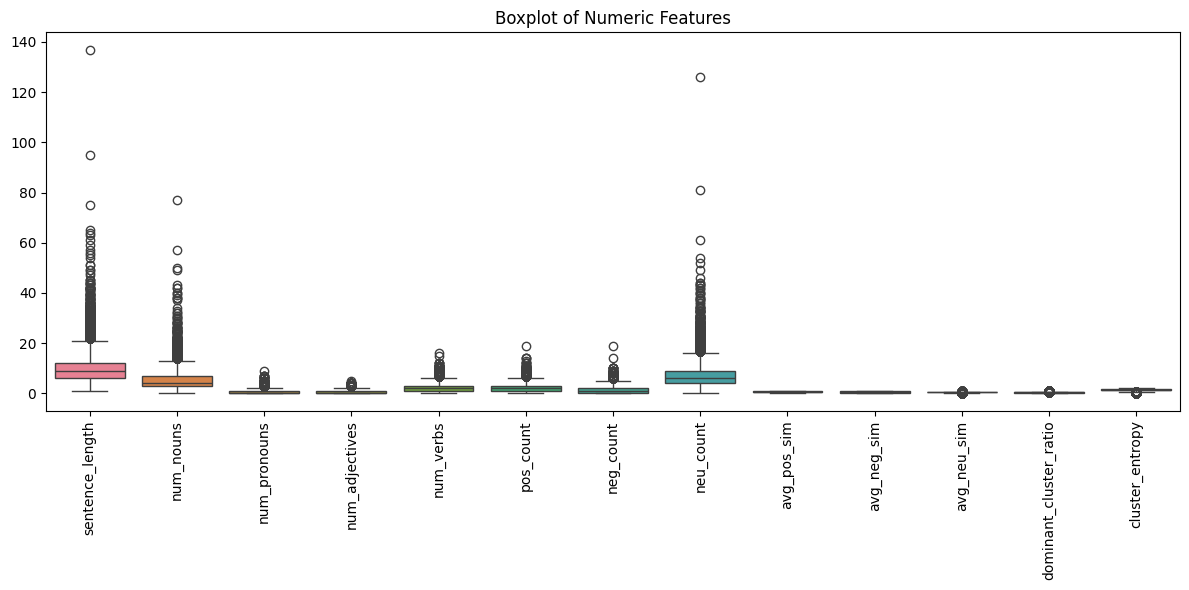


Standard scaled head:
    sentence_length  num_nouns  num_pronouns  num_adjectives  num_verbs  \
0         0.972985   0.543054      2.047688        1.206058   0.621020   
1        -0.526069  -0.898592      0.685019        1.206058  -0.096455   
2        -0.151305  -0.898592     -0.677651       -0.537672   1.338494   
3        -0.151305  -0.033605     -0.677651       -0.537672  -0.096455   
4         0.598222   0.254725      0.685019       -0.537672   0.621020   

   pos_count  neg_count  neu_count  avg_pos_sim  avg_neg_sim  avg_neu_sim  \
0   1.358193   0.729359   0.482125     0.595626     0.929580    -0.828436   
1   0.107390  -0.068715  -0.662025     0.453107     1.459105    -0.307759   
2  -0.518011  -0.068715   0.024465     1.249576     0.451813     1.440991   
3   0.107390   1.527434  -0.662025    -0.305792     0.681116    -0.517662   
4  -1.143412   2.325508   0.482125    -1.642965     0.625979    -0.096304   

   dominant_cluster_ratio  cluster_entropy  
0               -0.9305

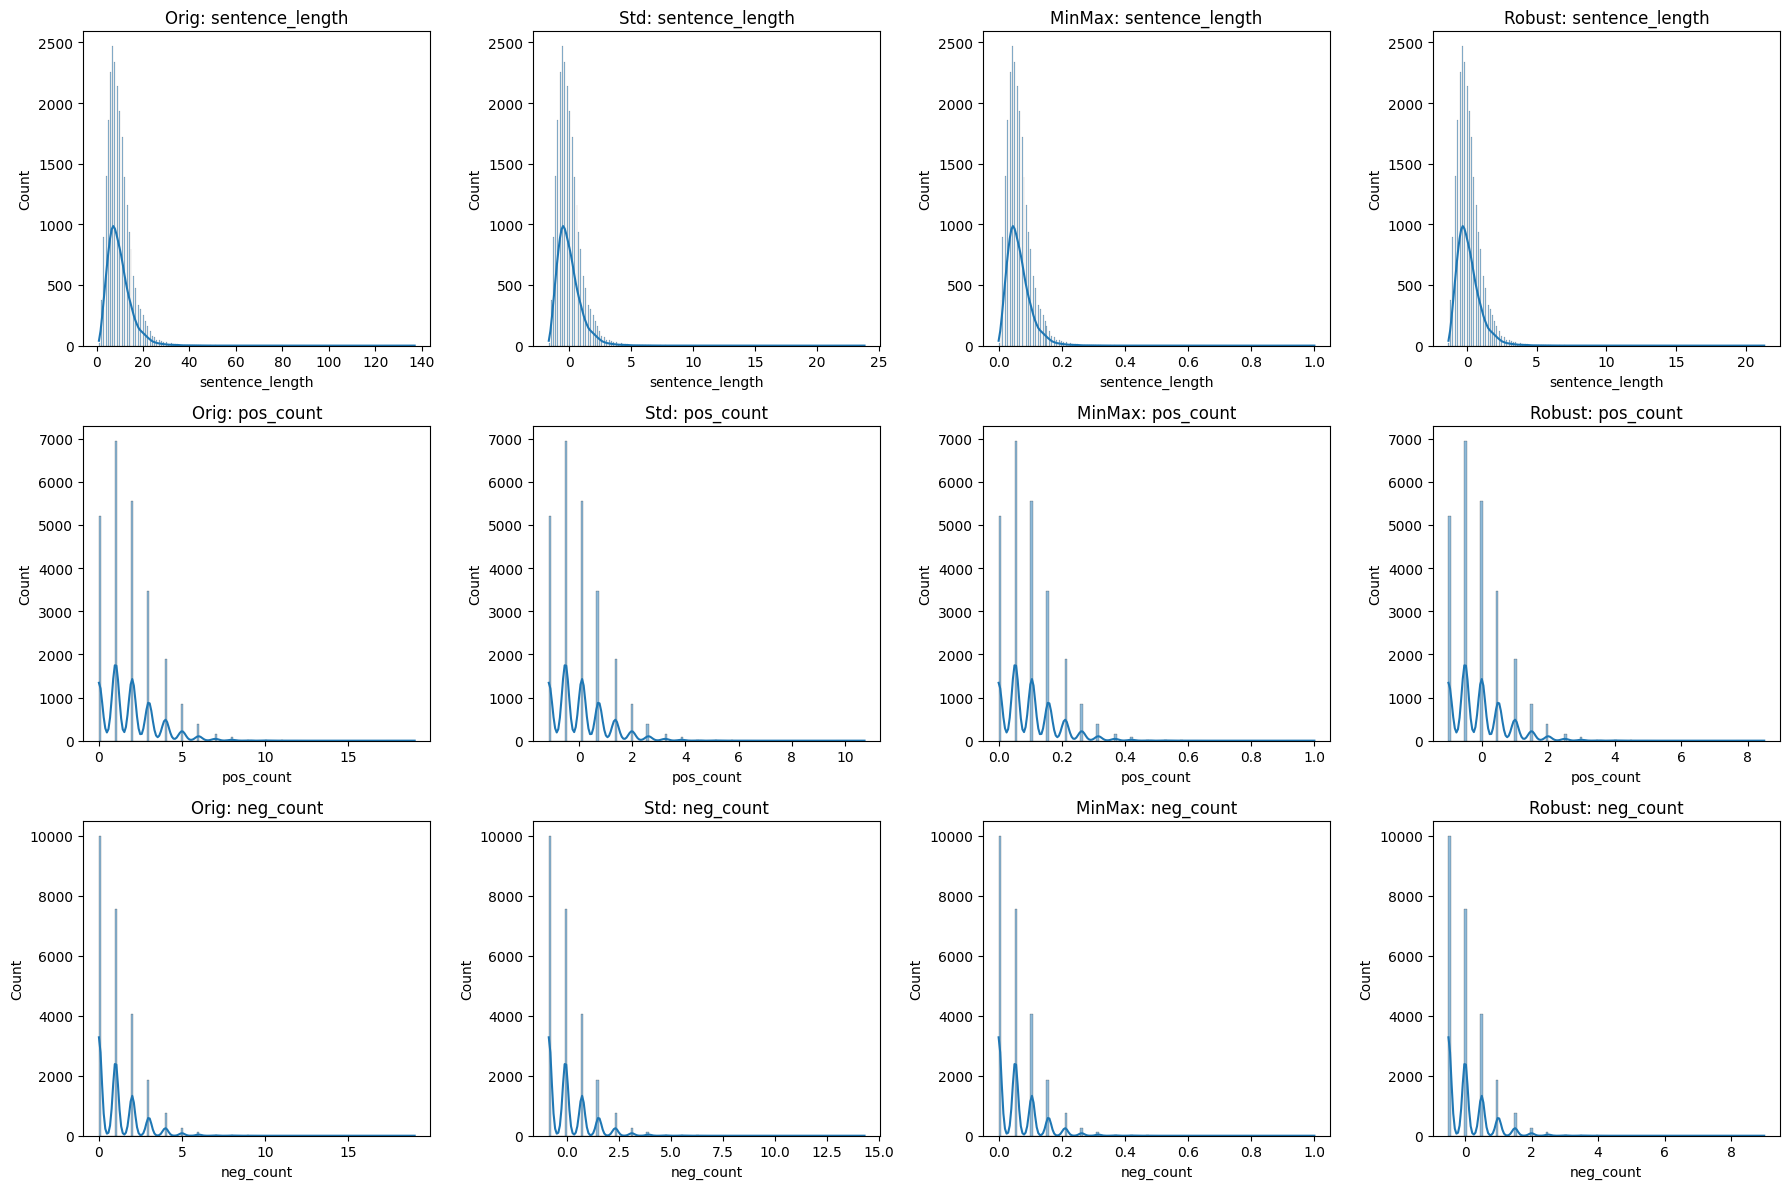

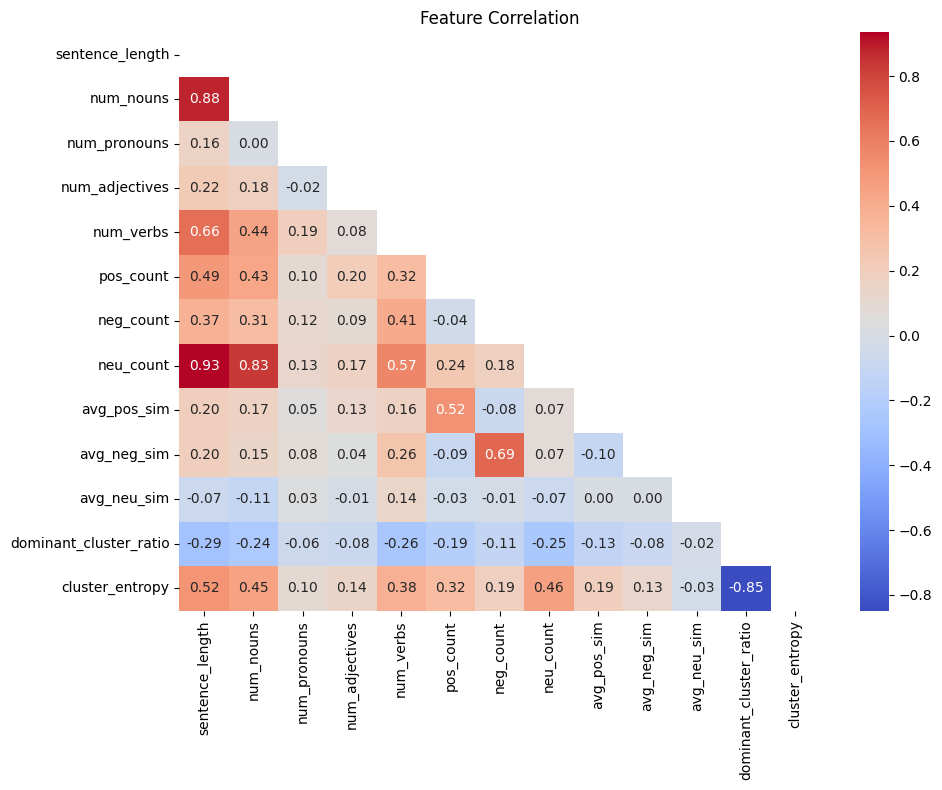

Could not form embeddings 2D array, skipping PCA.

Final processed shape: (24599, 13)
   sentence_length  num_nouns  num_pronouns  num_adjectives  num_verbs  \
0         1.000000       0.75           2.0             1.0        0.5   
1        -0.333333      -0.50           1.0             1.0        0.0   
2         0.000000      -0.50           0.0             0.0        1.0   
3         0.000000       0.25           0.0             0.0        0.0   
4         0.666667       0.50           1.0             0.0        0.5   

   pos_count  neg_count  neu_count  avg_pos_sim  avg_neg_sim  avg_neu_sim  \
0        1.0        0.5        0.6     0.273067     0.289374    -0.737371   
1        0.0        0.0       -0.4     0.169580     0.556991    -0.241712   
2       -0.5        0.0        0.2     0.747913     0.047914     1.423011   
3        0.0        1.0       -0.4    -0.381472     0.163802    -0.441529   
4       -1.0        1.5        0.6    -1.352421     0.135936    -0.040418   

   dom

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 0) Copy your train_df
df = train_df.copy()

# 1) Check for and impute missing numeric values
num_feats = [
    'sentence_length',
    'num_nouns', 'num_pronouns', 'num_adjectives', 'num_verbs',
    'pos_count', 'neg_count', 'neu_count',
    'avg_pos_sim', 'avg_neg_sim', 'avg_neu_sim',
    'dominant_cluster_ratio', 'cluster_entropy'
]
print("Missing values:\n", df[num_feats].isnull().sum())

if df[num_feats].isnull().any().any():
    imputer = SimpleImputer(strategy='mean')
    df[num_feats] = imputer.fit_transform(df[num_feats])

# 2) Outlier check (boxplot)
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_feats])
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Features")
plt.tight_layout()
plt.show()

# 3) Scaling
scaler_std = StandardScaler()
df_std = pd.DataFrame(scaler_std.fit_transform(df[num_feats]), columns=num_feats)

scaler_mm = MinMaxScaler()
df_mm = pd.DataFrame(scaler_mm.fit_transform(df[num_feats]), columns=num_feats)

scaler_rb = RobustScaler()
df_rb = pd.DataFrame(scaler_rb.fit_transform(df[num_feats]), columns=num_feats)

print("\nStandard scaled head:\n", df_std.head())
print("\nMinMax scaled head:\n", df_mm.head())
print("\nRobust scaled head:\n", df_rb.head())

# 4) Distribution plots for select features
features_to_plot = ['sentence_length', 'pos_count', 'neg_count']
fig, axes = plt.subplots(len(features_to_plot), 4, figsize=(18,12))
for i, f in enumerate(features_to_plot):
    sns.histplot(df[f], kde=True, ax=axes[i,0]).set_title(f"Orig: {f}")
    sns.histplot(df_std[f], kde=True, ax=axes[i,1]).set_title(f"Std: {f}")
    sns.histplot(df_mm[f], kde=True, ax=axes[i,2]).set_title(f"MinMax: {f}")
    sns.histplot(df_rb[f], kde=True, ax=axes[i,3]).set_title(f"Robust: {f}")
plt.tight_layout()
plt.show()

# 5) Correlation matrix
plt.figure(figsize=(10,8))
corr = df[num_feats].corr()
mask = np.triu(corr)
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.tight_layout()
plt.show()

# 6) PCA on embeddings (only if they form a proper 2D array)
has_embed = 'embeddings' in df.columns
emb_reduced = None

if has_embed:
    # try to stack into 2D array
    try:
        embeddings = np.vstack(df['embeddings'].values)
        if embeddings.ndim == 2:
            n_comp = min(50, embeddings.shape[1])
            pca = PCA(n_components=n_comp, random_state=42)
            emb_reduced = pca.fit_transform(embeddings)

            # plot explained variance
            plt.figure(figsize=(8,4))
            plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
            plt.xlabel("PCA components")
            plt.ylabel("Cumulative explained variance")
            plt.title("PCA on Embeddings")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

            print(f"Cumulative variance with {n_comp} comps:",
                  np.sum(pca.explained_variance_ratio_).round(4))
        else:
            print("Embeddings not 2D, skipping PCA.")
            has_embed = False
    except Exception:
        print("Could not form embeddings 2D array, skipping PCA.")
        has_embed = False

# 7) Assemble final processed features
# choose one scaled set (e.g. Robust)
processed = df_rb.reset_index(drop=True)

if has_embed and emb_reduced is not None:
    emb_cols = [f'emb_{i}' for i in range(emb_reduced.shape[1])]
    df_emb = pd.DataFrame(emb_reduced, columns=emb_cols).reset_index(drop=True)
    X_processed = pd.concat([processed, df_emb], axis=1)
else:
    X_processed = processed

print("\nFinal processed shape:", X_processed.shape)
print(X_processed.head())

# 8) Save to CSV
X_processed.to_csv("processed_train_df.csv", index=False)
print("Saved processed_train_df.csv")


# Hyperparameter Tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 0) Prepare features and labels
#    X_processed: your processed feature DataFrame
#    y: original sentiment labels (-1, 0, 1)
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî

# Map labels to 0,1,2 for XGBoost compatibility
label_map = {-1: 0, 0: 1, 1: 2}
y = train_df['Sentiment_numeric']
y_mapped = y.map(label_map)

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 1) Handle class imbalance with SMOTE
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y_mapped)

print("Original class distribution:", np.bincount(y_mapped))
print("Resampled class distribution:", np.bincount(y_resampled))

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 2) Train/Test split
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 3) Define models to evaluate
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 4) Train, cross-validate, and evaluate each model
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
results = {}
for name, model in models.items():
    # 4a) 5-fold CV on training data
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # 4b) Fit on full training set and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 4c) Metrics
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['neg','neu','pos'], output_dict=True)

    results[name] = {
        'model': model,
        'accuracy': acc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'report': report,
        'y_pred': y_pred
    }

    print(f"\n{name} Results:")
    print(f"  CV Accuracy: {cv_scores.mean():.4f} ¬± {cv_scores.std():.4f}")
    print(f"  Test Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=['neg','neu','pos']))

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 5) Select best model by test accuracy
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
best_name = max(results, key=lambda k: results[k]['accuracy'])
best_model = results[best_name]['model']
print(f"\n‚úÖ Best Model: {best_name} (Accuracy = {results[best_name]['accuracy']:.4f})")


Original class distribution: [ 4751 13213  6635]
Resampled class distribution: [13213 13213 13213]

Random Forest Results:
  CV Accuracy: 0.7237 ¬± 0.0060
  Test Accuracy: 0.7292
              precision    recall  f1-score   support

         neg       0.77      0.87      0.82      2642
         neu       0.68      0.61      0.64      2643
         pos       0.73      0.71      0.72      2643

    accuracy                           0.73      7928
   macro avg       0.73      0.73      0.73      7928
weighted avg       0.73      0.73      0.73      7928


Gradient Boosting Results:
  CV Accuracy: 0.6845 ¬± 0.0054
  Test Accuracy: 0.6855
              precision    recall  f1-score   support

         neg       0.72      0.82      0.77      2642
         neu       0.64      0.59      0.62      2643
         pos       0.68      0.64      0.66      2643

    accuracy                           0.69      7928
   macro avg       0.68      0.69      0.68      7928
weighted avg       0.68      0

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:31:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:31:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:31:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:31:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:31:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


XGBoost Results:
  CV Accuracy: 0.7110 ¬± 0.0046
  Test Accuracy: 0.7162
              precision    recall  f1-score   support

         neg       0.78      0.81      0.80      2642
         neu       0.64      0.68      0.66      2643
         pos       0.73      0.65      0.69      2643

    accuracy                           0.72      7928
   macro avg       0.72      0.72      0.72      7928
weighted avg       0.72      0.72      0.72      7928


‚úÖ Best Model: Random Forest (Accuracy = 0.7292)


In [ ]:

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 6) Hyperparameter tuning with GridSearchCV
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
if best_name == "Random Forest":
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
elif best_name == "Gradient Boosting":
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
elif best_name == "SVM":
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 0.01],
        'kernel': ['rbf', 'poly']
    }
else:  # XGBoost
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0]
    }

print(f"\nFine‚Äëtuning {best_name}...")
grid = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print(f"Best CV accuracy: {grid.best_score_:.4f}")





Fine‚Äëtuning Random Forest...


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV accuracy: 0.7274



Tuned Random Forest Test Accuracy: 0.7352
              precision    recall  f1-score   support

         neg       0.78      0.87      0.82      2642
         neu       0.69      0.62      0.65      2643
         pos       0.73      0.72      0.72      2643

    accuracy                           0.74      7928
   macro avg       0.73      0.74      0.73      7928
weighted avg       0.73      0.74      0.73      7928



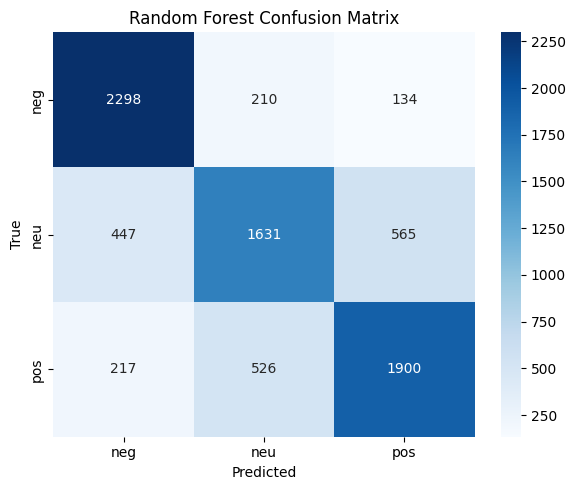

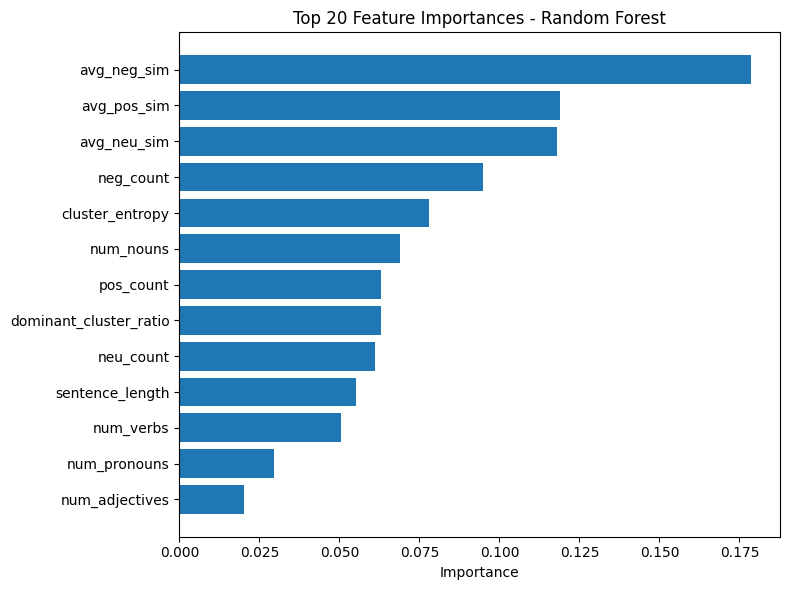

In [ ]:
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 7) Evaluate tuned model on test set
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
tuned = grid.best_estimator_
y_tuned = tuned.predict(X_test)
tuned_acc = accuracy_score(y_test, y_tuned)

print(f"\nTuned {best_name} Test Accuracy: {tuned_acc:.4f}")
print(classification_report(y_test, y_tuned, target_names=['neg','neu','pos']))

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 8) Confusion matrix visualization
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
cm = confusion_matrix(y_test, y_tuned)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['neg','neu','pos'], yticklabels=['neg','neu','pos'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"{best_name} Confusion Matrix")
plt.tight_layout()
plt.show()

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 9) Feature importance (if available)
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
if hasattr(tuned, 'feature_importances_'):
    importances = tuned.feature_importances_
    names = X_processed.columns
    idx = np.argsort(importances)[-20:]

    plt.figure(figsize=(8,6))
    plt.barh(range(len(idx)), importances[idx], align='center')
    plt.yticks(range(len(idx)), [names[i] for i in idx])
    plt.xlabel("Importance")
    plt.title(f"Top 20 Feature Importances - {best_name}")
    plt.tight_layout()
    plt.show()

### 4.2 Neural Network Models

Neural networks can learn more complex patterns in the data.


#### Hybrid Neural Network

This model combines word embeddings with engineered features for better performance.


#### Training Deep Learning models

In [ ]:
import ast
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 1) Prepare Data
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî

# a) If embeddings are stored as strings, parse them; otherwise assume they‚Äôre arrays
def parse_embed(x):
    if isinstance(x, str):
        # Handles space‚Äëseparated floats inside brackets
        return np.fromstring(x.strip("[]"), sep=' ', dtype=np.float32)
    else:
        return np.array(x, dtype=np.float32)

train_df['embeddings'] = train_df['embeddings'].apply(parse_embed)

# b) List all numeric feature columns except label/text columns
exclude = {
    'Unnamed: 0','Sentence','Sentiment','Sentiment_numeric',
    'processed_text','word_sentiments','embeddings','pos_tags'
}
numeric_features = [c for c in train_df.columns
                    if c not in exclude and train_df[c].dtype in [np.float32, np.float64, np.int64, np.int32]]

# c) Build feature arrays
X_embed = np.stack(train_df['embeddings'].values)      # shape: (N, embedding_dim)
X_num   = train_df[numeric_features].values.astype(np.float32)
y       = train_df['Sentiment_numeric'].values         # in [-1,0,1]

# d) Normalize numeric features
scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)

# e) Map labels from [-1,0,1] ‚Üí [0,1,2]
y_mapped = y + 1

# f) Train/validation split
X_emb_tr, X_emb_val, X_num_tr, X_num_val, y_tr, y_val = train_test_split(
    X_embed, X_num, y_mapped, test_size=0.2, random_state=42, stratify=y_mapped
)

# g) Convert to PyTorch tensors
X_emb_tr = torch.tensor(X_emb_tr, dtype=torch.float32)
X_num_tr = torch.tensor(X_num_tr, dtype=torch.float32)
y_tr     = torch.tensor(y_tr,     dtype=torch.long)

X_emb_val = torch.tensor(X_emb_val, dtype=torch.float32)
X_num_val = torch.tensor(X_num_val, dtype=torch.float32)
y_val     = torch.tensor(y_val,     dtype=torch.long)

# h) DataLoaders
train_ds = TensorDataset(X_emb_tr, X_num_tr, y_tr)
val_ds   = TensorDataset(X_emb_val, X_num_val, y_val)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=64)

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 2) Define the Hybrid Model
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
class HybridModel(nn.Module):
    def __init__(self, embedding_dim, num_features):
        super().__init__()
        self.pos_branch = nn.Sequential(
            nn.Linear(num_features, 16),
            nn.ReLU(),
            nn.Linear(16, 8)
        )
        self.fc = nn.Sequential(
            nn.Linear(embedding_dim + 8, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 3)
        )

    def forward(self, x_embed, x_num):
        # x_embed: (batch, embedding_dim)
        # x_num: (batch, num_features)
        pos_out = self.pos_branch(x_num)
        combined = torch.cat((x_embed, pos_out), dim=1)
        return self.fc(combined)

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 3) Training Setup
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HybridModel(
    embedding_dim=X_emb_tr.shape[1],
    num_features=X_num_tr.shape[1]
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

X_emb_tr = X_emb_tr.to(device)
X_num_tr = X_num_tr.to(device)
y_tr     = y_tr.to(device)
X_emb_val = X_emb_val.to(device)
X_num_val = X_num_val.to(device)
y_val     = y_val.to(device)

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 4) Training Loop
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
epochs = 100
for epoch in range(1, epochs+1):
    model.train()
    total_loss = 0
    for xb_emb, xb_num, yb in train_loader:
        xb_emb, xb_num, yb = xb_emb.to(device), xb_num.to(device), yb.to(device)
        preds = model(xb_emb, xb_num)
        loss = criterion(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch}/{epochs} ‚Äî Loss: {avg_loss:.4f}")

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 5) Validation
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
model.eval()
all_preds, all_true = [], []
with torch.no_grad():
    for xb_emb, xb_num, yb in val_loader:
        xb_emb, xb_num = xb_emb.to(device), xb_num.to(device)
        out = model(xb_emb, xb_num)
        preds = torch.argmax(out, dim=1)
        all_preds.append(preds.cpu().numpy())
        all_true.append(yb.cpu().numpy())

preds = np.concatenate(all_preds)
true  = np.concatenate(all_true)

# Map back to original labels [-1,0,1]
preds_report = preds - 1
true_report = true - 1

print(classification_report(true_report, preds_report, digits=4))



Epoch 1/100 ‚Äî Loss: 0.9149
Epoch 2/100 ‚Äî Loss: 0.8390
Epoch 3/100 ‚Äî Loss: 0.8279
Epoch 4/100 ‚Äî Loss: 0.8247
Epoch 5/100 ‚Äî Loss: 0.8241
Epoch 6/100 ‚Äî Loss: 0.8207
Epoch 7/100 ‚Äî Loss: 0.8203
Epoch 8/100 ‚Äî Loss: 0.8211
Epoch 9/100 ‚Äî Loss: 0.8163
Epoch 10/100 ‚Äî Loss: 0.8185
Epoch 11/100 ‚Äî Loss: 0.8187
Epoch 12/100 ‚Äî Loss: 0.8179
Epoch 13/100 ‚Äî Loss: 0.8139
Epoch 14/100 ‚Äî Loss: 0.8130
Epoch 15/100 ‚Äî Loss: 0.8137
Epoch 16/100 ‚Äî Loss: 0.8133
Epoch 17/100 ‚Äî Loss: 0.8128
Epoch 18/100 ‚Äî Loss: 0.8100
Epoch 19/100 ‚Äî Loss: 0.8115
Epoch 20/100 ‚Äî Loss: 0.8115
Epoch 21/100 ‚Äî Loss: 0.8089
Epoch 22/100 ‚Äî Loss: 0.8100
Epoch 23/100 ‚Äî Loss: 0.8099
Epoch 24/100 ‚Äî Loss: 0.8081
Epoch 25/100 ‚Äî Loss: 0.8063
Epoch 26/100 ‚Äî Loss: 0.8064
Epoch 27/100 ‚Äî Loss: 0.8078
Epoch 28/100 ‚Äî Loss: 0.8080
Epoch 29/100 ‚Äî Loss: 0.8079
Epoch 30/100 ‚Äî Loss: 0.8067
Epoch 31/100 ‚Äî Loss: 0.8076
Epoch 32/100 ‚Äî Loss: 0.8065
Epoch 33/100 ‚Äî Loss: 0.8063
Epoch 34/100 ‚Äî Lo

#### LSTM Model

Long Short-Term Memory networks are effective for sequence data like text.


In [ ]:
import ast
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 1) Prepare Data (same as your existing code)
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî

# a) If embeddings are stored as strings, parse them; otherwise assume they‚Äôre arrays
def parse_embed(x):
    if isinstance(x, str):
        # Handles space‚Äëseparated floats inside brackets
        return np.fromstring(x.strip("[]"), sep=' ', dtype=np.float32)
    else:
        return np.array(x, dtype=np.float32)

train_df['embeddings'] = train_df['embeddings'].apply(parse_embed)

# b) List all numeric feature columns except label/text columns
exclude = {
    'Unnamed: 0','Sentence','Sentiment','Sentiment_numeric',
    'processed_text','word_sentiments','embeddings','pos_tags'
}
numeric_features = [c for c in train_df.columns
                    if c not in exclude and train_df[c].dtype in [np.float32, np.float64, np.int64, np.int32]]

# c) Build feature arrays
X_embed = np.stack(train_df['embeddings'].values)      # shape: (N, embedding_dim)
X_num   = train_df[numeric_features].values.astype(np.float32)
y       = train_df['Sentiment_numeric'].values         # in [-1,0,1]

# d) Normalize numeric features
scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)

# e) Map labels from [-1,0,1] ‚Üí [0,1,2]
y_mapped = y + 1

# f) Train/validation split
X_emb_tr, X_emb_val, X_num_tr, X_num_val, y_tr, y_val = train_test_split(
    X_embed, X_num, y_mapped, test_size=0.2, random_state=42, stratify=y_mapped
)

# g) Convert to PyTorch tensors
X_emb_tr = torch.tensor(X_emb_tr, dtype=torch.float32)
X_num_tr = torch.tensor(X_num_tr, dtype=torch.float32)
y_tr     = torch.tensor(y_tr,     dtype=torch.long)

X_emb_val = torch.tensor(X_emb_val, dtype=torch.float32)
X_num_val = torch.tensor(X_num_val, dtype=torch.float32)
y_val     = torch.tensor(y_val,     dtype=torch.long)

# h) DataLoaders
train_ds = TensorDataset(X_emb_tr, X_num_tr, y_tr)
val_ds   = TensorDataset(X_emb_val, X_num_val, y_val)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=64)

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 2) Define the LSTM Model (replacing Hybrid Model)
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî

class LSTMModel(nn.Module):
    def __init__(self, embedding_dim, num_features, hidden_dim=64, num_layers=2):
        super().__init__()

        # LSTM Layer for embeddings (use embeddings as sequence data)
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_dim,
                            num_layers=num_layers, batch_first=True, dropout=0.3)

        # Linear layer for POS features
        self.pos_fc = nn.Sequential(
            nn.Linear(num_features, 16),
            nn.ReLU(),
            nn.Linear(16, 8)
        )

        # Final fully connected layer for classification
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim + 8, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 3)  # Output 3 classes
        )

    def forward(self, x_embed, x_num):
        # LSTM expects the embedding to have shape (batch_size, sequence_length, embedding_dim)
        # For simplicity, we treat the embedding as a sequence of length 1
        x_embed = x_embed.unsqueeze(1)  # Adding a dummy sequence dimension

        # LSTM forward pass for embeddings
        lstm_out, (hn, cn) = self.lstm(x_embed)
        lstm_out = hn[-1]  # Get the hidden state from the last layer

        # Process POS features
        pos_out = self.pos_fc(x_num)

        # Concatenate LSTM output and POS features
        combined = torch.cat((lstm_out, pos_out), dim=1)

        # Final classification layer
        return self.fc(combined)

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 3) Training Setup (same as your existing code)
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel(
    embedding_dim=X_emb_tr.shape[1],
    num_features=X_num_tr.shape[1]
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

X_emb_tr = X_emb_tr.to(device)
X_num_tr = X_num_tr.to(device)
y_tr     = y_tr.to(device)
X_emb_val = X_emb_val.to(device)
X_num_val = X_num_val.to(device)
y_val     = y_val.to(device)

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 4) Training Loop (same as your existing code)
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî

epochs = 100
for epoch in range(1, epochs + 1):
    model.train()
    total_loss = 0
    for xb_emb, xb_num, yb in train_loader:
        xb_emb, xb_num, yb = xb_emb.to(device), xb_num.to(device), yb.to(device)
        preds = model(xb_emb, xb_num)
        loss = criterion(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch}/{epochs} ‚Äî Loss: {avg_loss:.4f}")

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 5) Validation (same as your existing code)
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
model.eval()
all_preds, all_true = [], []
with torch.no_grad():
    for xb_emb, xb_num, yb in val_loader:
        xb_emb, xb_num = xb_emb.to(device), xb_num.to(device)
        out = model(xb_emb, xb_num)
        preds = torch.argmax(out, dim=1)
        all_preds.append(preds.cpu().numpy())
        all_true.append(yb.cpu().numpy())

preds = np.concatenate(all_preds)
true  = np.concatenate(all_true)

# Map back to original labels [-1,0,1]
preds_report = preds - 1
true_report = true - 1

print(classification_report(true_report, preds_report, digits=4))


Epoch 1/100 ‚Äî Loss: 0.9169
Epoch 2/100 ‚Äî Loss: 0.8367
Epoch 3/100 ‚Äî Loss: 0.8260
Epoch 4/100 ‚Äî Loss: 0.8232
Epoch 5/100 ‚Äî Loss: 0.8206
Epoch 6/100 ‚Äî Loss: 0.8168
Epoch 7/100 ‚Äî Loss: 0.8148
Epoch 8/100 ‚Äî Loss: 0.8121
Epoch 9/100 ‚Äî Loss: 0.8112
Epoch 10/100 ‚Äî Loss: 0.8101
Epoch 11/100 ‚Äî Loss: 0.8104
Epoch 12/100 ‚Äî Loss: 0.8099
Epoch 13/100 ‚Äî Loss: 0.8066
Epoch 14/100 ‚Äî Loss: 0.8055
Epoch 15/100 ‚Äî Loss: 0.8062
Epoch 16/100 ‚Äî Loss: 0.8057
Epoch 17/100 ‚Äî Loss: 0.8054
Epoch 18/100 ‚Äî Loss: 0.8039
Epoch 19/100 ‚Äî Loss: 0.8037
Epoch 20/100 ‚Äî Loss: 0.8032
Epoch 21/100 ‚Äî Loss: 0.8040
Epoch 22/100 ‚Äî Loss: 0.8040
Epoch 23/100 ‚Äî Loss: 0.8012
Epoch 24/100 ‚Äî Loss: 0.8033
Epoch 25/100 ‚Äî Loss: 0.8025
Epoch 26/100 ‚Äî Loss: 0.8014
Epoch 27/100 ‚Äî Loss: 0.8019
Epoch 28/100 ‚Äî Loss: 0.8019
Epoch 29/100 ‚Äî Loss: 0.8008
Epoch 30/100 ‚Äî Loss: 0.8008
Epoch 31/100 ‚Äî Loss: 0.8010
Epoch 32/100 ‚Äî Loss: 0.8008
Epoch 33/100 ‚Äî Loss: 0.8004
Epoch 34/100 ‚Äî Lo

#### Bidirectional LSTM

Bidirectional LSTMs can capture context from both directions in the text.


In [ ]:
import ast
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 1) Prepare Data
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî

# a) If embeddings are stored as strings, parse them; otherwise assume they‚Äôre arrays
def parse_embed(x):
    if isinstance(x, str):
        # Handles space‚Äëseparated floats inside brackets
        return np.fromstring(x.strip("[]"), sep=' ', dtype=np.float32)
    else:
        return np.array(x, dtype=np.float32)

train_df['embeddings'] = train_df['embeddings'].apply(parse_embed)

# b) List all numeric feature columns except label/text columns
exclude = {
    'Unnamed: 0','Sentence','Sentiment','Sentiment_numeric',
    'processed_text','word_sentiments','embeddings','pos_tags'
}
numeric_features = [c for c in train_df.columns
                    if c not in exclude and train_df[c].dtype in [np.float32, np.float64, np.int64, np.int32]]

# c) Build feature arrays
X_embed = np.stack(train_df['embeddings'].values)      # shape: (N, embedding_dim)
X_num   = train_df[numeric_features].values.astype(np.float32)
y       = train_df['Sentiment_numeric'].values         # in [-1,0,1]

# d) Normalize numeric features
scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)

# e) Map labels from [-1,0,1] ‚Üí [0,1,2]
y_mapped = y + 1

# f) Train/validation split
X_emb_tr, X_emb_val, X_num_tr, X_num_val, y_tr, y_val = train_test_split(
    X_embed, X_num, y_mapped, test_size=0.2, random_state=42, stratify=y_mapped
)

# g) Convert to PyTorch tensors
X_emb_tr = torch.tensor(X_emb_tr, dtype=torch.float32)
X_num_tr = torch.tensor(X_num_tr, dtype=torch.float32)
y_tr     = torch.tensor(y_tr,     dtype=torch.long)

X_emb_val = torch.tensor(X_emb_val, dtype=torch.float32)
X_num_val = torch.tensor(X_num_val, dtype=torch.float32)
y_val     = torch.tensor(y_val,     dtype=torch.long)

# h) DataLoaders
train_ds = TensorDataset(X_emb_tr, X_num_tr, y_tr)
val_ds   = TensorDataset(X_emb_val, X_num_val, y_val)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=64)

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 2) Define the Hybrid Model with Bidirectional LSTM
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
class HybridModel(nn.Module):
    def __init__(self, embedding_dim, num_features):
        super().__init__()

        # Bidirectional LSTM Layer
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=128, num_layers=2, batch_first=True, bidirectional=True)

        # Additional layers for the LSTM output
        self.pos_branch = nn.Sequential(
            nn.Linear(num_features, 16),
            nn.ReLU(),
            nn.Linear(16, 8)
        )

        # Fully connected layers to combine embedding and POS features
        self.fc = nn.Sequential(
            nn.Linear(128*2 + 8, 32),  # 128*2 for bidirectional LSTM output
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 3)
        )

    def forward(self, x_embed, x_num):
        # x_embed: (batch_size, sequence_length, embedding_dim)
        # x_num: (batch_size, num_features)

        # Pass through LSTM
        lstm_out, _ = self.lstm(x_embed)  # lstm_out shape: (batch_size, sequence_length, hidden_size * 2)

        # Check the dimensions of lstm_out to ensure it's 3D
        print(f"LSTM output shape: {lstm_out.shape}")

        # Ensure lstm_out is a 3D tensor, and we take the last time step output
        if len(lstm_out.shape) == 3:
            lstm_out = lstm_out[:, -1, :]  # (batch_size, hidden_size * 2)
        elif len(lstm_out.shape) == 2:  # If it's a 2D tensor, treat it as a single time step
            lstm_out = lstm_out[:, :]  # (batch_size, hidden_size * 2)

        # POS features branch
        pos_out = self.pos_branch(x_num)

        # Concatenate LSTM output and POS output
        combined = torch.cat((lstm_out, pos_out), dim=1)

        return self.fc(combined)



# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 3) Training Setup
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HybridModel(
    embedding_dim=X_emb_tr.shape[1],
    num_features=X_num_tr.shape[1]
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

X_emb_tr = X_emb_tr.to(device)
X_num_tr = X_num_tr.to(device)
y_tr     = y_tr.to(device)
X_emb_val = X_emb_val.to(device)
X_num_val = X_num_val.to(device)
y_val     = y_val.to(device)

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 4) Training Loop
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
epochs = 100
for epoch in range(1, epochs+1):
    model.train()
    total_loss = 0
    for xb_emb, xb_num, yb in train_loader:
        xb_emb, xb_num, yb = xb_emb.to(device), xb_num.to(device), yb.to(device)

        # Pass the data through the model
        preds = model(xb_emb, xb_num)

        # Calculate the loss
        loss = criterion(preds, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch}/{epochs} ‚Äî Loss: {avg_loss:.4f}")

# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
# 5) Validation
# ‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî
model.eval()
all_preds, all_true = [], []
with torch.no_grad():
    for xb_emb, xb_num, yb in val_loader:
        xb_emb, xb_num = xb_emb.to(device), xb_num.to(device)

        # Get predictions from the model
        out = model(xb_emb, xb_num)
        preds = torch.argmax(out, dim=1)

        all_preds.append(preds.cpu().numpy())
        all_true.append(yb.cpu().numpy())

# Combine predictions and true labels
preds = np.concatenate(all_preds)
true  = np.concatenate(all_true)

# Map back to original labels [-1,0,1]
preds_report = preds - 1
true_report = true - 1

# Print classification report
print(classification_report(true_report, preds_report, digits=4))


Streaming output truncated to the last 5000 lines.
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM output shape: torch.Size([64, 256])
LSTM o

### 4.3 Pretrained Transformer Models

Transformer models like BERT have achieved state-of-the-art results in many NLP tasks.


#### Pretrained models

In [ ]:
!pip install transformers[torch] # install torch as an extra dependency of transformers

from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_linear_schedule_with_warmup, AutoModel
import torch.nn as nn

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 76.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 51.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

ImportError: cannot import name 'AdamW' from 'transformers' (/usr/local/lib/python3.11/dist-packages/transformers/__init__.py)

#### MuRIL for Telugu

MuRIL (Multilingual Representations for Indian Languages) is a BERT-based model that supports Telugu.


## 5. Model Evaluation

Let's evaluate our models using appropriate metrics for sentiment analysis.


### Classification Metrics

We'll use precision, recall, F1-score, and accuracy to evaluate our models.


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification,get_linear_schedule_with_warmup
AdamW = torch.optim.AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm import tqdm


# 1. Define a hybrid model that uses both text and numerical features
class HybridTeluguSentimentModel(nn.Module):
    def __init__(self, bert_model, num_numerical_features, num_classes=3):
        super(HybridTeluguSentimentModel, self).__init__()
        self.bert = bert_model
        self.bert_hidden_size = bert_model.config.hidden_size

        # Process numerical features
        self.numerical_encoder = nn.Sequential(
            nn.Linear(num_numerical_features, 64),
            nn.ReLU(),
            nn.Dropout(0.2)
        )

        # Combined classifier
        self.classifier = nn.Sequential(
            nn.Linear(self.bert_hidden_size + 64, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, input_ids, attention_mask, numerical_features):
        # Process text with BERT
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0, :]  # CLS token

        # Process numerical features
        numerical_encoding = self.numerical_encoder(numerical_features)

        # Combine features
        combined = torch.cat([pooled_output, numerical_encoding], dim=1)

        # Classify
        return self.classifier(combined)

# 2. Create a dataset class for the hybrid model
class HybridTeluguDataset(Dataset):
    def __init__(self, df, numerical_features, tokenizer, max_len=128):
        self.texts = df['Sentence'].values
        self.labels = df['label'].values
        self.numerical_data = df[numerical_features].values
        self.tokenizer = tokenizer
        self.max_len = max_len

        # Scale numerical features
        self.scaler = StandardScaler()
        self.numerical_data = self.scaler.fit_transform(self.numerical_data)

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        numerical = torch.tensor(self.numerical_data[idx], dtype=torch.float)

        # Tokenize the text
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'numerical_features': numerical,
            'label': torch.tensor(label, dtype=torch.long)
        }

# 3. Main training code for hybrid model
# Load data
df = pd.read_csv('/content/drive/Shareddrives/NLP project /Final_data_with_all_columns.csv')

# Ensure label is properly mapped
if 'Sentiment_numeric' in df.columns:
    if df['Sentiment_numeric'].min() < 0:
        df['label'] = df['Sentiment_numeric'] + 1  # Convert -1,0,1 to 0,1,2
    else:
        df['label'] = df['Sentiment_numeric']
elif 'Sentiment' in df.columns:
    label_mapping = {'neg': 0, 'neutral': 1, 'pos': 2}
    df['label'] = df['Sentiment'].map(label_mapping)

# Select numerical features to use
numerical_features = [
    'sentence_length', 'num_nouns', 'num_pronouns', 'num_adjectives', 'num_verbs',
    'num_pos_words', 'num_neg_words', 'num_neutral_words',
    'avg_pos_sim', 'avg_neg_sim', 'avg_neu_sim',
    'dominant_cluster_ratio', 'cluster_entropy'
]

# Initialize tokenizer and base model
model_name = "google/muril-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)

# Create hybrid model
hybrid_model = HybridTeluguSentimentModel(
    bert_model,
    num_numerical_features=len(numerical_features),
    num_classes=3
)

# Split data
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# Create datasets
train_dataset = HybridTeluguDataset(train_df, numerical_features, tokenizer)
val_dataset = HybridTeluguDataset(val_df, numerical_features, tokenizer)

# Create dataloaders
batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Training setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
hybrid_model.to(device)
optimizer = AdamW(hybrid_model.parameters(), lr=2e-5, eps=1e-8)
epochs = 10
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Modified training function for hybrid model
def train_hybrid(model, dataloader, optimizer, scheduler, device):
    model.train()
    total_loss = 0

    progress_bar = tqdm(dataloader, desc="Training")
    for batch in progress_bar:
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        numerical_features = batch['numerical_features'].to(device)
        labels = batch['label'].to(device)

        # Forward pass
        logits = model(input_ids=input_ids, attention_mask=attention_mask, numerical_features=numerical_features)

        # Compute loss
        loss_fn = nn.CrossEntropyLoss()
        loss = loss_fn(logits, labels)

        total_loss += loss.item()

        # Backward pass
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'loss': f'{loss.item():.3f}'})

    return total_loss / len(dataloader)

# Modified evaluation function for hybrid model
def evaluate_hybrid(model, dataloader, device):
    model.eval()
    predictions = []
    actual_labels = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            numerical_features = batch['numerical_features'].to(device)
            labels = batch['label'].to(device)

            # Forward pass
            logits = model(input_ids=input_ids, attention_mask=attention_mask, numerical_features=numerical_features)

            preds = torch.argmax(logits, dim=1).cpu().numpy()
            actual = labels.cpu().numpy()

            predictions.extend(preds)
            actual_labels.extend(actual)

    return accuracy_score(actual_labels, predictions), predictions, actual_labels

# Training loop
train_losses = []
val_accuracies = []

print(f"Training on {device}")
for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")

    # Train
    train_loss = train_hybrid(hybrid_model, train_dataloader, optimizer, scheduler, device)
    train_losses.append(train_loss)

    # Evaluate
    val_accuracy, predictions, actual_labels = evaluate_hybrid(hybrid_model, val_dataloader, device)
    val_accuracies.append(val_accuracy)

    print(f"Train Loss: {train_loss:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Detailed metrics
    print("\nClassification Report:")
    print(classification_report(actual_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))

# Save the trained model
torch.save(hybrid_model.state_dict(), 'hybrid_muril_telugu_sentiment.pt')

# Prediction function for hybrid model
def predict_with_hybrid(texts, numerical_data, model, tokenizer, device, scaler=None):
    model.eval()

    # Tokenize texts
    encodings = tokenizer(
        texts,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    # Scale numerical features
    if scaler:
        numerical_data = scaler.transform(numerical_data)

    numerical_features = torch.tensor(numerical_data, dtype=torch.float).to(device)
    input_ids = encodings['input_ids'].to(device)
    attention_mask = encodings['attention_mask'].to(device)

    with torch.no_grad():
        logits = model(input_ids=input_ids, attention_mask=attention_mask, numerical_features=numerical_features)
        predictions = torch.argmax(logits, dim=1).cpu().numpy()

    # Map to sentiment labels
    sentiment_labels = {
        0: 'Negative',
        1: 'Neutral',
        2: 'Positive'
    }

    return [sentiment_labels[pred] for pred in predictions]


Training on cuda

Epoch 1/10


Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 308/308 [00:34<00:00,  9.00it/s]


Train Loss: 0.9264
Validation Accuracy: 0.6860

Classification Report:
              precision    recall  f1-score   support

    Negative       0.71      0.62      0.66       950
     Neutral       0.68      0.87      0.76      2643
    Positive       0.71      0.37      0.49      1327

    accuracy                           0.69      4920
   macro avg       0.70      0.62      0.64      4920
weighted avg       0.69      0.69      0.67      4920


Epoch 2/10


Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 308/308 [00:34<00:00,  9.04it/s]


Train Loss: 0.7471
Validation Accuracy: 0.7089

Classification Report:
              precision    recall  f1-score   support

    Negative       0.64      0.79      0.71       950
     Neutral       0.76      0.74      0.75      2643
    Positive       0.66      0.60      0.63      1327

    accuracy                           0.71      4920
   macro avg       0.69      0.71      0.69      4920
weighted avg       0.71      0.71      0.71      4920


Epoch 3/10


Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 308/308 [00:34<00:00,  9.00it/s]


Train Loss: 0.6344
Validation Accuracy: 0.7071

Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.69      0.72       950
     Neutral       0.76      0.73      0.74      2643
    Positive       0.60      0.68      0.63      1327

    accuracy                           0.71      4920
   macro avg       0.70      0.70      0.70      4920
weighted avg       0.71      0.71      0.71      4920


Epoch 4/10


Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 308/308 [00:34<00:00,  8.99it/s]


Train Loss: 0.5450
Validation Accuracy: 0.7159

Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.72      0.73       950
     Neutral       0.76      0.74      0.75      2643
    Positive       0.62      0.66      0.64      1327

    accuracy                           0.72      4920
   macro avg       0.71      0.71      0.71      4920
weighted avg       0.72      0.72      0.72      4920


Epoch 5/10


Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 308/308 [00:34<00:00,  8.98it/s]


Train Loss: 0.4707
Validation Accuracy: 0.7171

Classification Report:
              precision    recall  f1-score   support

    Negative       0.67      0.80      0.73       950
     Neutral       0.76      0.74      0.75      2643
    Positive       0.66      0.60      0.63      1327

    accuracy                           0.72      4920
   macro avg       0.70      0.72      0.70      4920
weighted avg       0.72      0.72      0.72      4920


Epoch 6/10


Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 308/308 [00:34<00:00,  8.99it/s]


Train Loss: 0.4039
Validation Accuracy: 0.7016

Classification Report:
              precision    recall  f1-score   support

    Negative       0.73      0.75      0.74       950
     Neutral       0.78      0.68      0.73      2643
    Positive       0.58      0.70      0.64      1327

    accuracy                           0.70      4920
   macro avg       0.69      0.71      0.70      4920
weighted avg       0.71      0.70      0.70      4920


Epoch 7/10


Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 308/308 [00:34<00:00,  8.98it/s]


Train Loss: 0.3586
Validation Accuracy: 0.7187

Classification Report:
              precision    recall  f1-score   support

    Negative       0.72      0.73      0.73       950
     Neutral       0.75      0.77      0.76      2643
    Positive       0.65      0.61      0.63      1327

    accuracy                           0.72      4920
   macro avg       0.71      0.70      0.71      4920
weighted avg       0.72      0.72      0.72      4920


Epoch 8/10


Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 308/308 [00:34<00:00,  9.01it/s]


Train Loss: 0.3237
Validation Accuracy: 0.7093

Classification Report:
              precision    recall  f1-score   support

    Negative       0.73      0.71      0.72       950
     Neutral       0.76      0.72      0.74      2643
    Positive       0.60      0.68      0.64      1327

    accuracy                           0.71      4920
   macro avg       0.70      0.71      0.70      4920
weighted avg       0.71      0.71      0.71      4920


Epoch 9/10


Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 308/308 [00:34<00:00,  8.99it/s]


Train Loss: 0.2909
Validation Accuracy: 0.7136

Classification Report:
              precision    recall  f1-score   support

    Negative       0.72      0.74      0.73       950
     Neutral       0.76      0.74      0.75      2643
    Positive       0.62      0.65      0.64      1327

    accuracy                           0.71      4920
   macro avg       0.70      0.71      0.70      4920
weighted avg       0.72      0.71      0.71      4920


Epoch 10/10


Evaluating: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 308/308 [00:34<00:00,  8.99it/s]


Train Loss: 0.2671
Validation Accuracy: 0.7104

Classification Report:
              precision    recall  f1-score   support

    Negative       0.72      0.73      0.73       950
     Neutral       0.76      0.73      0.74      2643
    Positive       0.61      0.66      0.64      1327

    accuracy                           0.71      4920
   macro avg       0.70      0.71      0.70      4920
weighted avg       0.71      0.71      0.71      4920



### Feature Importance Analysis

Understanding which features contribute most to the predictions.


#### Going through misclassified sentences

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Step 1: Define features and target
features = [
    'sentence_length', 'num_nouns', 'num_pronouns', 'num_adjectives', 'num_verbs',
    'pos_count', 'neg_count', 'neu_count',
    'avg_pos_sim', 'avg_neg_sim', 'avg_neu_sim'
]
X = train_df[features]
y = train_df['Sentiment_numeric']

# Step 2: Train-test split using indices
train_indices, test_indices = train_test_split(train_df.index, test_size=0.2, random_state=42)
X_train, X_test = X.loc[train_indices], X.loc[test_indices]
y_train, y_test = y.loc[train_indices], y.loc[test_indices]

# Step 3: Train Random Forest
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
rf.fit(X_train, y_train)

# Step 4: Predict and prepare test_df
y_pred = rf.predict(X_test)
test_df = train_df.loc[test_indices].copy()
test_df['Predicted_Label'] = y_pred

# Step 5: Get misclassified rows with all features
misclassified_df = test_df[test_df['Sentiment_numeric'] != test_df['Predicted_Label']]

# Step 6: Split into 3 DataFrames by true label
misclassified_pos = misclassified_df[misclassified_df['Sentiment_numeric'] == 1]
misclassified_neu = misclassified_df[misclassified_df['Sentiment_numeric'] == 0]
misclassified_neg = misclassified_df[misclassified_df['Sentiment_numeric'] == -1]

# # Step 7: Print output
# print("\n‚ùå Misclassified Sentences (All):")
# print(misclassified_df[['Sentence', 'Sentiment_numeric', 'Predicted_Label']].head(10))

# print("\nüî¥ Misclassified with True Label = 1:")
# print(misclassified_pos[['Sentence', 'Sentiment_numeric', 'Predicted_Label']].head(5))

# print("\nüü° Misclassified with True Label = 0:")
# print(misclassified_neu[['Sentence', 'Sentiment_numeric', 'Predicted_Label']].head(5))

# print("\nüîµ Misclassified with True Label = -1:")
# print(misclassified_neg[['Sentence', 'Sentiment_numeric', 'Predicted_Label']].head(5))


### Error Analysis

Analyzing where our models make mistakes can provide insights for improvement.


In [ ]:
misclassified_df

Unnamed: 0                                           Sentence  \
963         19395        ‡∞®‡∞ø‡∞´‡±ç‡∞ü‡±Ä ‡∞ï‡±Ç‡∞°‡∞æ 11,800 ‡∞Æ‡∞æ‡∞∞‡±ç‡∞ï‡±ç‚Äå ‡∞µ‡∞¶‡±ç‡∞¶ ‡∞ä‡∞ó‡∞ø‡∞∏‡∞≤‡∞æ‡∞°‡∞ø‡∞Ç‡∞¶‡∞ø   
8020        25136  ‡∞™‡±ç‡∞∞‡∞§‡±ç‡∞Ø‡±á‡∞ï ‡∞π‡±ã‡∞¶‡∞æ ‡∞µ‡∞ö‡±ç‡∞ö‡±á‡∞¶‡∞ø, ‡∞µ‡∞æ‡∞∞‡∞ø‡∞ï‡∞ø 350 ‡∞∏‡±Ä‡∞ü‡±ç‡∞≤‡±Å ‡∞µ‡∞ö‡±ç‡∞ö‡∞æ...   
1475         3490               ‡∞µ‡∞∞‡∞≤‡±ç‡∞°‡±ç‚Äå‡∞ï‡∞™‡±ç‚Äå‡∞ï‡±Å ‡∞Ü‡∞§‡∞ø‡∞•‡±ç‡∞Ø‡∞Ç ‡∞á‡∞ö‡±ç‡∞ö‡±á‡∞µ‡±á‡±Ü‡∞µ‡∞Ç‡∞ü‡±á!.   
18785       33325  ‡∞∞‡∞ú‡∞®‡±Ä‡∞ï‡∞æ‡∞Ç‡∞§‡±ç‚Äå ‡∞®‡∞ü‡∞ø‡∞Ç‡∞ö‡∞ø‡∞® 2:0 ‡∞ö‡∞ø‡∞§‡±ç‡∞∞‡∞Ç ‡∞®‡∞µ‡∞Ç‡∞¨‡∞∞‡±ç‚Äå 29‡∞® ‡∞µ‡∞ø‡∞°‡±Å...   
9932        23075         ‡∞á‡∞™‡±ç‡∞™‡±Å‡∞°‡±Å ‡∞¨‡∞ø‡∞ú‡±Ü‡∞™‡∞ø ‡∞ö‡±Ç‡∞™‡±Å ‡∞§‡∞Æ‡∞ø‡∞≥‡∞®‡∞æ‡∞°‡±Å‡∞™‡±à ‡∞ï‡±Ç‡∞°‡∞æ ‡∞™‡∞°‡∞ø‡∞Ç‡∞¶‡∞ø   
...           ...                                                ...   
4339        26027  ‡∞à‡∞∞‡±ã‡∞ú‡±Å ‡∞´‡∞≤‡∞ï‡±ç‡∞®‡±Å‡∞Æ‡∞æ ‡∞¶‡∞æ‡∞∏‡±ç ‡∞π‡±Ä‡∞∞‡±ã, ‡∞¶‡∞∞‡±ç‡∞∂‡∞ï‡±Å‡∞°‡±Å ‡∞µ‡∞ø‡∞∂‡±ç‡∞µ‡∞ï‡±ç ‡∞Æ‡±Ä‡∞°...   
13416       25878  ‡∞µ‡∞æ‡∞ü‡∞ø‡∞≤‡±ã ‡∞ö‡∞æ‡∞≤‡∞æ ‡∞Æ‚Äå‡∞ü‡±ç‡∞ü‡±Å‡∞ï‡±Å ‡∞ó‡±Ä‡∞§ ‡∞ó‡±ã‡∞µ‡∞ø‡∞Ç‡∞¶‡∞Ç ‡∞Æ‡±Å‡∞Ç‡∞¶‡±Å ‡∞§‡±Ä‡∞∏‡±Å‡∞ï‡±Å‡∞®...   
19231       21690  ‡∞µ‡∞æ‡∞∞‡∞∏‡∞§‡±ç‡∞µ‡∞Ç, ‡∞¨‡∞æ‡∞®‡∞ø‡∞∏‡∞§‡±ç‡∞µ‡∞Ç ‡∞®‡±Å‡∞Ç‡∞ö‡∞ø ‡∞¨‡∞Ø‡∞ü‡∞™‡∞°‡∞æ‡∞≤‡∞®‡∞ø ‡∞ü‡±Ä‡∞°‡±Ä‡∞™‡±Ä ‡∞®‡±á‡∞§...   
14402       14610  ‡∞¶‡±Ä‡∞Ç‡∞§‡±ã ‡∞Ü‡∞≥‡±ç‡∞≤‡∞ï‡±Å ‡∞∏‡±Ä‡∞Ü‡∞∞‡±ç‡∞°‡±Ä‡∞Ø‡±á‡∞®‡±Å ‡∞Ö‡∞™‡±ç‡∞™‡∞ó‡∞ø‡∞Ç‡∞ö‡∞æ‡∞≤‡∞®‡∞ø ‡∞ú‡∞ó‡∞®‡±ç ‡∞≠‡∞æ‡∞µ...   
2026          346  ‡∞ï‡∞∞‡±ç‡∞£‡∞æ‡∞ü‡∞ï ‡∞™‡±ç‡∞∞‡∞≠‡±Å‡∞§‡±ç‡∞µ‡∞Ç ‡∞Ü‡∞Ø‡∞®‡∞ï‡±Å ‡∞Ö‡∞®‡±á‡∞ï ‡∞™‡±Å‡∞∞‡∞∏‡±ç‡∞ï‡∞æ‡∞∞‡∞æ‡∞≤‡∞®‡±Å ‡∞Ö‡∞Ç‡∞¶‡∞ú...   

      Sentiment  Sentiment_numeric  \
963         neg                 -1   
8020        neg                 -1   
1475    neutral                  0   
18785       pos                  1   
9932    neutral                  0   
...         ...                ...   
4339    neutral                  0   
13416       pos                  1   
19231   neutral                  0   
14402   neutral                  0   
2026        pos                  1   

                                          processed_text  sentence_length  \
963                  ['‡∞®‡∞ø‡∞´‡±ç‡∞ü‡±Ä', '‡∞Æ‡∞æ‡∞∞‡±ç‡∞ï‡±ç', '‡∞ä‡∞ó‡∞ø‡∞∏‡∞≤‡∞æ‡∞°‡∞ø‡∞Ç‡∞¶‡∞ø']                3   
8020   ['‡∞™‡±ç‡∞∞‡∞§‡±ç‡∞Ø‡±á‡∞ï', '‡∞π‡±ã‡∞¶‡∞æ', '‡∞µ‡∞ö‡±ç‡∞ö‡±á‡∞¶‡∞ø', '‡∞µ‡∞æ‡∞∞‡∞ø‡∞ï‡∞ø', '‡∞∏‡±Ä‡∞ü...               11   
1475          ['‡∞µ‡∞∞‡∞≤‡±ç‡∞°‡±ç‡∞ï‡∞™‡±ç‡∞ï‡±Å', '‡∞Ü‡∞§‡∞ø‡∞•‡±ç‡∞Ø‡∞Ç', '‡∞á‡∞ö‡±ç‡∞ö‡±á‡∞µ‡±á‡±Ü‡∞µ‡∞Ç‡∞ü‡±á']                3   
18785  ['‡∞∞‡∞ú‡∞®‡±Ä‡∞ï‡∞æ‡∞Ç‡∞§‡±ç', '‡∞®‡∞ü‡∞ø‡∞Ç‡∞ö‡∞ø‡∞®', '‡∞ö‡∞ø‡∞§‡±ç‡∞∞‡∞Ç', '‡∞®‡∞µ‡∞Ç‡∞¨‡∞∞‡±ç', '...               12   
9932   ['‡∞á‡∞™‡±ç‡∞™‡±Å‡∞°‡±Å', '‡∞¨‡∞ø‡∞ú‡±Ü‡∞™‡∞ø', '‡∞ö‡±Ç‡∞™‡±Å', '‡∞§‡∞Æ‡∞ø‡∞≥‡∞®‡∞æ‡∞°‡±Å‡∞™‡±à', '‡∞™...                5   
...                                                  ...              ...   
4339   ['‡∞à‡∞∞‡±ã‡∞ú‡±Å', '‡∞´‡∞≤‡∞ï‡±ç‡∞®‡±Å‡∞Æ‡∞æ', '‡∞¶‡∞æ‡∞∏‡±ç', '‡∞π‡±Ä‡∞∞‡±ã', '‡∞¶‡∞∞‡±ç‡∞∂‡∞ï‡±Å‡∞°...                9   
13416  ['‡∞µ‡∞æ‡∞ü‡∞ø‡∞≤‡±ã', '‡∞ö‡∞æ‡∞≤‡∞æ', '‡∞Æ‡∞ü‡±ç‡∞ü‡±Å‡∞ï‡±Å', '‡∞ó‡±Ä‡∞§', '‡∞ó‡±ã‡∞µ‡∞ø‡∞Ç‡∞¶‡∞Ç'...                8   
19231  ['‡∞µ‡∞æ‡∞∞‡∞∏‡∞§‡±ç‡∞µ‡∞Ç', '‡∞¨‡∞æ‡∞®‡∞ø‡∞∏‡∞§‡±ç‡∞µ‡∞Ç', '‡∞®‡±Å‡∞Ç‡∞ö‡∞ø', '‡∞¨‡∞Ø‡∞ü‡∞™‡∞°‡∞æ‡∞≤‡∞®‡∞ø'...                8   
14402  ['‡∞¶‡±Ä‡∞Ç‡∞§‡±ã', '‡∞Ü‡∞≥‡±ç‡∞≤‡∞ï‡±Å', '‡∞∏‡±Ä‡∞Ü‡∞∞‡±ç‡∞°‡±Ä‡∞Ø‡±á‡∞®‡±Å', '‡∞Ö‡∞™‡±ç‡∞™‡∞ó‡∞ø‡∞Ç‡∞ö‡∞æ‡∞≤...                9   
2026   ['‡∞ï‡∞∞‡±ç‡∞£‡∞æ‡∞ü‡∞ï', '‡∞™‡±ç‡∞∞‡∞≠‡±Å‡∞§‡±ç‡∞µ‡∞Ç', '‡∞Ü‡∞Ø‡∞®‡∞ï‡±Å', '‡∞Ö‡∞®‡±á‡∞ï', '‡∞™‡±Å‡∞∞...                6   

                                              embeddings  \
963    [-0.03310244  0.03427615  0.02485653  0.030495...   
8020   [-1.54436111e-01  1.60311237e-01  1.24225616e-...   
1475   [-1.74729601e-02  1.78413671e-02  1.03466325e-...   
18785  [-0.36302426  0.38493672  0.2848933   0.317897...   
9932   [-0.10999666  0.12147808  0.08876733  0.101905...   
...                                                  ...   
4339   [-1.82389975e-01  1.9

In [ ]:
misclassified_neu['Predicted_Label'].value_counts()

Predicted_Label
 1    387
-1    300
Name: count, dtype: int64

In [ ]:
misclassified_pos['Predicted_Label'].value_counts()

Predicted_Label
 0    753
-1     81
Name: count, dtype: int64

In [ ]:
misclassified_neg['Predicted_Label'].value_counts()

Predicted_Label
0    409
1     45
Name: count, dtype: int64

In [ ]:
misclassified_pos['Sentence'].head(2).values

array(['‡∞∞‡∞ú‡∞®‡±Ä‡∞ï‡∞æ‡∞Ç‡∞§‡±ç\u200c ‡∞®‡∞ü‡∞ø‡∞Ç‡∞ö‡∞ø‡∞® 2:0 ‡∞ö‡∞ø‡∞§‡±ç‡∞∞‡∞Ç ‡∞®‡∞µ‡∞Ç‡∞¨‡∞∞‡±ç\u200c 29‡∞® ‡∞µ‡∞ø‡∞°‡±Å‡∞¶‡∞≤ ‡∞ï‡∞æ‡∞ó‡∞æ, ‡∞à ‡∞Æ‡±Ç‡∞µ‡±Ä ‡∞≠‡∞æ‡∞∞‡±Ä ‡∞µ‡∞ø‡∞ú‡∞Ø‡∞Ç ‡∞∏‡∞æ‡∞ß‡∞ø‡∞Ç‡∞ö‡∞ø‡∞Ç‡∞¶‡∞ø.',
       '‡∞â‡∞Æ‡±ç‡∞Æ‡∞°‡∞ø ‡∞µ‡∞∞‡∞Ç‡∞ó‡∞≤‡±ç ‡∞ú‡∞ø‡∞≤‡±ç‡∞≤‡∞æ‡∞≤‡±ã ‡∞Æ‡±Å‡∞Ç‡∞¶‡±Å‡∞ó‡∞æ ‡∞§‡∞æ‡∞Æ‡±Å ‡∞Ö‡∞®‡±ç‡∞®‡∞ü‡±ç‡∞ü‡±Å‡∞ó‡∞æ‡∞®‡±á ‡∞Ü‡∞∞‡±Å ‡∞ú‡∞°‡±ç‡∞™‡±Ä ‡∞∏‡±ç‡∞ß‡∞æ‡∞®‡∞æ‡∞≤‡±Å ‡∞ï‡±ç‡∞≤‡±Ä‡∞®‡±ç ‡∞∏‡±ç‡∞µ‡±Ä‡∞™‡±ç ‡∞ö‡±á‡∞∏‡∞ø ‡∞â‡∞Æ‡±ç‡∞Æ‡∞°‡∞ø ‡∞µ‡∞∞‡∞Ç‡∞ó‡∞≤‡±ç ‡∞ú‡∞ø‡∞≤‡±ç‡∞≤‡∞æ‡∞≤‡±ã 70 ‡∞é‡∞Ç‡∞™‡±Ä‡∞™‡±Ä ‡∞∏‡±ç‡∞•‡∞æ‡∞®‡∞æ‡∞≤‡∞ï‡±Å 58 ‡∞é‡∞Ç‡∞™‡±Ä‡∞™‡±Ä ‡∞∏‡±ç‡∞•‡∞æ‡∞®‡∞æ‡∞≤‡±Å ‡∞ï‡±à‡∞µ‡∞∏‡∞Ç ‡∞ö‡±á‡∞∏‡±Å‡∞ï‡±Å‡∞®‡±ç‡∞®‡∞æ‡∞Æ‡∞®‡∞ø, ‡∞∞‡±Ü‡∞Ç‡∞°‡±Å ‡∞∏‡±ç‡∞ß‡∞æ‡∞®‡∞æ‡∞≤‡±Å ‡∞µ‡∞æ‡∞Ø‡∞ø‡∞¶‡∞æ ‡∞™‡∞°‡∞ó‡∞æ ‡∞ï‡∞æ‡∞Ç‡∞ó‡±ç‡∞∞‡±Ü‡∞∏‡±ç ‡∞™‡∞æ‡∞∞‡±ç‡∞ü‡±Ä‡∞ï‡∞ø ‡∞ï‡±á‡∞µ‡∞≤‡∞Ç 8 ‡∞é‡∞Ç‡∞™‡±Ä‡∞™‡±Ä ‡∞∏‡±ç‡∞ß‡∞æ‡∞®‡∞æ‡∞≤‡±Å ‡∞¶‡∞ï‡±ç‡∞ï‡∞æ‡∞Ø‡∞®‡∞ø, ‡∞í‡∞ï‡±ç‡∞ï ‡∞∏‡±ç‡∞•‡∞æ‡∞®‡∞Ç‡∞≤‡±ã ‡∞∏‡±ç‡∞µ‡∞§‡∞Ç‡∞§‡±ç‡∞Ø‡±ç‡∞∞ ‡∞Ö‡∞≠‡±ç‡∞Ø‡∞∞‡±ç‡∞ß‡∞ø

In [ ]:
print(misclassified_pos[['Sentiment_numeric', 'Predicted_Label']].head(2))

       Sentiment_numeric  Predicted_Label
18785                  1                0
21215                  1                0


In [ ]:
misclassified_neg['Sentence'].head(3).values

array(['‡∞®‡∞ø‡∞´‡±ç‡∞ü‡±Ä ‡∞ï‡±Ç‡∞°‡∞æ 11,800 ‡∞Æ‡∞æ‡∞∞‡±ç‡∞ï‡±ç\u200c ‡∞µ‡∞¶‡±ç‡∞¶ ‡∞ä‡∞ó‡∞ø‡∞∏‡∞≤‡∞æ‡∞°‡∞ø‡∞Ç‡∞¶‡∞ø',
       '‡∞™‡±ç‡∞∞‡∞§‡±ç‡∞Ø‡±á‡∞ï ‡∞π‡±ã‡∞¶‡∞æ ‡∞µ‡∞ö‡±ç‡∞ö‡±á‡∞¶‡∞ø, ‡∞µ‡∞æ‡∞∞‡∞ø‡∞ï‡∞ø 350 ‡∞∏‡±Ä‡∞ü‡±ç‡∞≤‡±Å ‡∞µ‡∞ö‡±ç‡∞ö‡∞æ‡∞Ø‡∞ø ‡∞ï‡∞æ‡∞¨‡∞ü‡±ç‡∞ü‡∞ø ‡∞Æ‡∞®‡∞ï‡±Å ‡∞™‡±ç‡∞∞‡∞§‡±ç‡∞Ø‡±á‡∞ï ‡∞π‡±ã‡∞¶‡∞æ ‡∞∞‡∞æ‡∞¶‡±Å.\n',
       '‡∞™‡±ç‡∞∞‡±ä‡∞¶‡±ç‡∞¶‡±Å‡∞ü‡±Ç‡∞∞‡±Å ‡∞™‡∞ü‡±ç‡∞ü‡∞£‡∞Ç ‡∞µ‡∞®‡±ç\u200c‡∞ü‡±å‡∞®‡±ç\u200c ‡∞™‡∞∞‡∞ø‡∞ß‡∞ø‡∞≤‡±ã‡∞®‡∞ø ‡∞ì ‡∞™‡±ç‡∞∞‡±à‡∞µ‡±á‡∞ü‡±Å ‡∞™‡∞æ‡∞†‡∞∂‡∞æ‡∞≤‡∞≤‡±ã ‡∞¶‡∞æ‡∞∞‡±Å‡∞£‡∞Ç ‡∞ú‡∞∞‡∞ø‡∞ó‡∞ø‡∞Ç‡∞¶‡∞ø'],
      dtype=object)

In [ ]:
print(misclassified_neg[['Sentiment_numeric', 'Predicted_Label']].head(3))

       Sentiment_numeric  Predicted_Label
963                   -1                1
8020                  -1                1
12437                 -1                0


In [ ]:
misclassified_neu['Sentence'].head(5).values

array(['‡∞µ‡∞∞‡∞≤‡±ç‡∞°‡±ç\u200c‡∞ï‡∞™‡±ç\u200c‡∞ï‡±Å ‡∞Ü‡∞§‡∞ø‡∞•‡±ç‡∞Ø‡∞Ç ‡∞á‡∞ö‡±ç‡∞ö‡±á‡∞µ‡±á‡±Ü‡∞µ‡∞Ç‡∞ü‡±á!.',
       '‡∞á‡∞™‡±ç‡∞™‡±Å‡∞°‡±Å ‡∞¨‡∞ø‡∞ú‡±Ü‡∞™‡∞ø ‡∞ö‡±Ç‡∞™‡±Å ‡∞§‡∞Æ‡∞ø‡∞≥‡∞®‡∞æ‡∞°‡±Å‡∞™‡±à ‡∞ï‡±Ç‡∞°‡∞æ ‡∞™‡∞°‡∞ø‡∞Ç‡∞¶‡∞ø',
       '‡∞®‡±ç‡∞Ø‡±Ç‡∞¢‡∞ø‡∞≤‡±ç‡∞≤‡±Ä :\xa0‡∞™‡±Å‡∞≤‡±ç‡∞µ‡∞æ‡∞Æ‡∞æ ‡∞¶‡∞æ‡∞°‡∞ø ‡∞®‡±á‡∞™‡∞•‡±ç‡∞Ø‡∞Ç‡∞≤‡±ã ‡∞™‡±ç‡∞∞‡∞™‡∞Ç‡∞ö ‡∞ï‡∞™‡±ç\u200c‡∞≤‡±ã ‡∞™‡∞æ‡∞ï‡∞ø‡∞∏‡±ç‡∞•‡∞æ‡∞®‡±ç\u200c‡∞§‡±ã ‡∞Ü‡∞°‡∞æ‡∞≤‡∞æ ‡∞µ‡∞¶‡±ç‡∞¶‡∞æ ‡∞Ö‡∞®‡±á ‡∞µ‡∞ø‡∞∑‡∞Ø‡∞Ç‡∞™‡±à ‡∞≠‡∞ø‡∞®‡±ç‡∞®‡∞æ‡∞≠‡∞ø‡∞™‡±ç‡∞∞‡∞æ‡∞Ø‡∞æ‡∞≤‡±Å ‡∞µ‡±ç‡∞Ø‡∞ï‡±ç‡∞§‡∞Æ‡∞µ‡±Å‡∞§‡±Å‡∞®‡±ç‡∞® ‡∞µ‡∞ø‡∞∑‡∞Ø‡∞Ç ‡∞§‡±Ü‡∞≤‡∞ø‡∞∏‡∞ø‡∞Ç‡∞¶‡±á.\n',
       '‡∞á‡∞™‡±ç‡∞™‡∞ü‡∞ø‡∞ï‡±á ‡∞™‡±ç‡∞∞‡∞≠‡±Å‡∞§‡±ç‡∞µ‡∞æ‡∞®‡∞ø‡∞ï‡∞ø ‡∞®‡±ã‡∞ü‡±Ä‡∞∏‡±Å‡∞≤‡±Å ‡∞á‡∞ö‡±ç‡∞ö‡∞æ‡∞Æ‡∞®‡∞ø ‡∞ö‡±Ü‡∞¨‡±Å‡∞§‡±Å‡∞®‡±ç‡∞® ‡∞®‡±á‡∞§‡∞≤‡±Å, ‡∞§‡∞æ‡∞Æ‡±Å ‡∞ö‡±á‡∞∏‡±ç‡∞§‡±Å‡∞®‡±ç‡∞® ‡∞∏‡∞Æ‡±ç‡∞Æ‡±Ü ‡∞™‡±ç‡∞∞‡∞≠‡±Å‡∞§‡±ç‡∞µ‡∞æ‡∞®‡±ç‡∞®‡∞ø ‡∞á‡∞¨‡±ç‡∞¨‡∞Ç‡∞¶‡∞ø ‡∞™‡±Ü‡∞ü‡±ç‡∞ü‡±á‡∞Ç‡∞¶‡±Å‡∞ï‡±Å ‡∞ï‡∞æ‡∞¶‡∞®‡∞ø ‡∞Ö‡∞Ç‡∞ü‡±Å‡∞®‡±ç‡∞

In [ ]:
print(misclassified_neu[['Sentiment_numeric', 'Predicted_Label']].head(5))

       Sentiment_numeric  Predicted_Label
1475                   0               -1
9932                   0               -1
8094                   0               -1
11952                  0               -1
14642                  0                1


## 6. Conclusion

Summary of our findings.

### Results
Logistic regression (with embedding only -54 % , with all features -63 %)
Random forest (with all features -63% , with hyperparameter tuning - 73 %
Deep Learning models - 62 % accuracy
Bert - 71 % accuracy


### Some solutions

Fine tuning the value of threshold .

*   Retain meaningful numbers during preprocessing when they affect sentiment.
*   Use dependency parsing to better capture adjective-object sentiment combinations.
Apply word frequency balancing or downsampling of overrepresented terms.
*   Build or incorporate a neutral sentiment lexicon for improved labeling.






